# Description of the final project

## Introduction

In this project, you are going to work with the dataset based on the census data extracted from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. Your goal is to predict level of income of a person: "- 50000" (means less than \$50k/year) or "50000+" (means more than \$50k/year). The data is split into train (`train.csv`) and test (`test.csv`) parts. You should use train part to train the models, and test part to estimate their final quality. The best quality on the test dataset should be your final result.

The description of the data is available here: https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29

_Citation:_

* _Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science._

## Detailed Task Description

The solution should have the following parts:

### [25%] 1. Data exploration

* 1.1. (8%) Which metric are you going to use to evaluate the performance of the model and why?
* 1.2. (8%) Which validation strategy are you going to use and why? Apply it to the data on the preprocessing step
* 1.3. (9%) Explore which features do you have, what is their distribution and connection to the target. Perform feature selection techniques such as PCA, and feature engineering, if necessary. Explain your decisions

### [25%] 2. Data preprocessing

* 2.1. (8%) Fill missing values (if there are any)
* 2.2. (9%) Properly encode categorical features. Explain your choice of methods of categorical feature encoding
* 2.3. (8%) Cluster observations and add cluster number as one of the features. Make sure that the clustering method has a good quality

### [25%] 3. Model training

* 3.1. (8%) Apply different techniques which can help to work with imbalanced data. You are supposed to try at least 2 techniques (in the end, you don't have to include them into your final pipeline - but you should explain why)
* 3.2. (9%) Train different machine learning models, including the advanced boosting algorithms studied during the course. Carefully tune hyperparameters of the algorithms. You are supposed to compare at least 3 models
* 3.3. (8%) Perform blending or stacking of the trained machine learning algorithms. Carefully tune the weights of the ensemble

### [25%] 4. Summary

* 4.1. (8%) Estimate the quality of the models and their ensemble on the test set. Describe the results. Which model is the best?
* 4.2. (8%) Interpret the best single model and the ensemble. Use at least 2 model interpretation techniques. Explain, why your models have good quality (or bad quality)
* 4.3. (9%) Summarize your results and write a conclusion. What have you found in the data, which techniques did you use? Which methods and models worked best in your task? Can you explain in simple words why should we trust your final model?

### General Requirements

* You should provide a solution in the form of the Jupyter Notebook with code cells and markdown cells (with text)
* Make sure that the instructor can run all the cells to reproduce your results
* Clearly answer each question, perform the required actions from the task. Explain your decisions if you choose to use some techniques
* Support all your statements with calculations and plots. For instance, if you claim that the dataset does not have missing values, you need to provide the code which shows that the total number of missing values is zero

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
mapping = {
    "age":"AAGE",
    "class of worker":"ACLSWKR",
    "industry code":"ADTIND",
    "occupation code":"ADTOCC",
    "adjusted gross income":"AGI",
    "education":"AHGA",
    "wage per hour":"AHRSPAY",
    "enrolled in edu inst last wk":"AHSCOL",
    "marital status":"AMARITL",
    "major industry code":"AMJIND",
    "major occupation code":"AMJOCC",
    "mace":"ARACE",
    "hispanic Origin":"AREORGN",
    "sex":"ASEX",
    "member of a labor union":"AUNMEM",
    "reason for unemployment":"AUNTYPE",
    "full or part time employment stat":"AWKSTAT",
    "capital gains":"CAPGAIN",
    "capital losses":"CAPLOSS",
    "divdends from stocks":"DIVVAL",
    "federal income tax liability":"FEDTAX",
    "tax filer status":"FILESTAT",
    "region of previous residence":"GRINREG",
    "state of previous residence":"GRINST",
    "detailed household and family stat":"HHDFMX",
    "detailed household summary in household":"HHDREL",
    "instance weight":"MARSUPWT",
    "migration code-change in msa":"MIGMTR1",
    "migration code-change in reg":"MIGMTR3",
    "migration code-move within reg":"MIGMTR4",
    "live in this house 1 year ago":"MIGSAME",
    "migration prev res in sunbelt":"MIGSUN",
    "num persons worked for employer":"NOEMP",
    "family members under 18":"PARENT",
    "total person earnings":"PEARNVAL",
    "country of birth father":"PEFNTVTY",
    "country of birth mother":"PEMNTVTY",
    "country of birth self":"PENATVTY",
    "citizenship":"PRCITSHP",
    "total person income":"PTOTVAL",
    "own business or self employed":"SEOTR",
    "taxable income amount":"TAXINC",
    "fill inc questionnaire for veteran's admin": "VETQVA",
    "veterans benefits":"VETYN",
    "weeks worked in year":"WKSWORK",
}

# Map column names to readable names
id2name = {
    v: k for k, v in mapping.items()
}

In [3]:
def transform_columns(df: pd.DataFrame):
    df['target'] = df['target'].map(target_map)
    df.rename(columns=id2name, inplace=True)
    return df

# Load data
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Map target to simple 0/1
target_map = {
    k: i for i, k in enumerate(df['target'].unique())
}

# Apply transformations
df = transform_columns(df)
test_df = transform_columns(test_df)


df.head()

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,mace,hispanic Origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,divdends from stocks,tax filer status,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,target
0,64,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,Cuban,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Spouse of householder,Spouse of householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Not in universe,Cuba,Cuba,Cuba,Foreign born- U S citizen by naturalization,0,Not in universe,2,0,0
1,16,Not in universe,0,0,9th grade,0,High school,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,?,?,?,Not in universe under 1 year old,?,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,0
2,45,Private,39,19,10th grade,0,Not in universe,Married-civilian spouse present,Personal services except private HH,Sales,White,All other,Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,?,?,?,Not in universe under 1 year old,?,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,44,0
3,34,Not in universe,0,0,High school graduate,0,Not in universe,Divorced,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Not in labor force,0,0,0,Single,Not in universe,Not in universe,Nonfamily householder,Householder,?,?,?,Not in universe under 1 year old,?,3,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,24,0
4,50,Local government,43,10,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Never married,Education,Professional specialty,White,All other,Female,Not in universe,Not in universe,Full-time schedules,0,0,200,Single,Not in universe,Not in universe,Nonfamily householder,Householder,?,?,?,Not in universe under 1 year old,?,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,1


Let's start by looking at the distribution of the target variable:

In [4]:
df['target'].value_counts(dropna=False, normalize=True)

0    0.937942
1    0.062058
Name: target, dtype: float64

### Metric

Well, the training data we face are highly imbalanced. We need to use a metric that handles imbalanced labels well. 
Let's use **[G-mean](http://glemaitre.github.io/imbalanced-learn/generated/imblearn.metrics.geometric_mean_score.html)** as it takes into account both TPs and TNs. It's hard to say immediately whether we are interested in TPs only (I would even assume that we are equally interested in TNs as well), so let's use the metric that considers both. 

### Validation strategy

As for the validation strategy, we already have the dataset being split into train and test parts. Let's not use test at all, unless for final estimation.

As for the validation and model selection process with training data, let's use cross-validation scores on 5 folds - that's a reasonable number. However, as the classification data are highly imbalanced, let's also use target-based stratification. Let's also shuffle data before sampling (maybe there's some undesireble order in the training dataset). 

As for the test data, we'd like to apply each of the 5 models trained on different split and then aggregate the predictions on test set.

So, `StratifiedKFold` is our choice. However, we'd shuffle training data beforehand.

In [5]:
from sklearn.model_selection import StratifiedKFold

# Shuffle the dataset
df = df.sample(frac=1, replace=False).reset_index(drop=True)

# Define a splitter
cv = StratifiedKFold(n_splits=5)

## Exploring missing values

In [6]:
# Exploring null values:
df.isnull().sum()

age                                           0
class of worker                               0
industry code                                 0
occupation code                               0
education                                     0
wage per hour                                 0
enrolled in edu inst last wk                  0
marital status                                0
major industry code                           0
major occupation code                         0
mace                                          0
hispanic Origin                               0
sex                                           0
member of a labor union                       0
reason for unemployment                       0
full or part time employment stat             0
capital gains                                 0
capital losses                                0
divdends from stocks                          0
tax filer status                              0
region of previous residence            

We can see that at first sight there are no missing values in the dataset.
However, we can see values `?` in some columns, which are highly likely the missing values:

In [7]:
(df == ' ?').sum(axis=0)

age                                               0
class of worker                                   0
industry code                                     0
occupation code                                   0
education                                         0
wage per hour                                     0
enrolled in edu inst last wk                      0
marital status                                    0
major industry code                               0
major occupation code                             0
mace                                              0
hispanic Origin                                   0
sex                                               0
member of a labor union                           0
reason for unemployment                           0
full or part time employment stat                 0
capital gains                                     0
capital losses                                    0
divdends from stocks                              0
tax filer st

In [8]:
(test_df == ' ?').sum(axis=0)

age                                               0
class of worker                                   0
industry code                                     0
occupation code                                   0
education                                         0
wage per hour                                     0
enrolled in edu inst last wk                      0
marital status                                    0
major industry code                               0
major occupation code                             0
mace                                              0
hispanic Origin                                   0
sex                                               0
member of a labor union                           0
reason for unemployment                           0
full or part time employment stat                 0
capital gains                                     0
capital losses                                    0
divdends from stocks                              0
tax filer st

In [9]:
df[
    ['migration code-change in msa', 'migration code-change in reg', 
     'migration code-move within reg', 'migration prev res in sunbelt']
].head(10)

,migration code-change in msa,migration code-change in reg,migration code-move within reg,migration prev res in sunbelt
0,Nonmover,Nonmover,Nonmover,Not in universe
1,MSA to MSA,Same county,Same county,No
2,?,?,?,?
3,Nonmover,Nonmover,Nonmover,Not in universe
4,MSA to MSA,Same county,Same county,Yes
5,MSA to MSA,Different county same state,Different county same state,No
6,Nonmover,Nonmover,Nonmover,Not in universe
7,?,?,?,?
8,Nonmover,Nonmover,Nonmover,Not in universe
9,Nonmover,Nonmover,Nonmover,Not in universe


It seems that question marks in migration columns appear in the same rows. However, it's quite hard to interpret `?` values as we also have `Not in universe` values. Let's use the fact that these columns are categorial and treat `?` as a separate category, I wouldn't assume that question marks can be treated the same as `Not in universe` or as any other value.

In [10]:
df[df['state of previous residence'] == ' ?'][
    ['state of previous residence', 'country of birth father', 
     'country of birth mother', 'country of birth self']
].head(10)

,state of previous residence,country of birth father,country of birth mother,country of birth self
139,?,United-States,United-States,United-States
511,?,United-States,United-States,United-States
1031,?,United-States,United-States,United-States
1354,?,United-States,United-States,United-States
1561,?,United-States,United-States,United-States
2647,?,United-States,United-States,United-States
2676,?,United-States,United-States,United-States
3014,?,United-States,United-States,Japan
3139,?,United-States,United-States,United-States
3225,?,United-States,United-States,United-States


The situation seems almost the same in the case with countries' and states' columns. However, in countries' and states' columns missing values are even more interpretable: for example, missing value `state of previous residence` can mean that a person didn't live anywhere else, missing value in `country of birth father` column can possibly mean that a person doesn't know their father or doesn't keep in touch. This information can be used as a feature.

So, generally, we decide to move on treating all ` ?` as separate categories.

## Features investigation

### Numeric
Let's start with numeric features first:

In [11]:
df.select_dtypes('int').nunique()

age                                  91
industry code                        52
occupation code                      47
wage per hour                      1240
capital gains                       132
capital losses                      113
divdends from stocks               1478
num persons worked for employer       7
own business or self employed         3
veterans benefits                     3
weeks worked in year                 53
target                                2
dtype: int64

Paying special attention to features with lower cardinality, taking the description of the dataset into account, let's state that `own business or self employed` and `veterans benefits` are not numeric columns even despite the fact that it's represented as in integers.

Same applies for `industry code` and `occupation code`, even despite their quite high cardinality these columns are nominal by nature, we can't treat them as numeric.

In [12]:
# Derive numeric and categorical columns
def get_columns(df: pd.DataFrame):
    nun = df.select_dtypes('int').nunique() 
    numeric_cols = nun[nun > 3].index
    numeric_cols = list(
        filter(lambda x: 'code' not in x, numeric_cols)
    )

    categorical_cols = list(
        filter(lambda x: x not in numeric_cols, df.columns)
    )
    return numeric_cols, categorical_cols

numeric_cols, categorical_cols = get_columns(df)

categorical_cols.remove('target')

In [13]:
def plot_numeric(df: pd.DataFrame, col: str):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
    sns.boxplot(x=df[col], ax=ax1, color='lightgreen')
    sns.violinplot(df, y=col, x='target', ax=ax2)
    ax1.set_title(f'{col.upper()} distribution')
    ax2.set_title('Distribution wrt target variable')
    plt.show()

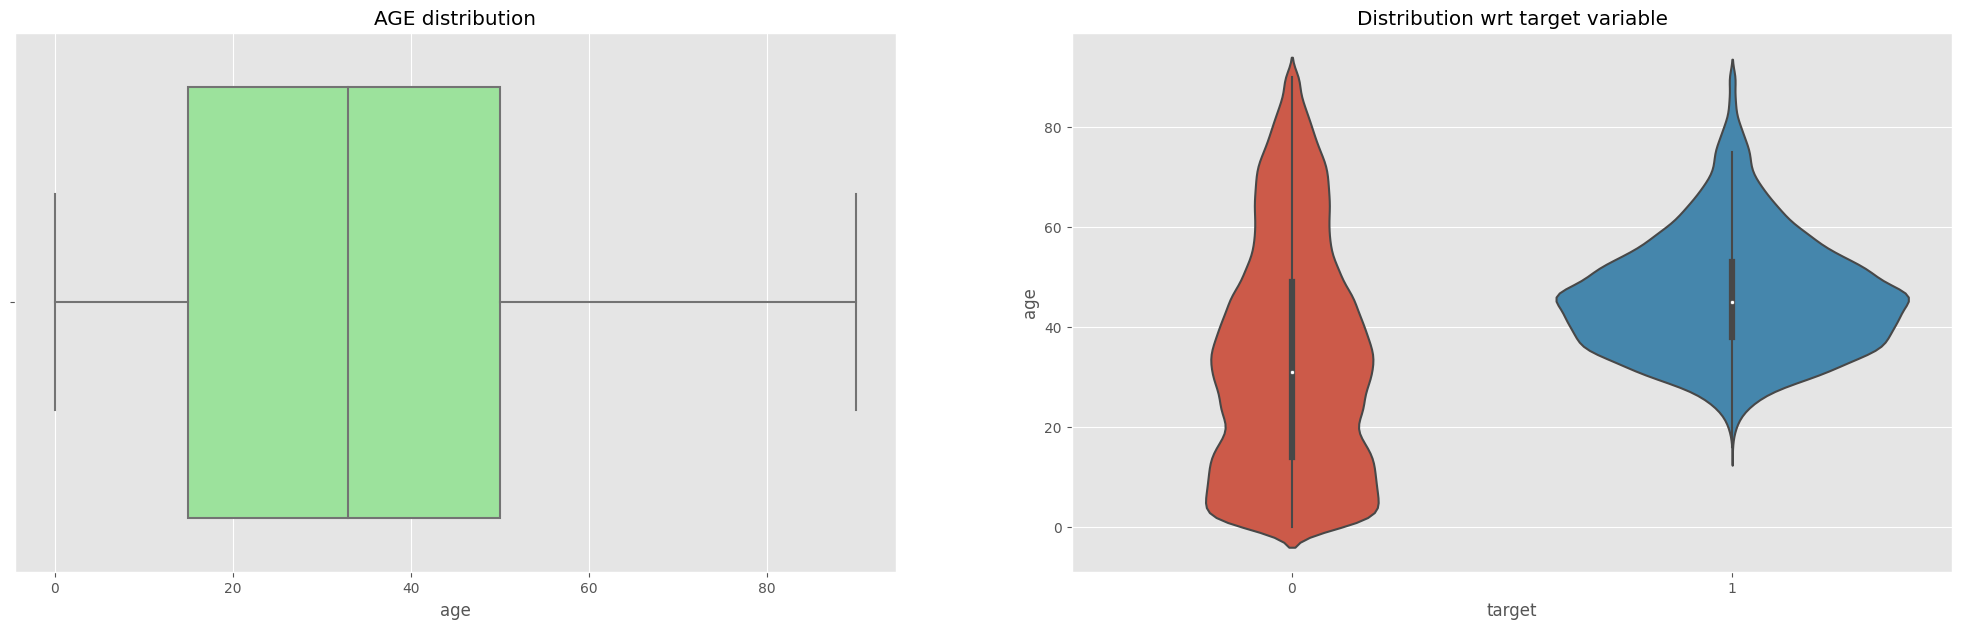

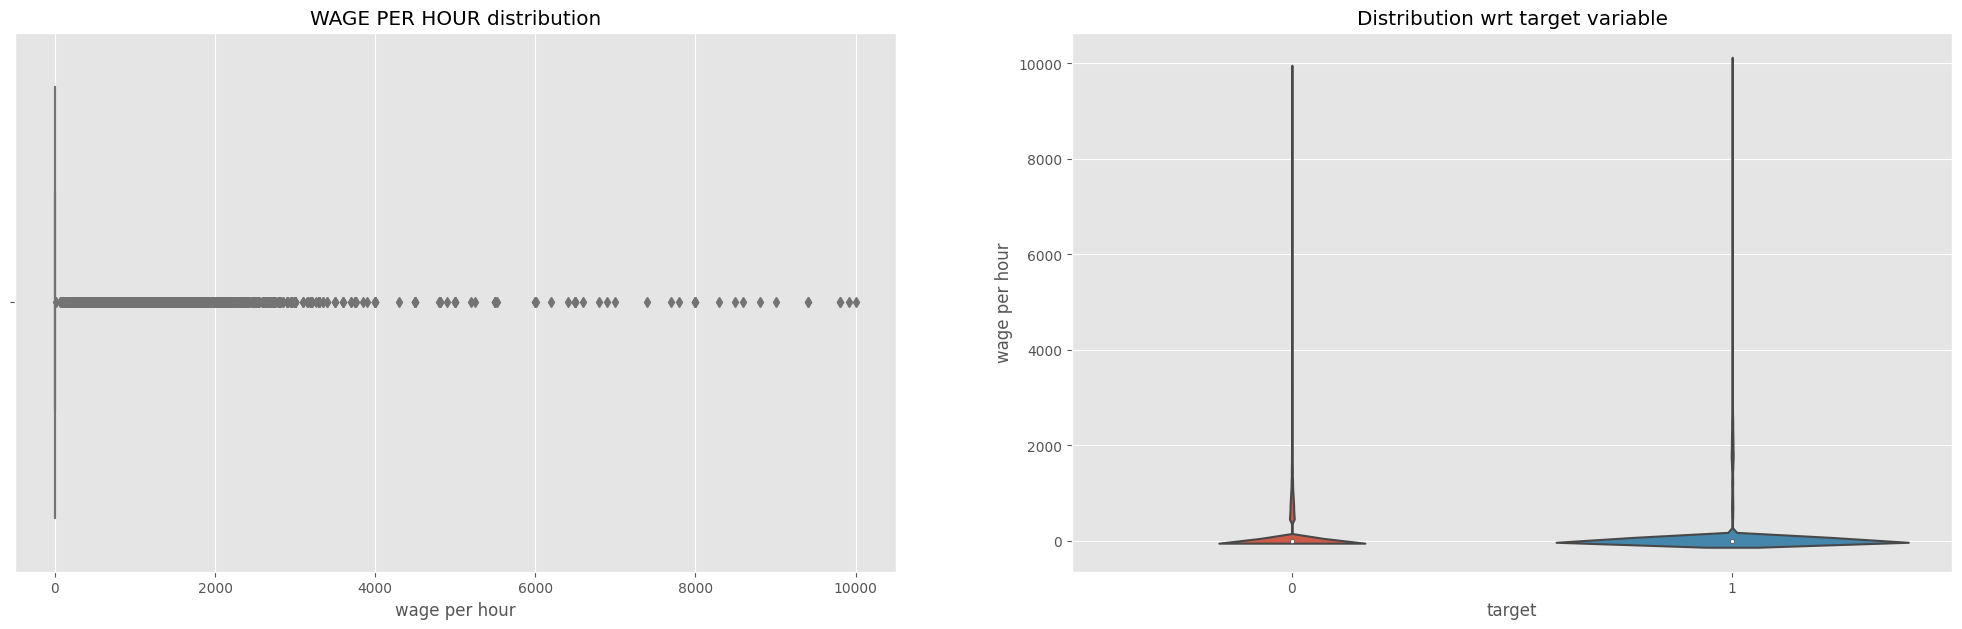

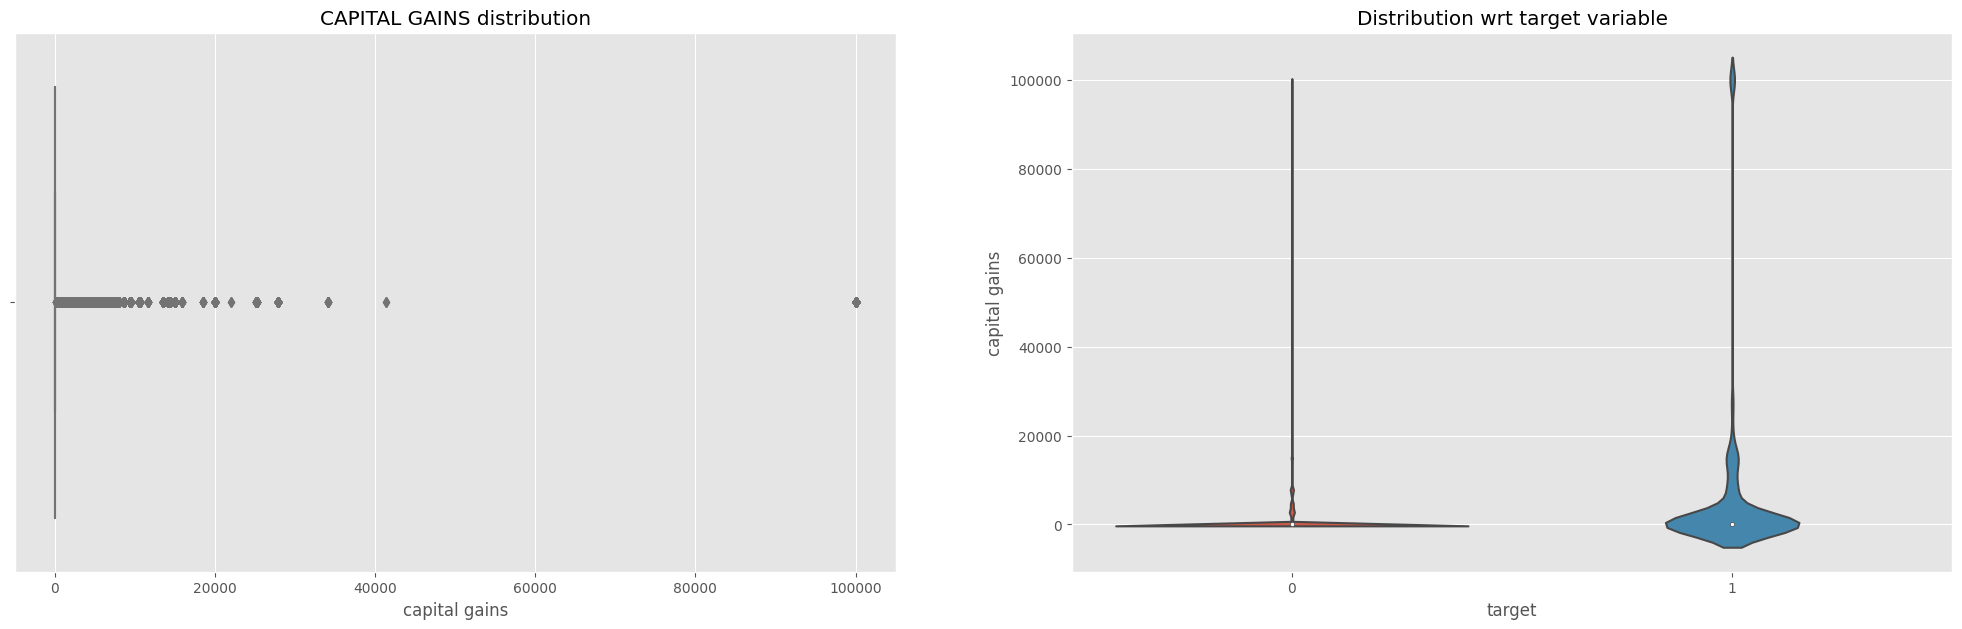

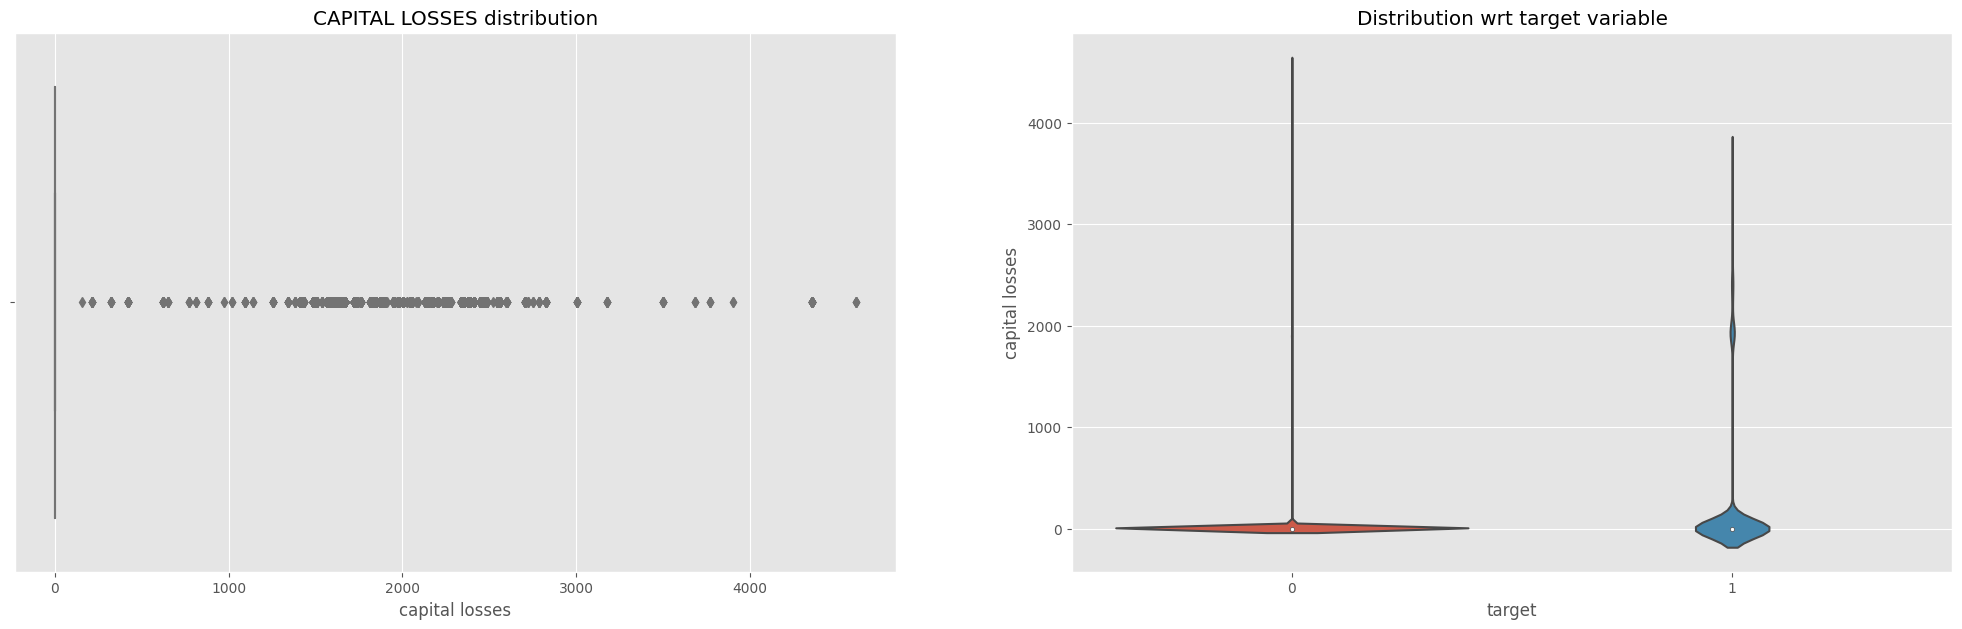

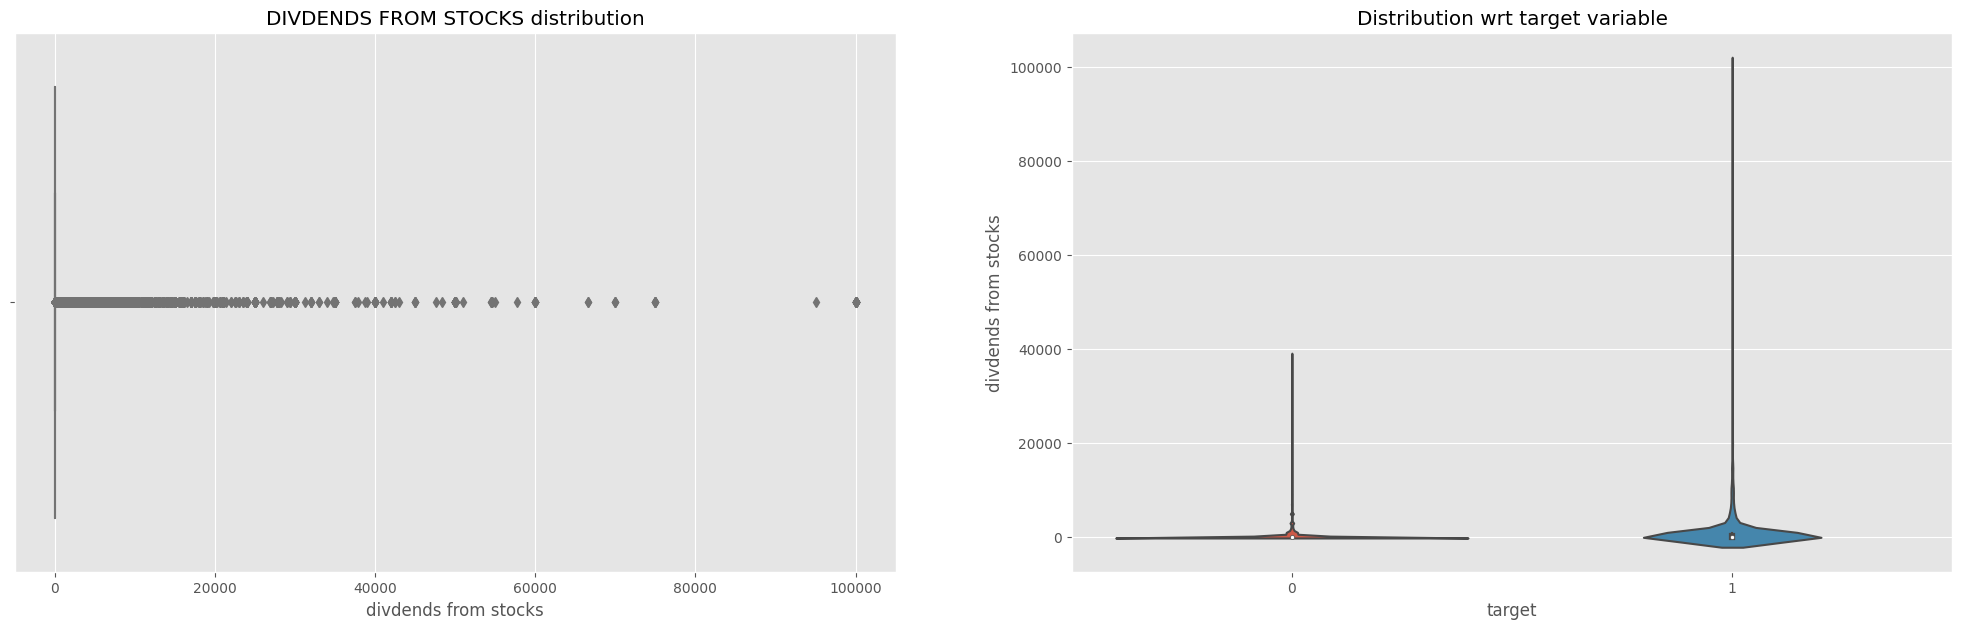

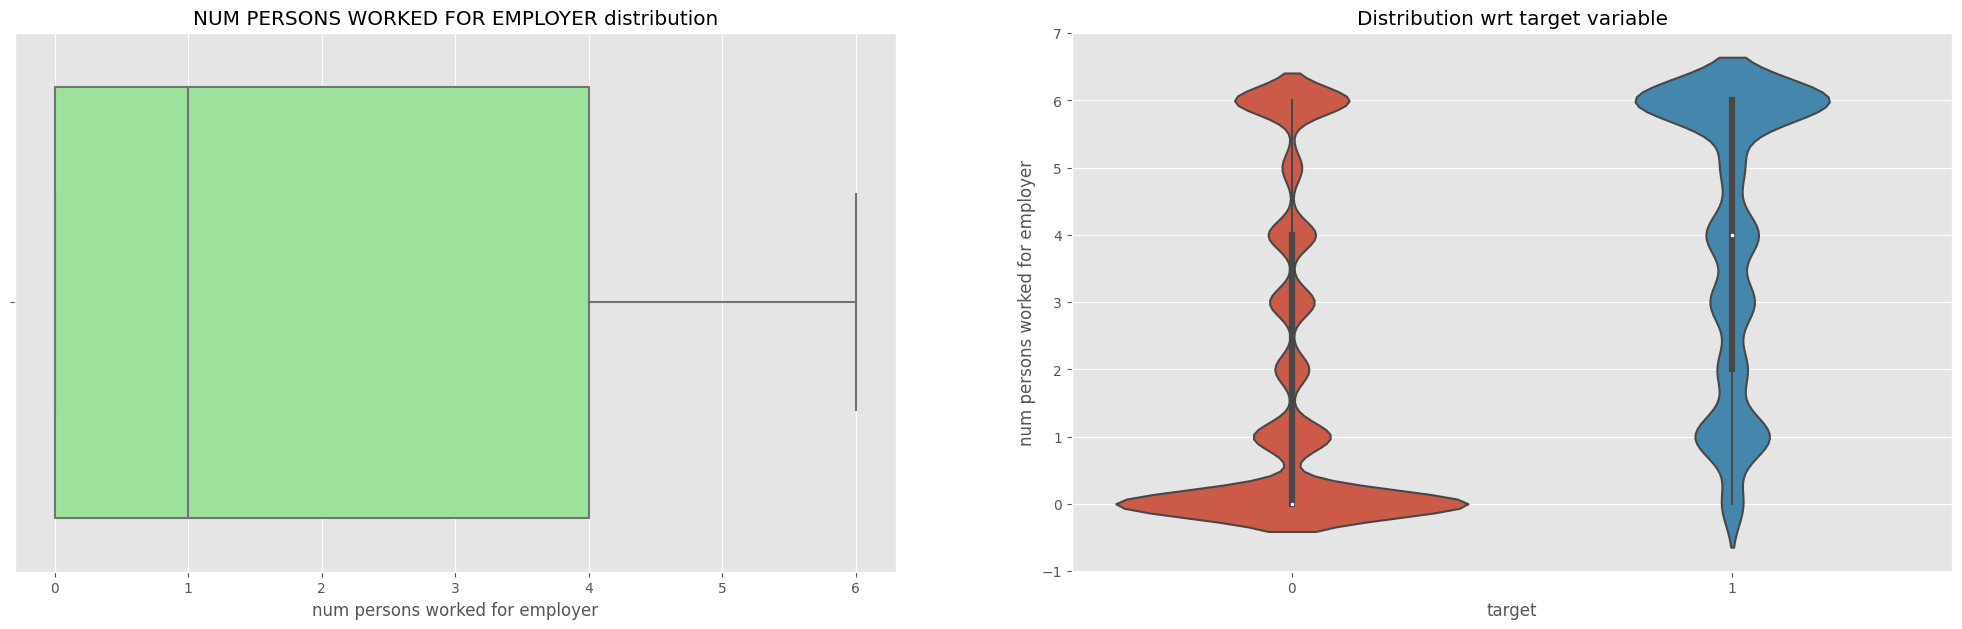

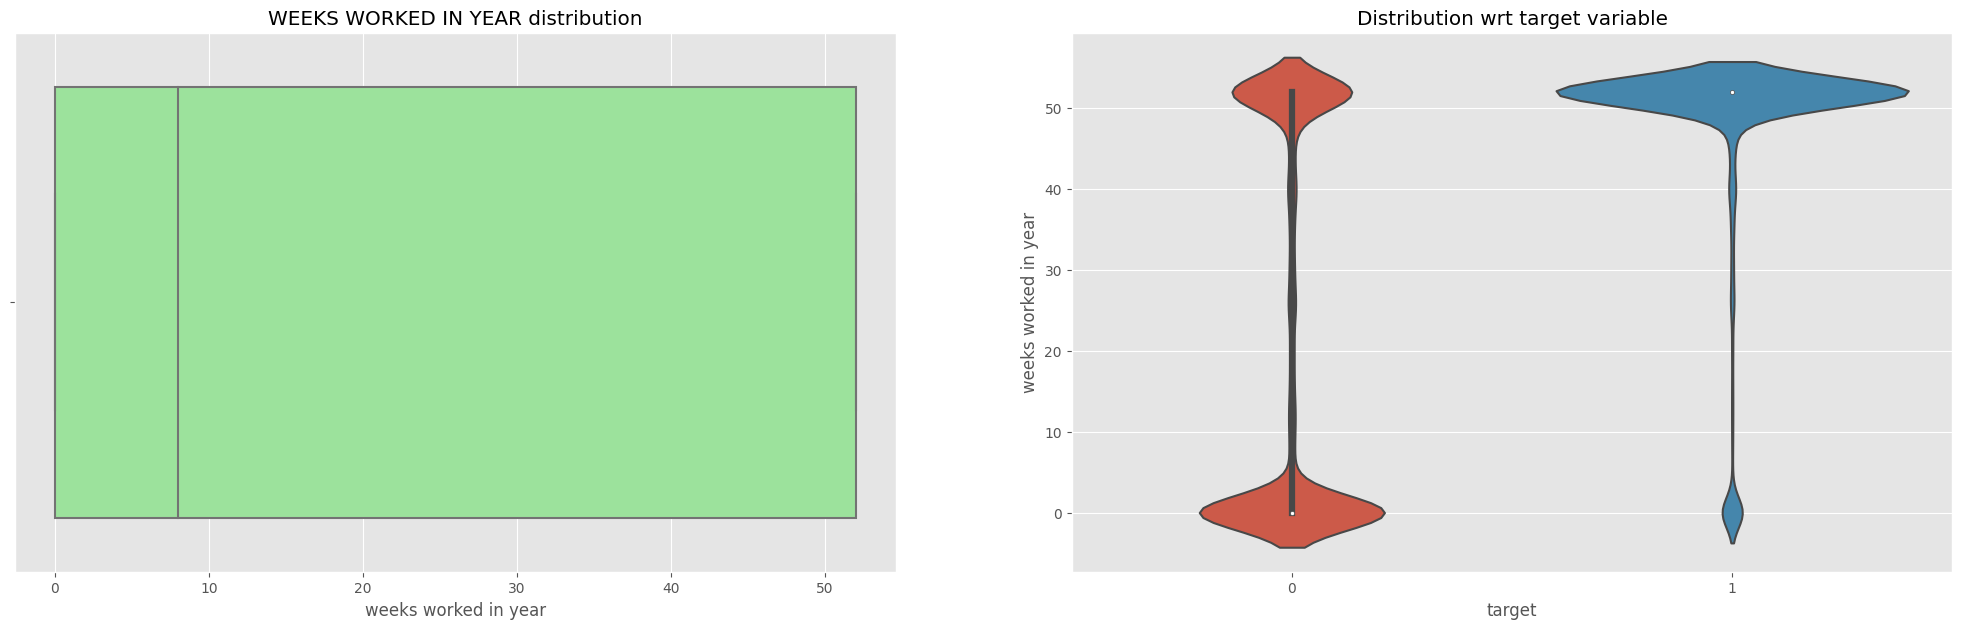

In [14]:
for col in numeric_cols:
    plot_numeric(df, col)

In [15]:
df.groupby('target')[numeric_cols].describe().T

target                                             0             1
age                             count  187141.000000  12382.000000
                                mean       33.715316     46.266193
                                std        22.620236     11.830906
                                min         0.000000     16.000000
                                25%        14.000000     38.000000
                                50%        31.000000     45.000000
                                75%        49.000000     53.000000
                                max        90.000000     90.000000
wage per hour                   count  187141.000000  12382.000000
                                mean       53.692526     81.640284
                                std       261.168380    431.364773
                                min         0.000000      0.000000
                                25%         0.000000      0.000000
                                50%         0.000000      0.000000
                                75%         0.000000      0.000000
                                max      9916.000000   9999.000000
capital gains                   count  187141.000000  12382.000000
                                mean      143.848013   4830.930060
                                std      1815.343341  16887.627002
                                min         0.000000      0.000000
                                25%         0.000000      0.000000
                                50%         0.000000      0.000000
                                75%         0.000000      0.000000
                                max     99999.000000  99999.000000
capital losses                  count  187141.000000  12382.000000
                                mean       27.003730    193.139557
                                std       229.535067    607.542507
                                min         0.000000      0.000000
                                25%         0.000000      0.000000
                                50%         0.000000      0.000000
                                75%         0.000000      0.000000
                                max      4608.000000   3683.000000
divdends from stocks            count  187141.000000  12382.000000
                                mean      107.816518   1553.448070
                                std       909.774217   6998.071762
                                min         0.000000      0.000000
                                25%         0.000000      0.000000
                                50%         0.000000      0.000000
                                75%         0.000000    363.000000
                                max     39000.000000  99999.000000
num persons worked for employer count  187141.000000  12382.000000
                                mean        1.820707      4.003715
                                std         2.317618      2.118183
                                min         0.000000      0.000000
                                25%         0.000000      2.000000
                                50%         0.000000      4.000000
                                75%         4.000000      6.000000
                                max         6.000000      6.000000
weeks worked in year            count  187141.000000  12382.000000
                                mean       21.527762     48.069617
                                std        24.118209     12.259412
                                min         0.000000      0.000000
                                25%         0.000000     52.000000
                                50%         0.000000     52.000000
                                75%        52.000000     52.000000
                                max        52.000000     52.000000

We can observe that distrbituions for most of the features are far from being normal or even good looking as `wage per hour`, `capital gains`, `capital losses`, `divdends from stocks` have extremely large tails. From this view it's highly unlikely that a linear model could handle these data well.
However, we can see that generally almost all features look reasonable to take into the final model as we can see shifts between distribution of the features across target values. Let`s consider using scaling at least for linear models as the magnitude of values is poor and heavy tails are present.

We wouldn't like to exclude statistically abnormal observations as well, as they are outliers from statistical but not common sense (large dividends from stocks are outliers statistically, however, they matter as only small percentage of people earn on stocks).

### Categorical:
Let's first check if there are any features where there are more than 1 category having less than 10 entries: 

In [16]:
for col in categorical_cols:
    if sum(df[col].value_counts().values <= 10) > 1:
        print(col)

detailed household and family stat


In [17]:
df['detailed household and family stat'].value_counts()

 Householder                                        53248
 Child <18 never marr not in subfamily              50326
 Spouse of householder                              41695
 Nonfamily householder                              22213
 Child 18+ never marr Not in a subfamily            12030
 Secondary individual                                6122
 Other Rel 18+ ever marr not in subfamily            1956
 Grandchild <18 never marr child of subfamily RP     1868
 Other Rel 18+ never marr not in subfamily           1728
 Grandchild <18 never marr not in subfamily          1066
 Child 18+ ever marr Not in a subfamily              1013
 Child under 18 of RP of unrel subfamily              732
 RP of unrelated subfamily                            685
 Child 18+ ever marr RP of subfamily                  671
 Other Rel 18+ ever marr RP of subfamily              656
 Other Rel <18 never marr child of subfamily RP       656
 Other Rel 18+ spouse of subfamily RP                 638
 Child 18+ nev

Let's substitute these underpopulated categories with `Other`:

In [18]:
map_household = df['detailed household and family stat'].value_counts()
map_household = map_household[map_household <= 10].index.tolist()

def replace_household(df: pd.DataFrame):
    df['detailed household and family stat'] = df['detailed household and family stat'].replace(map_household, 'Other')
    return df

df = replace_household(df)
test_df = replace_household(test_df)

In [19]:
def plot_categorical(df: pd.DataFrame, col: str):
    plt.figure(figsize=(13, 10))
    if df[col].nunique() < 30:
        sns.countplot(df, y=col, hue='target')
    else:
        sns.countplot(df, y=col)
    plt.title(f'{col.upper()} value counts')
    plt.show()

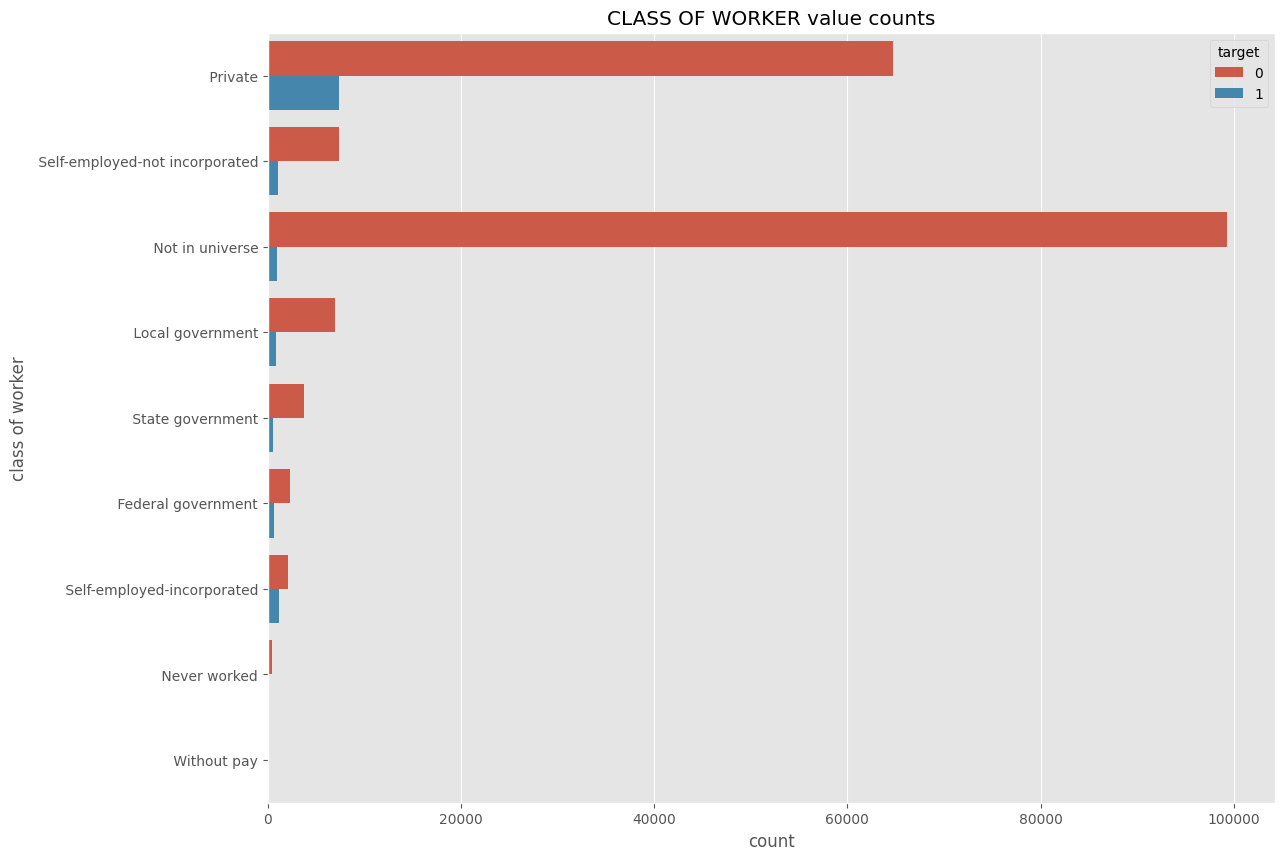

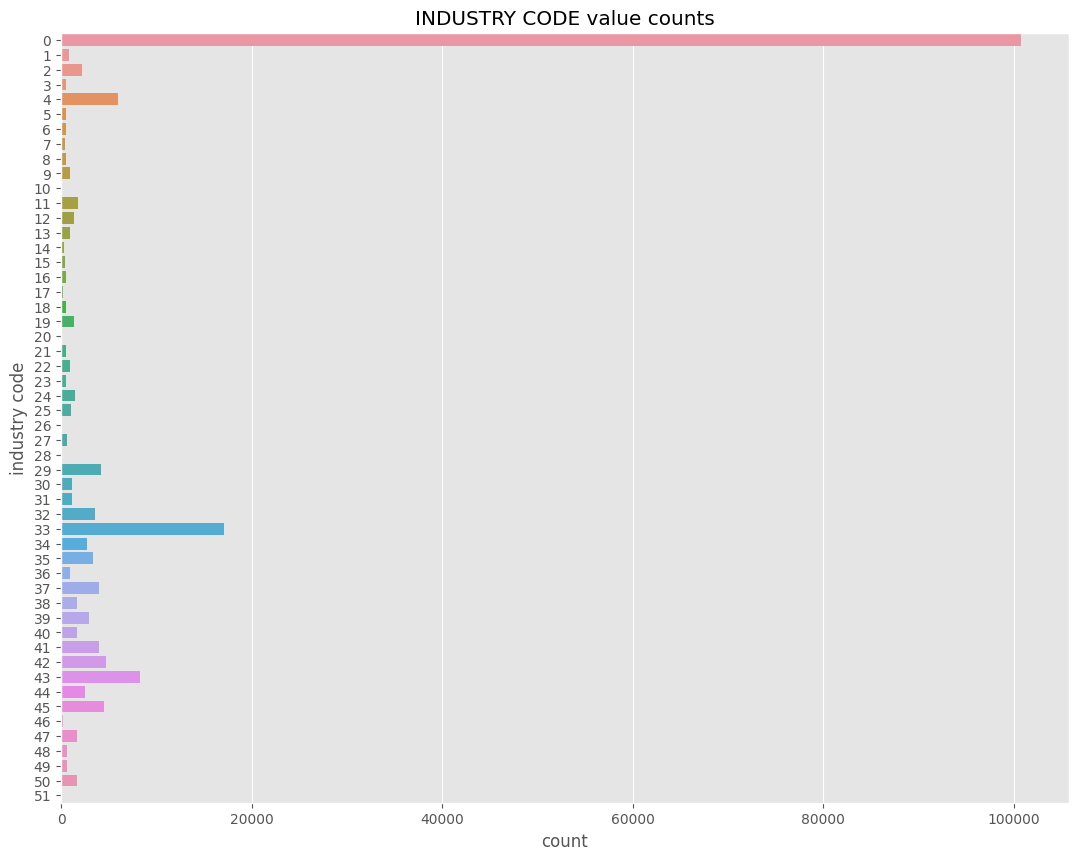

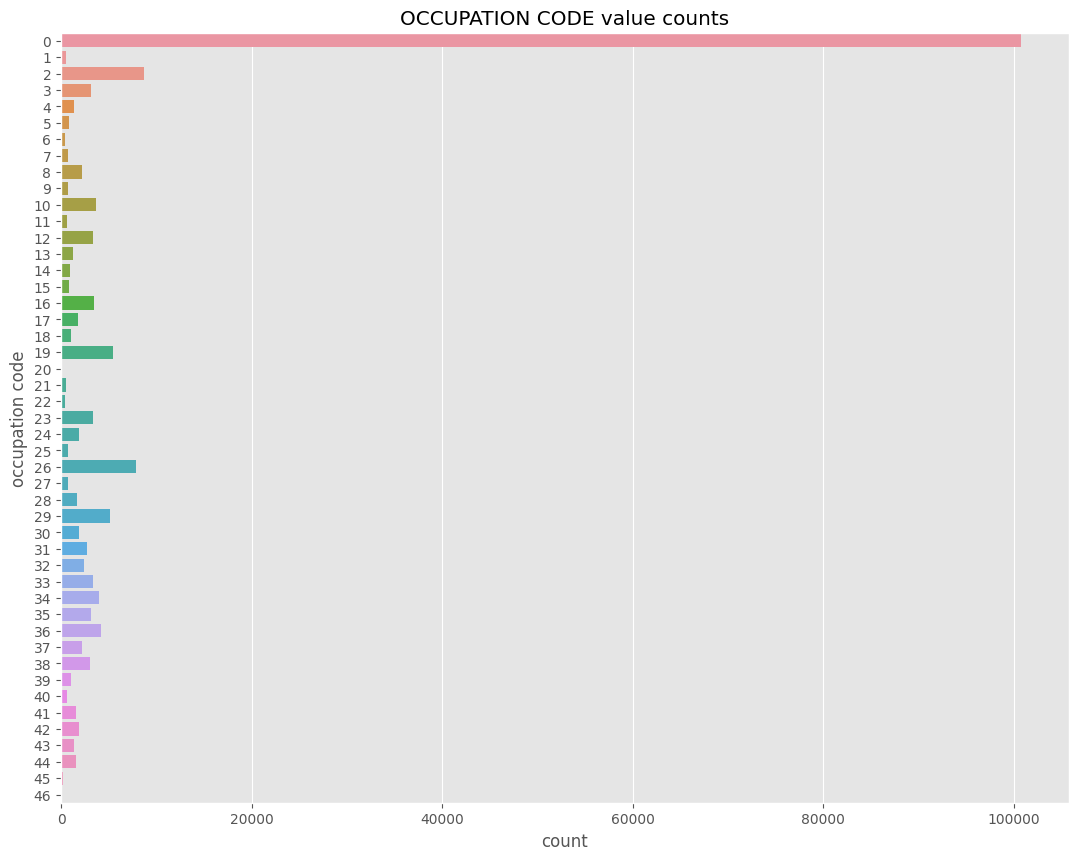

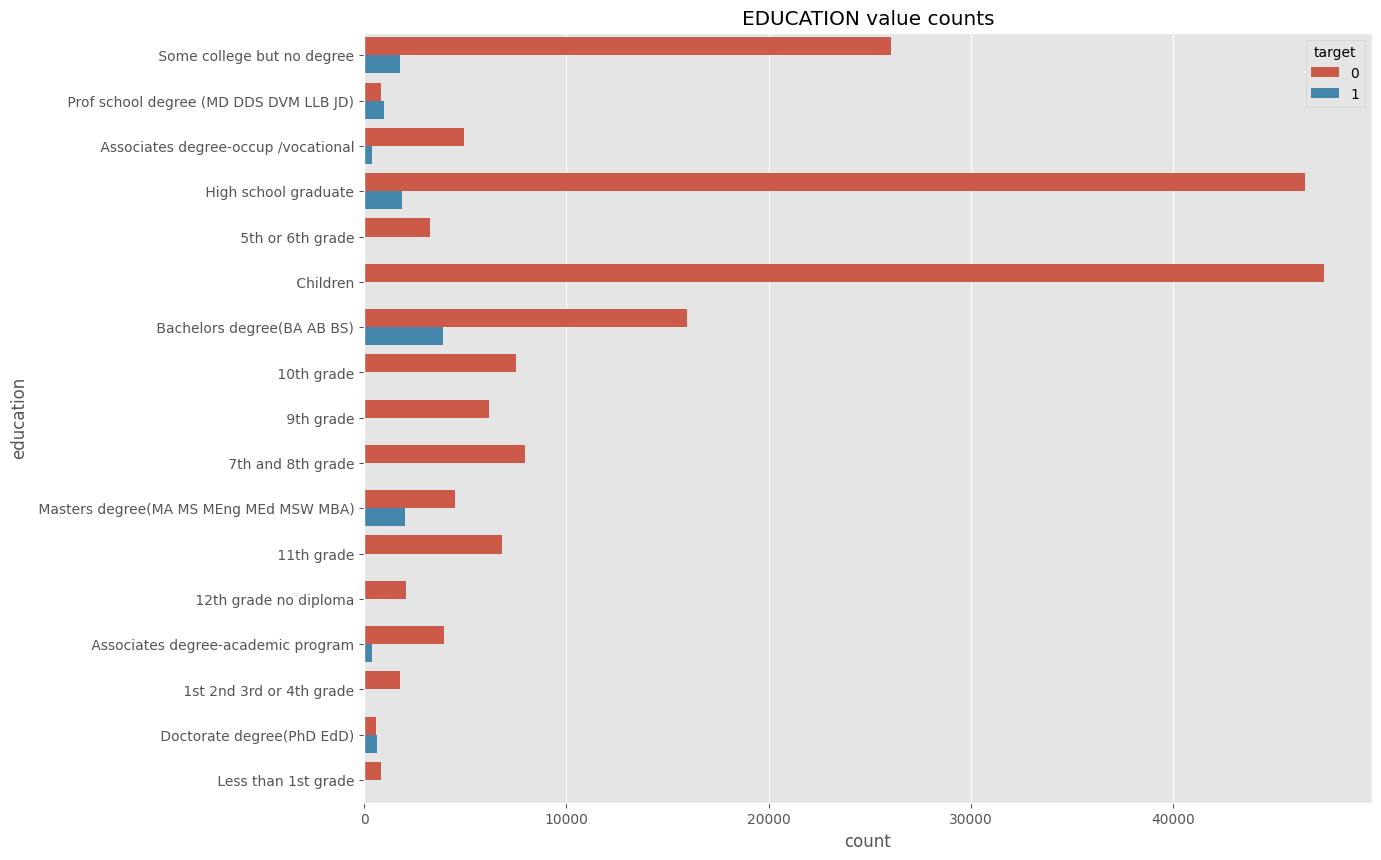

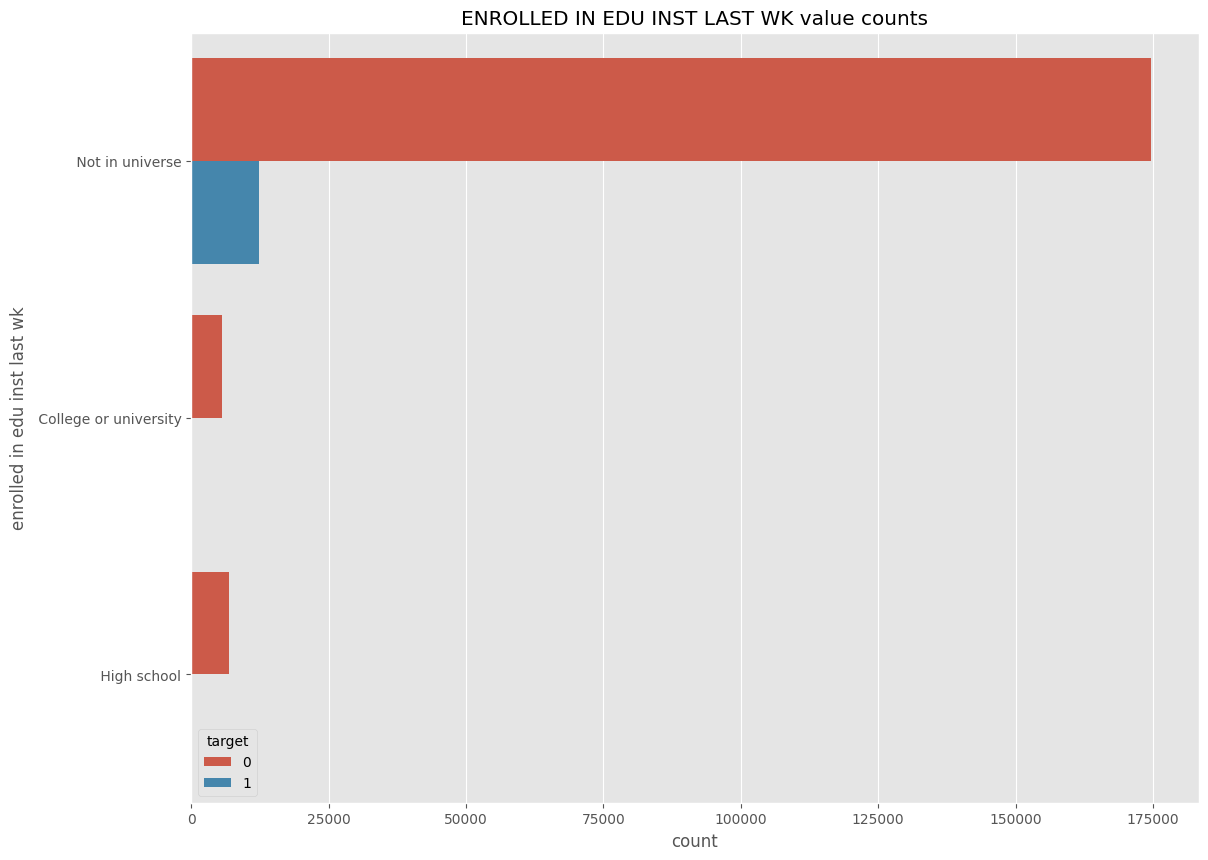

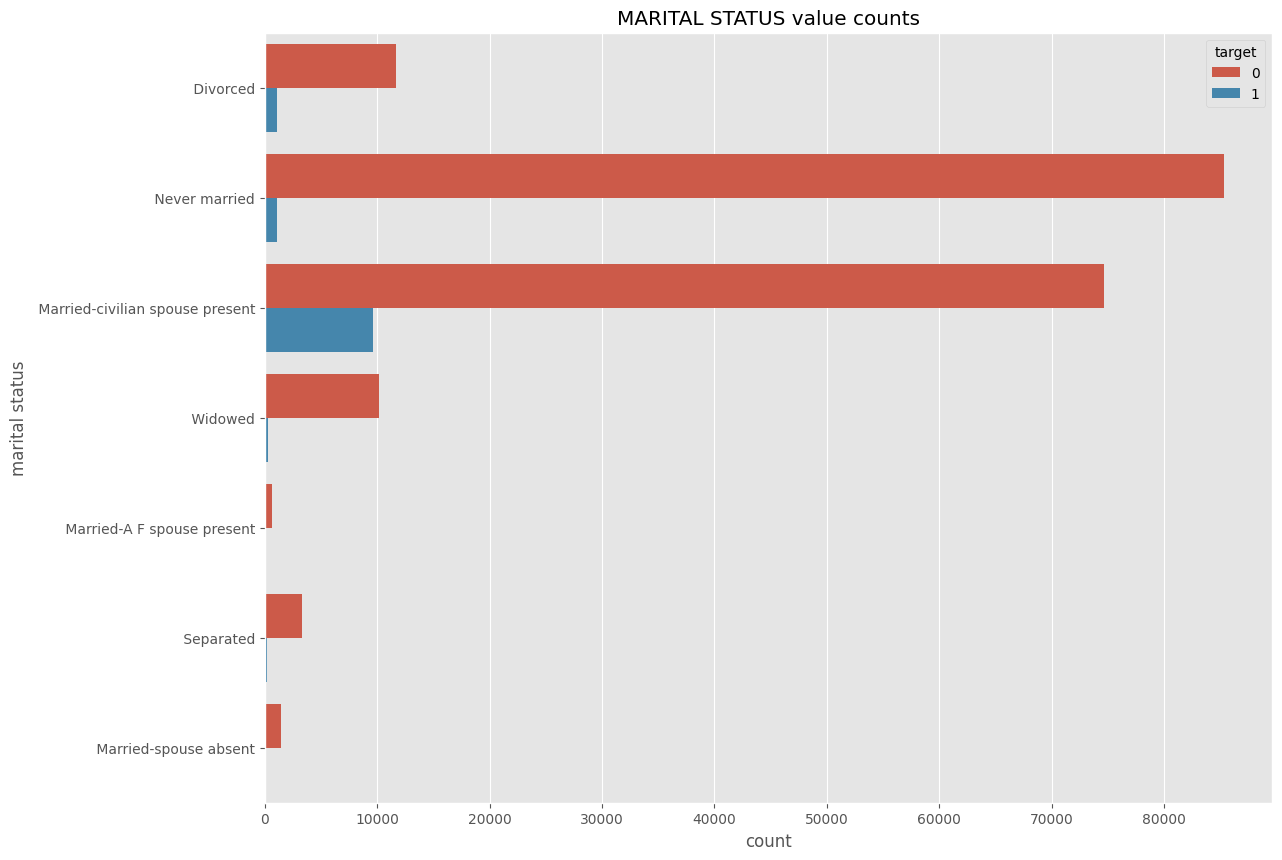

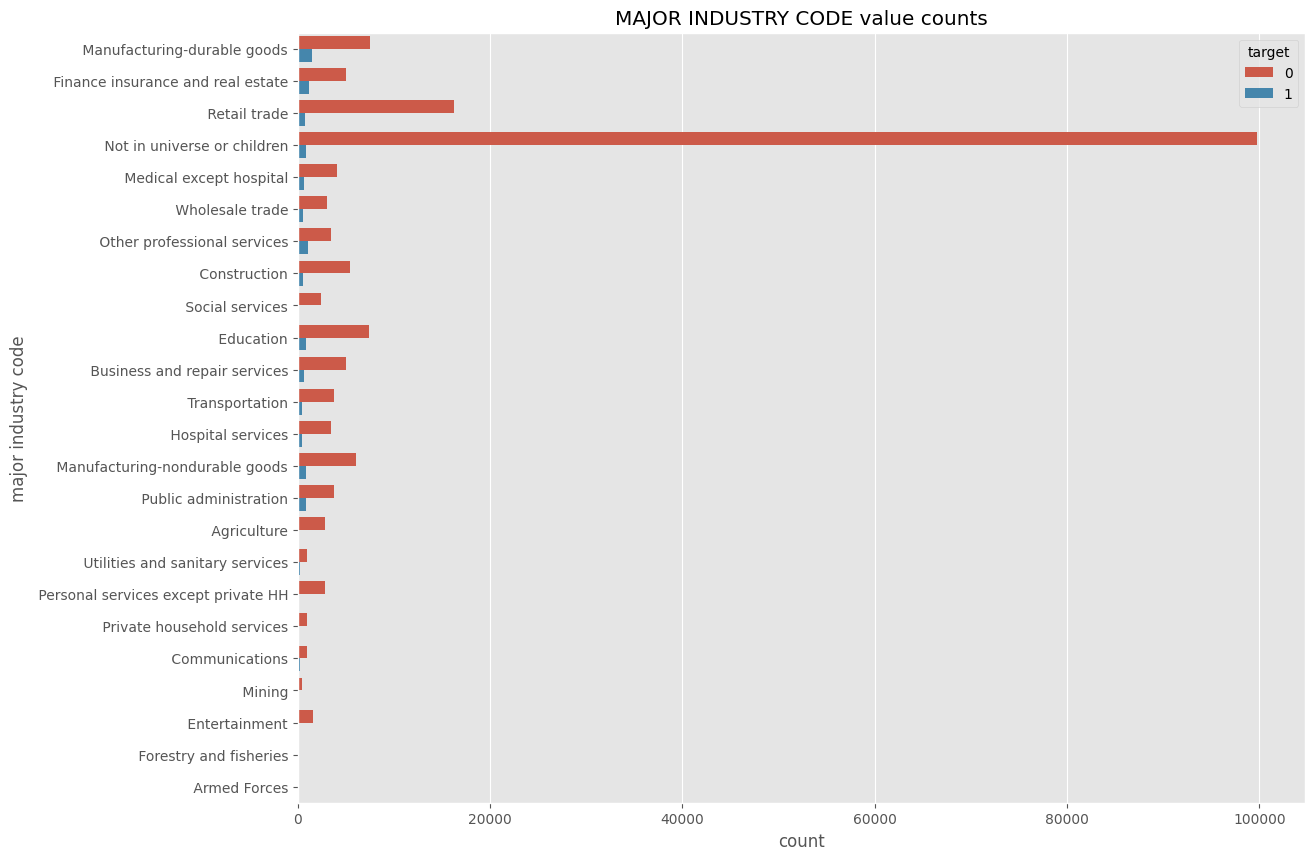

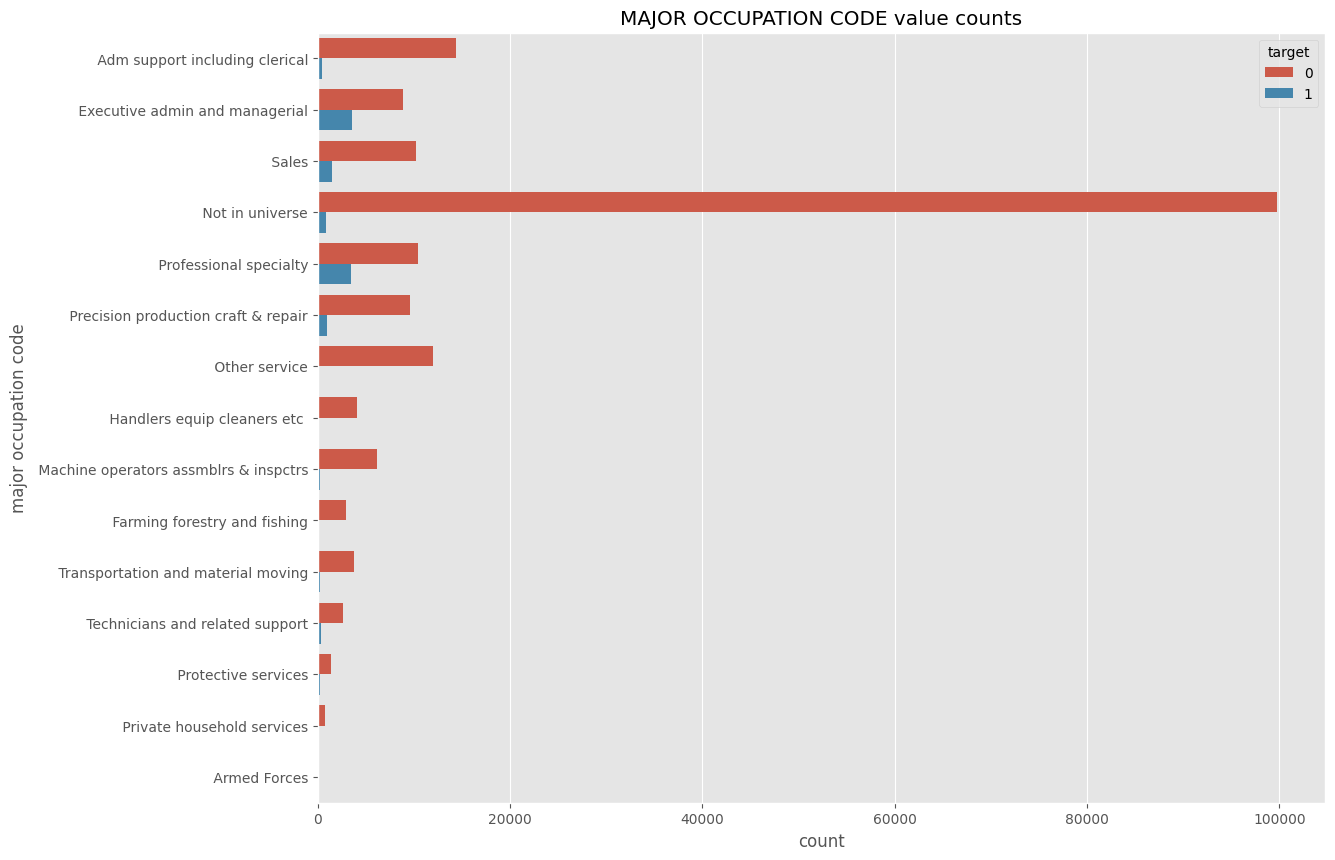

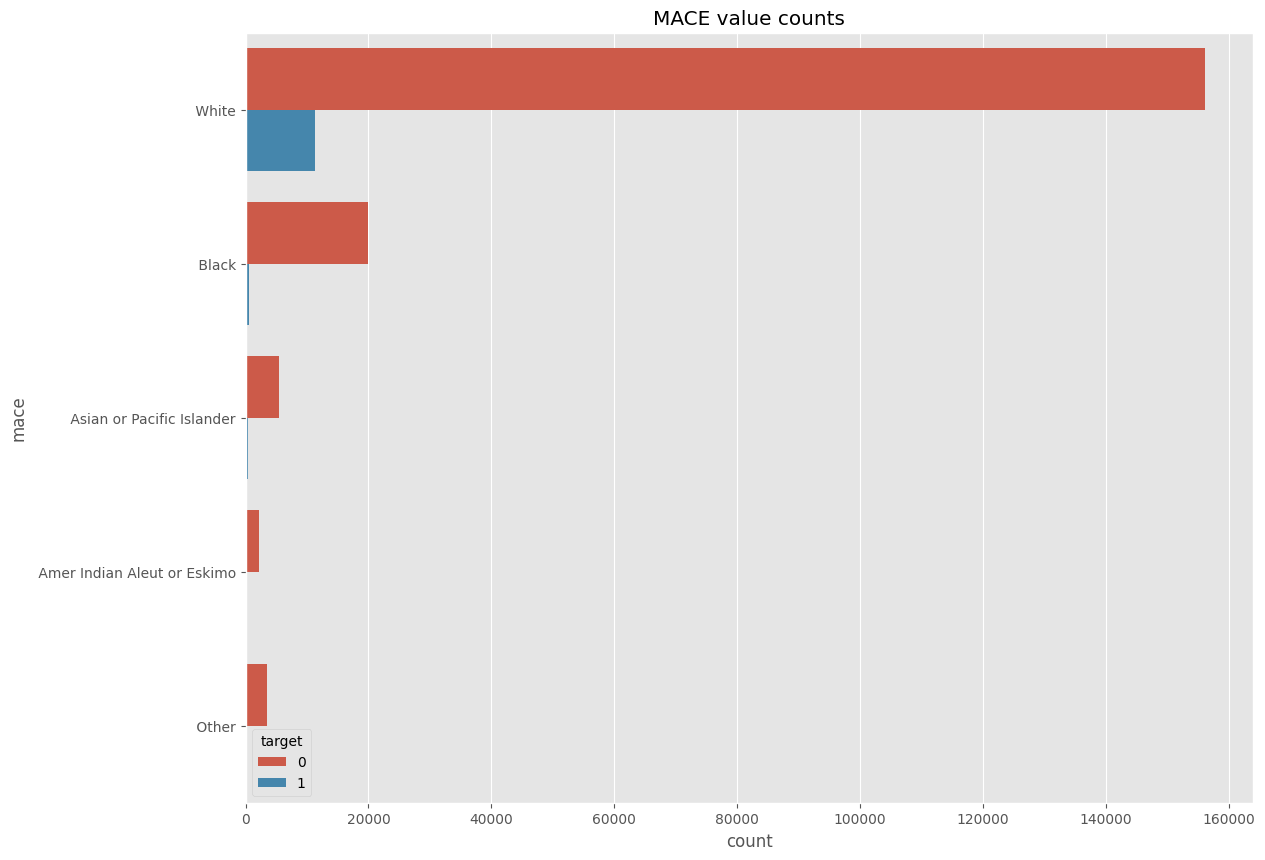

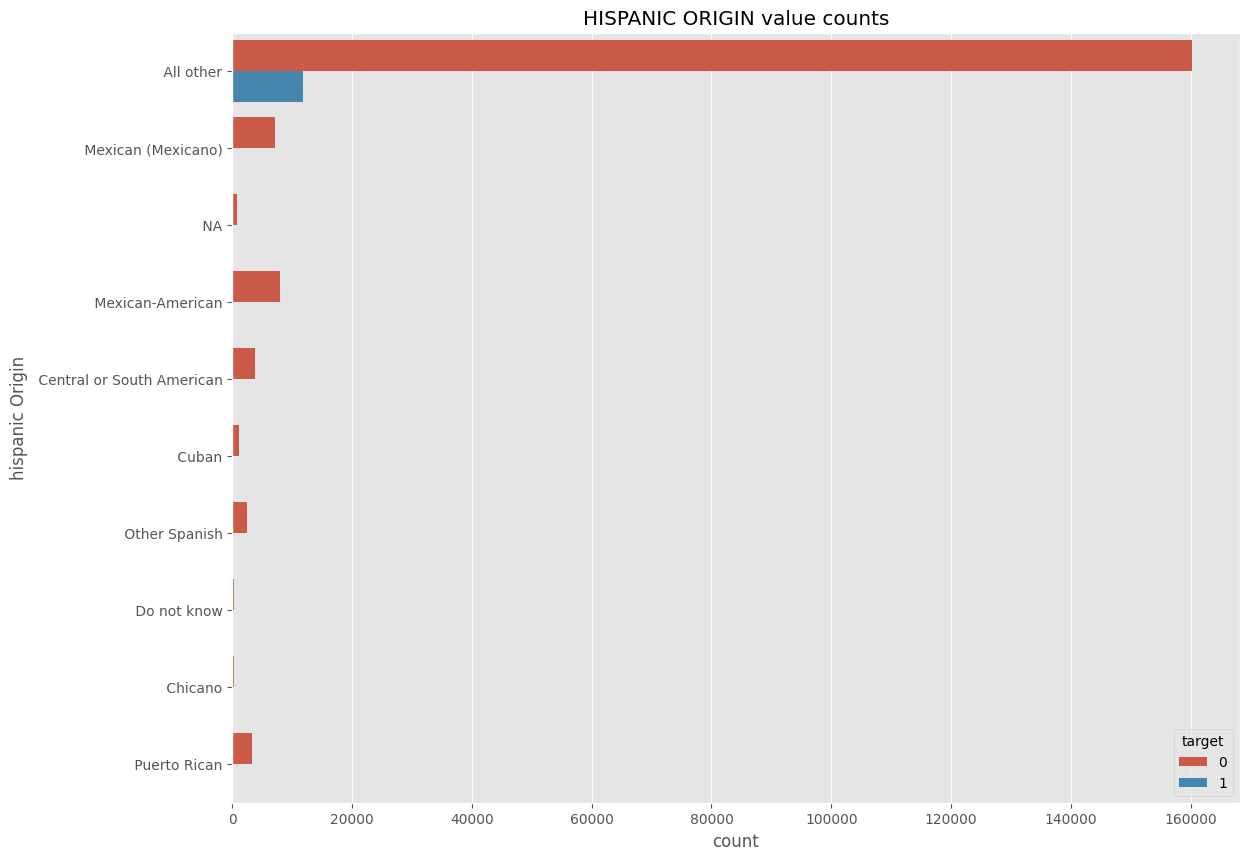

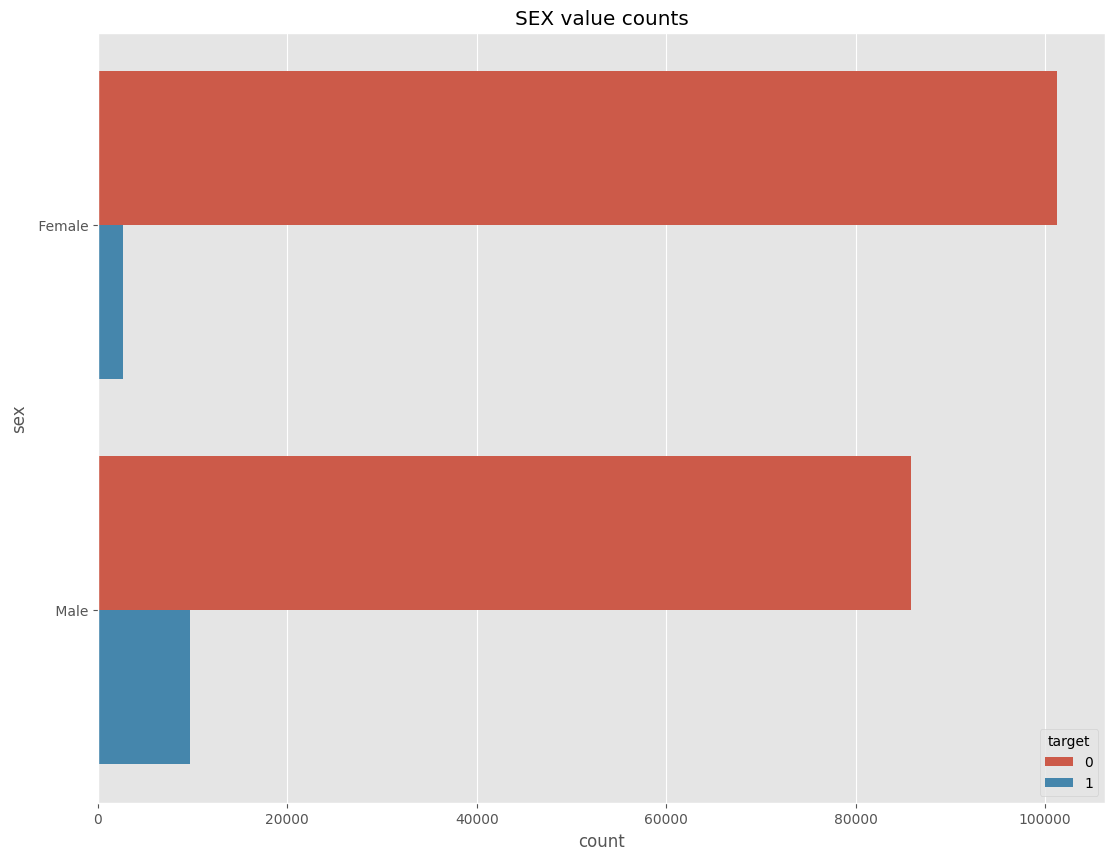

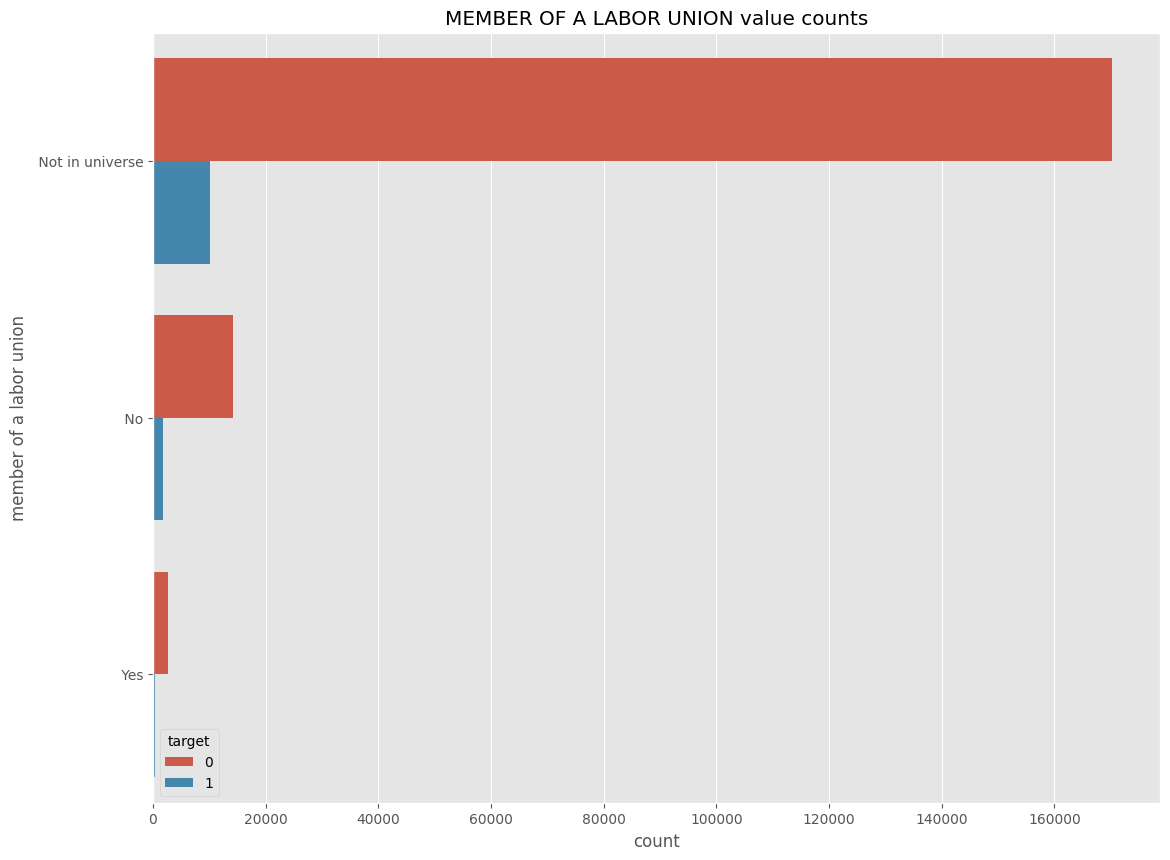

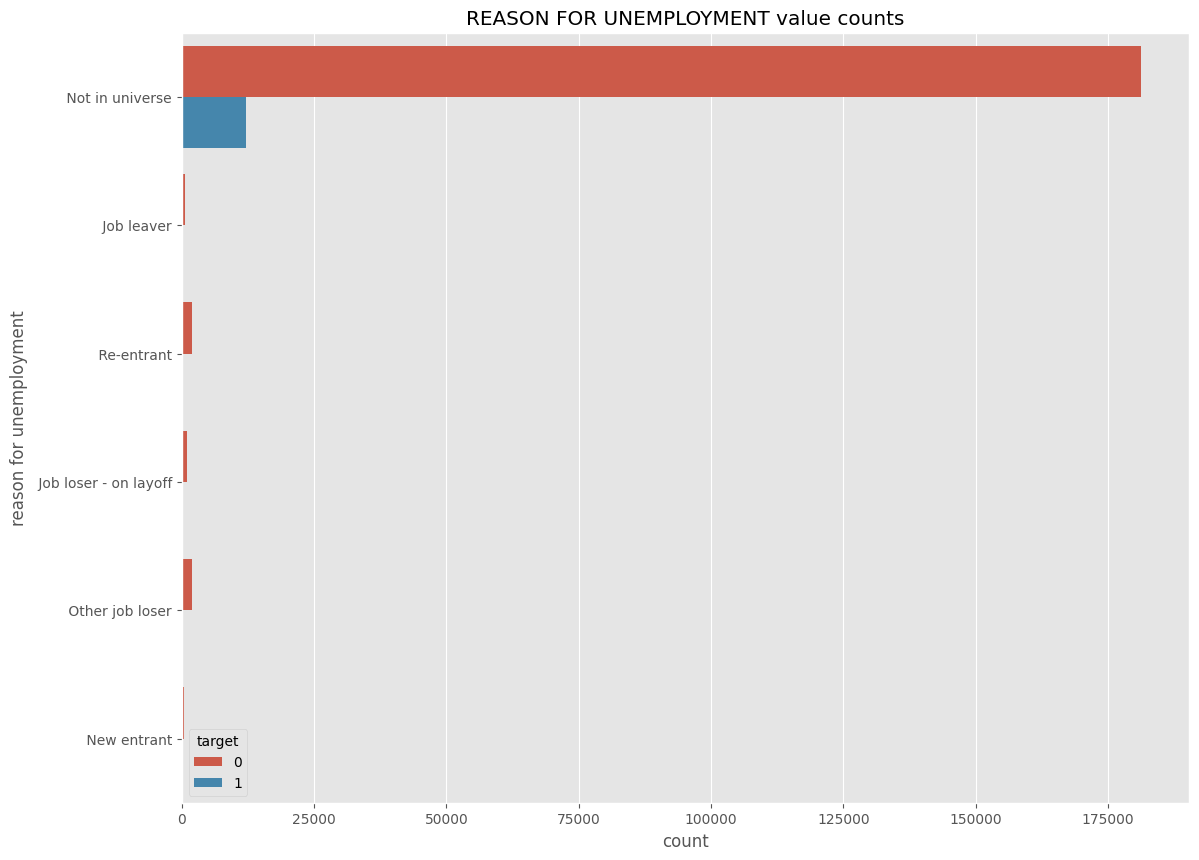

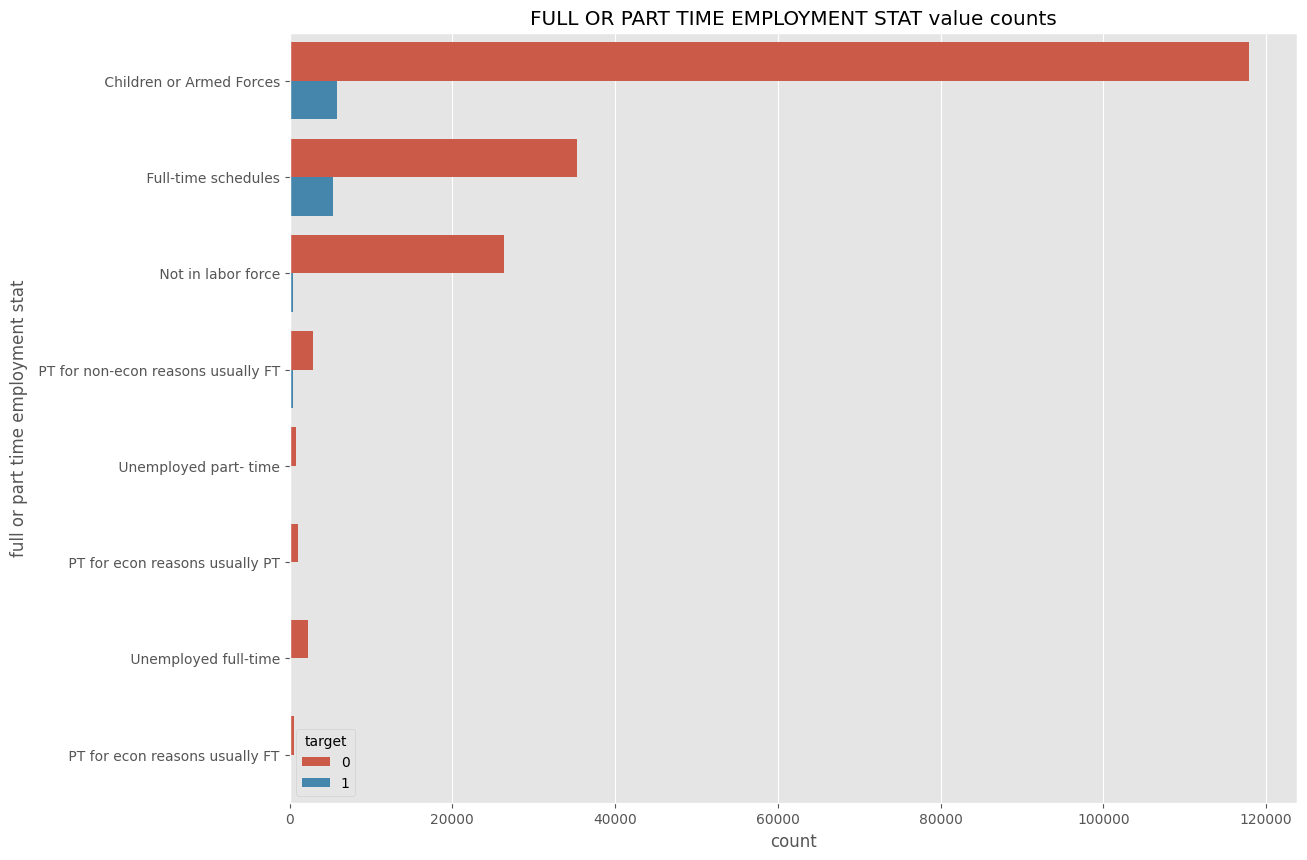

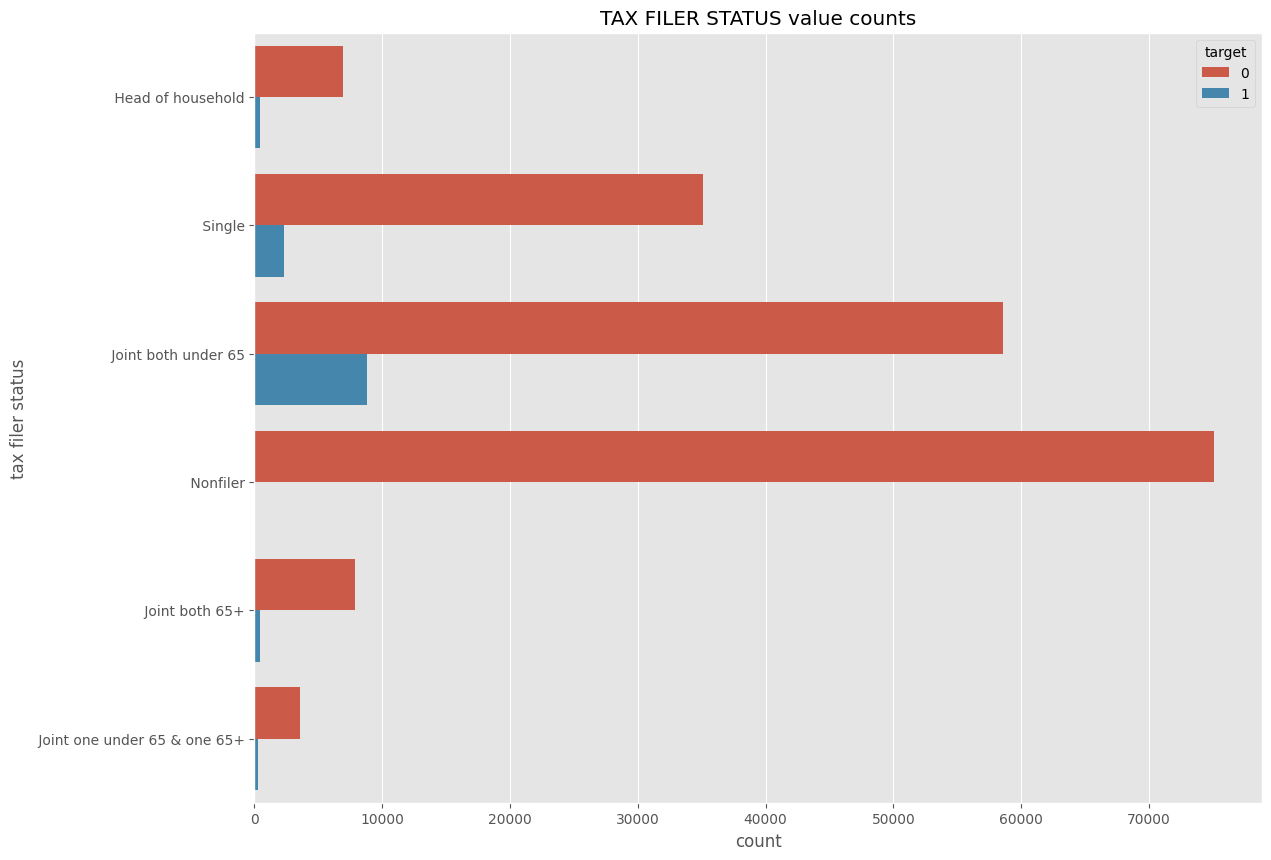

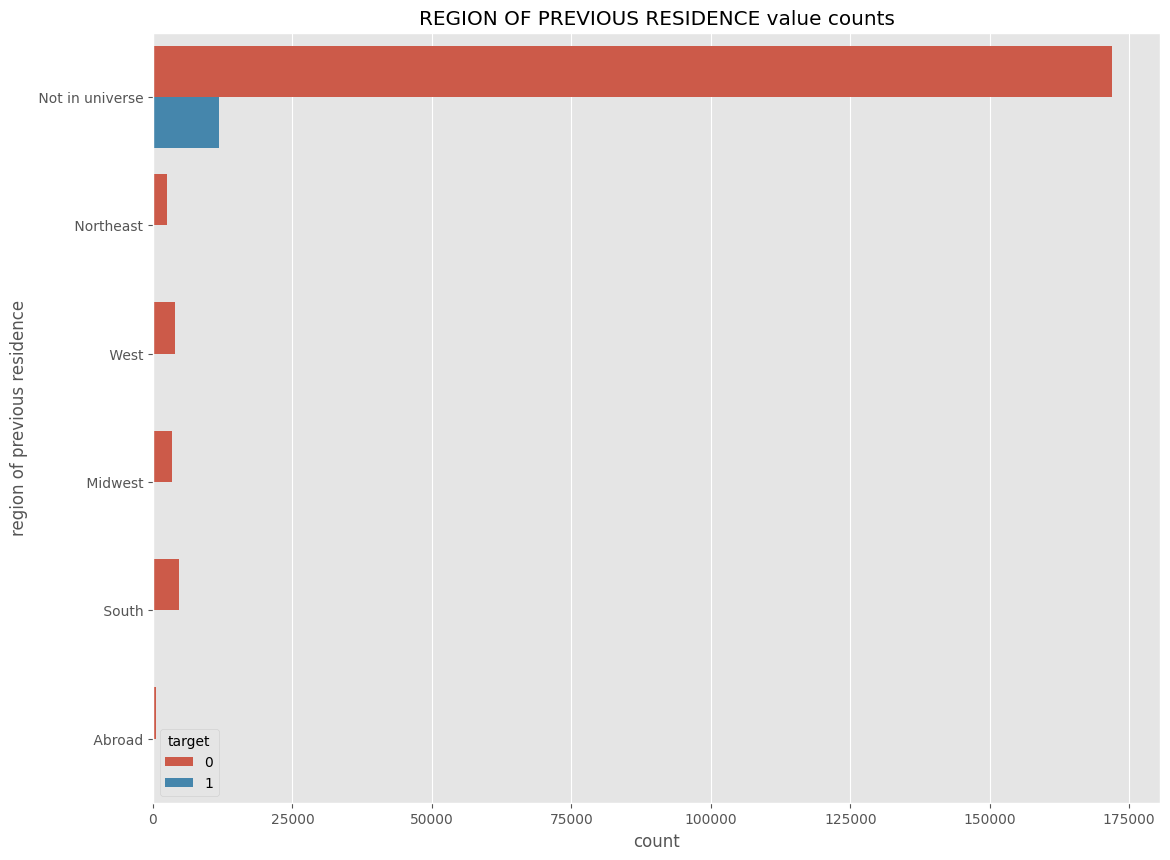

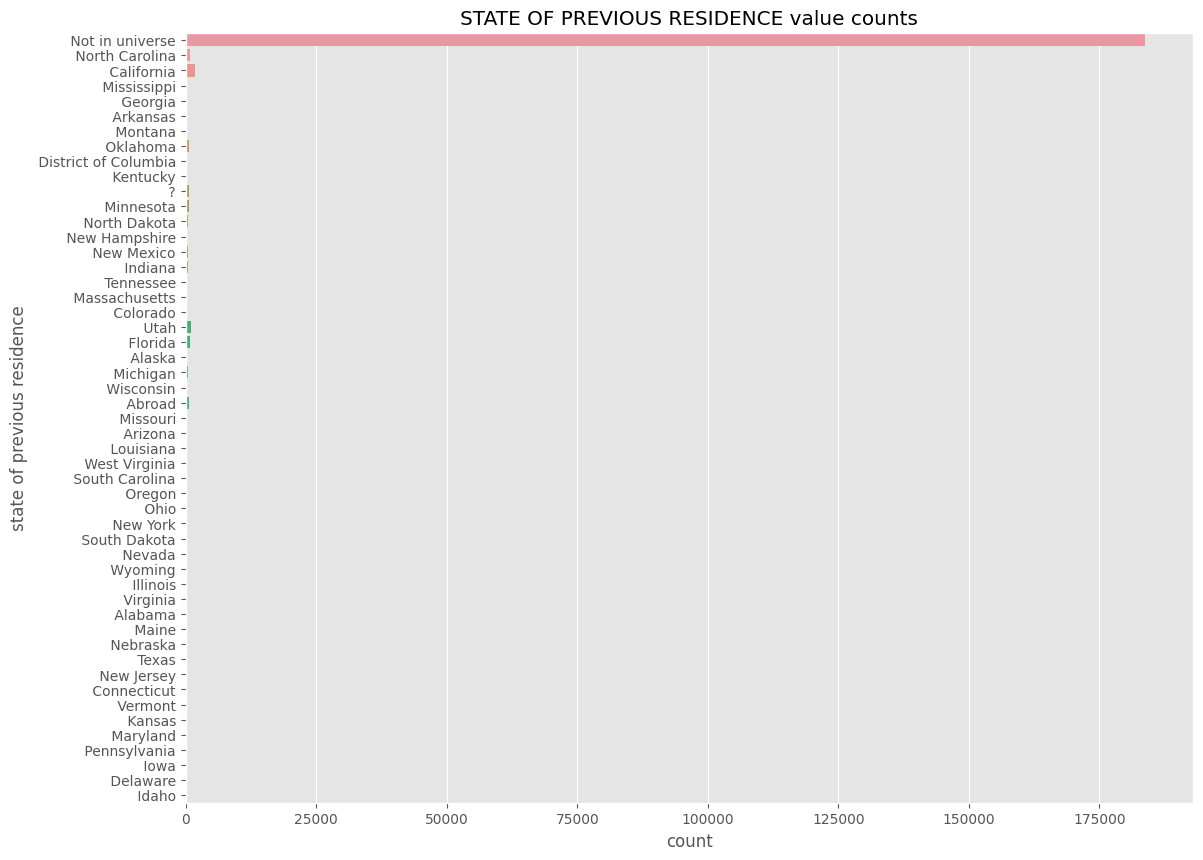

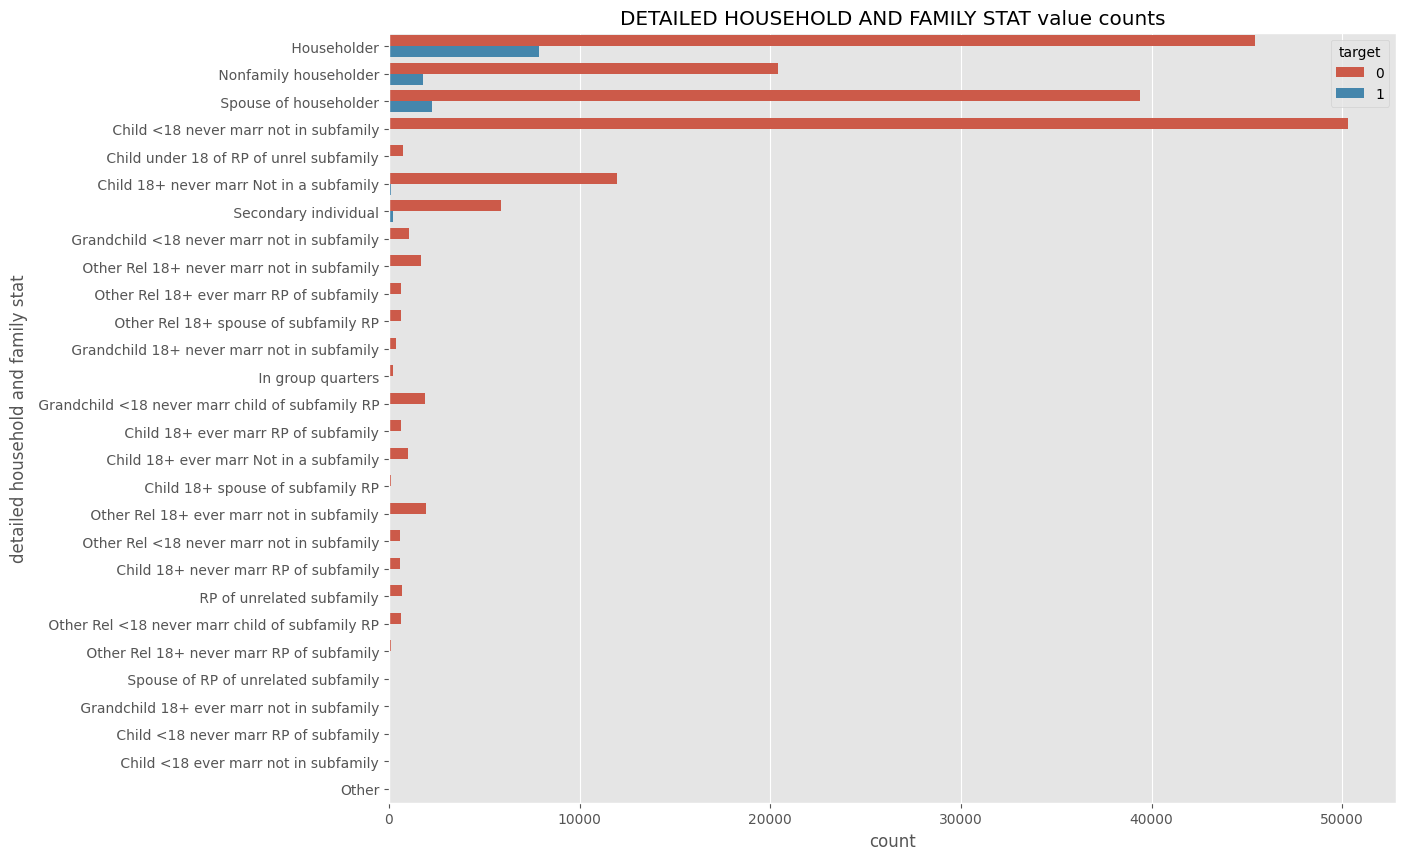

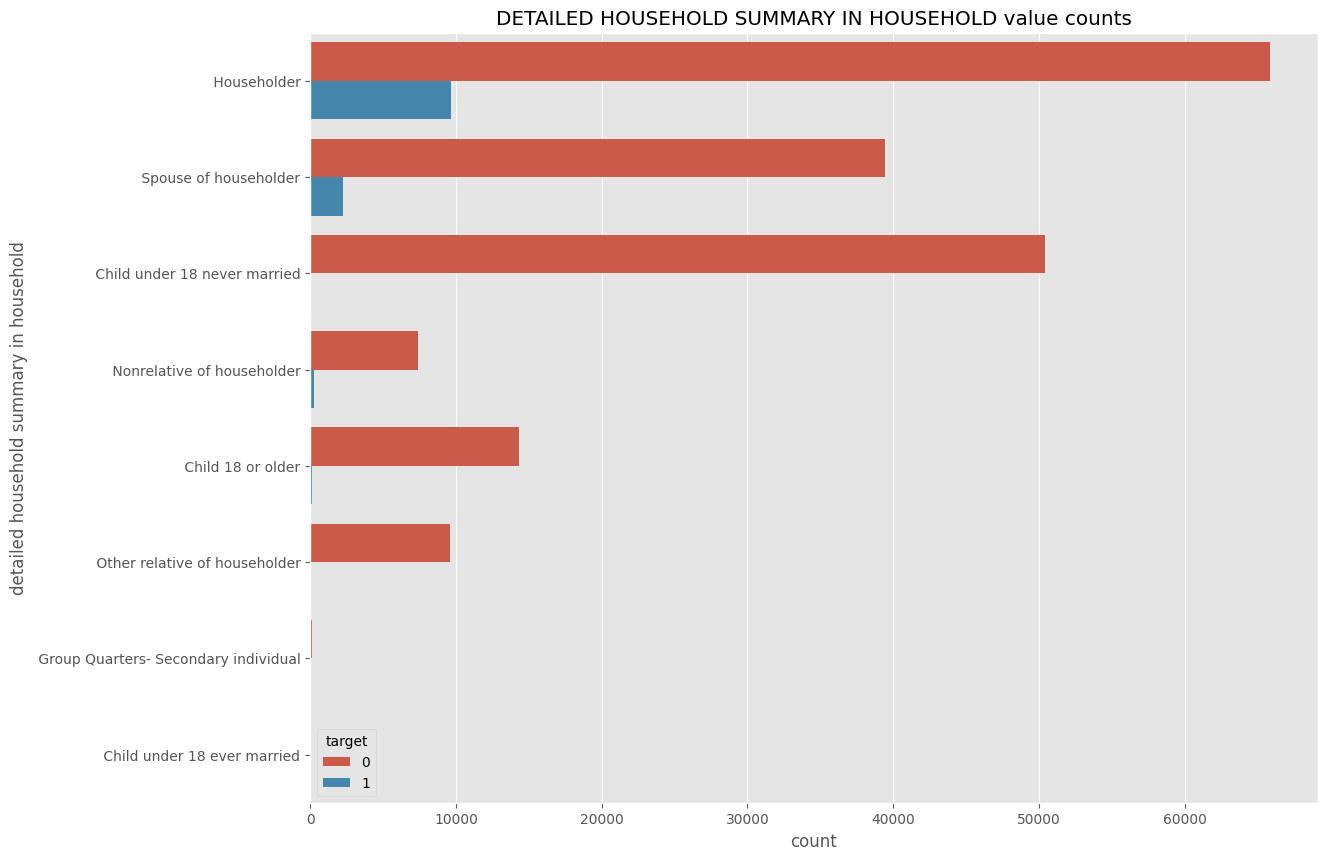

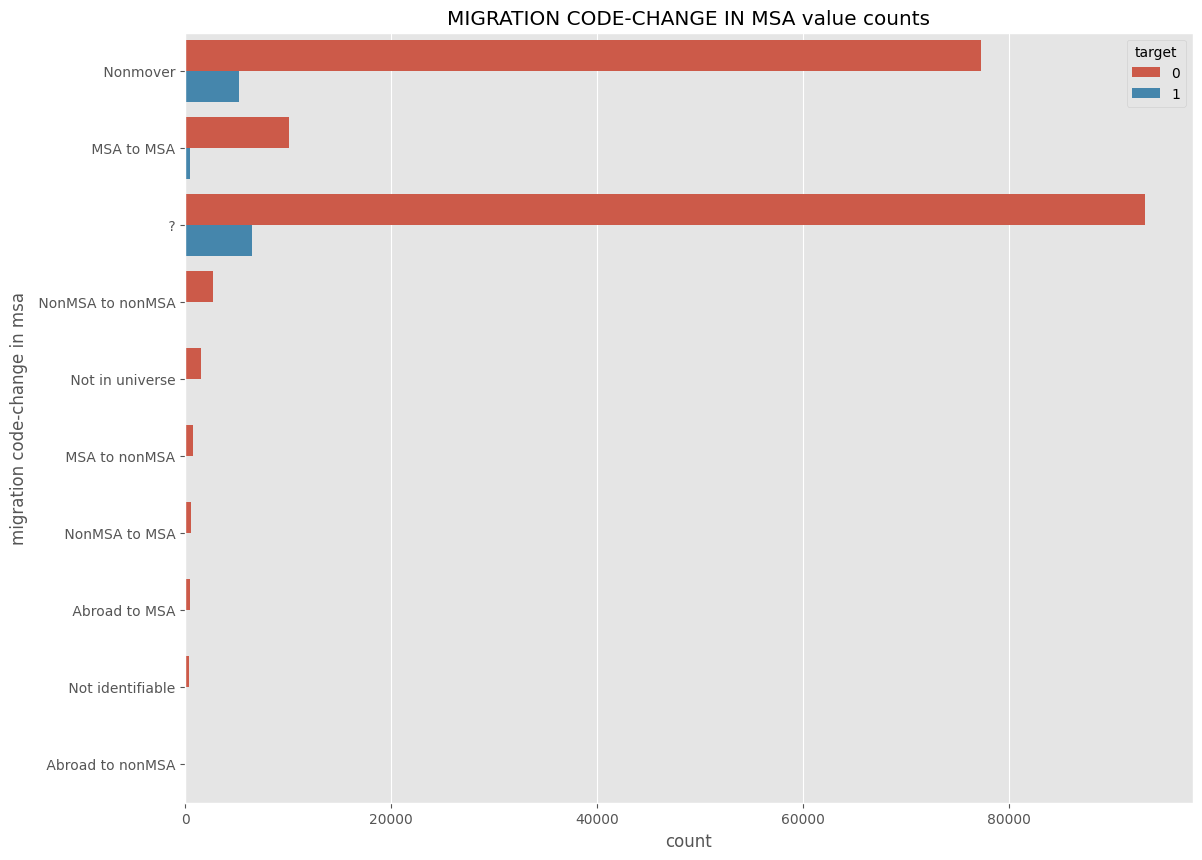

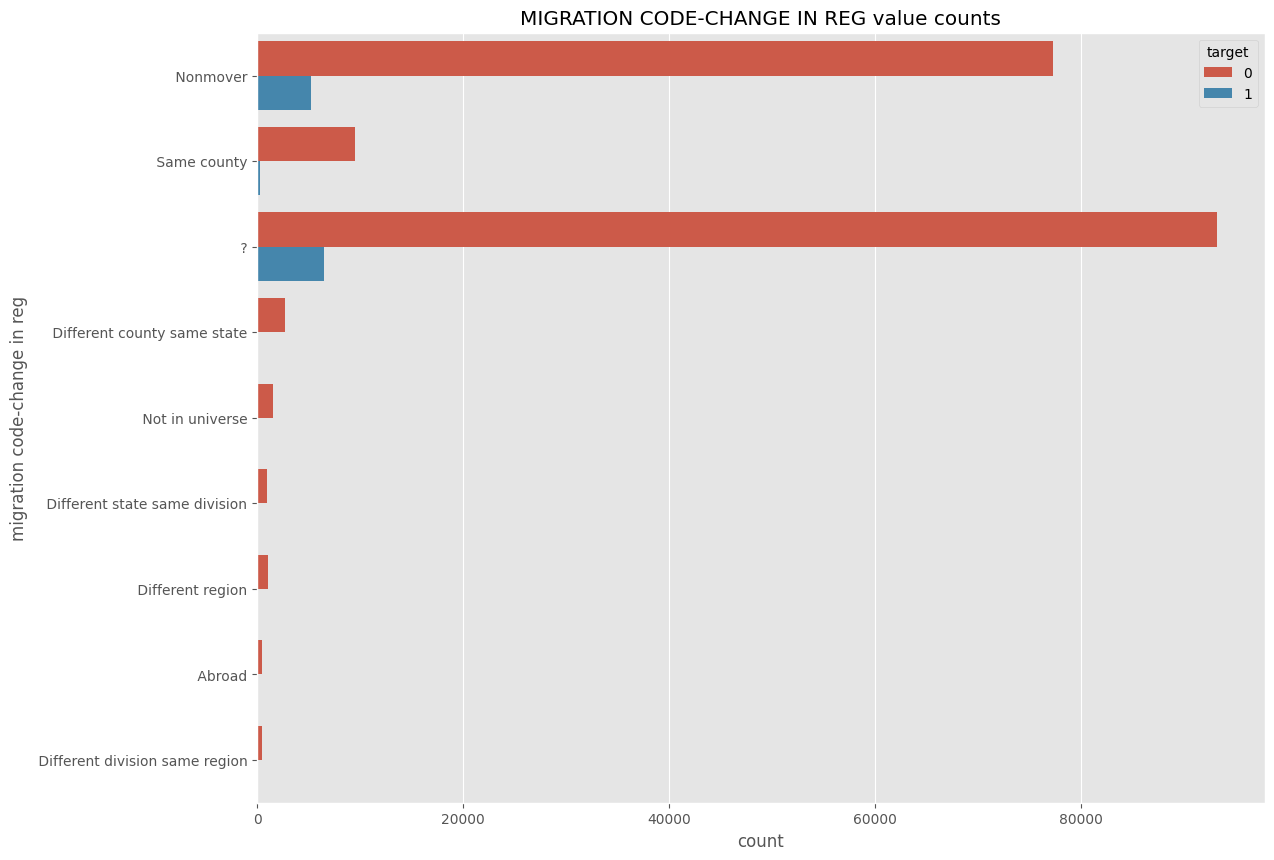

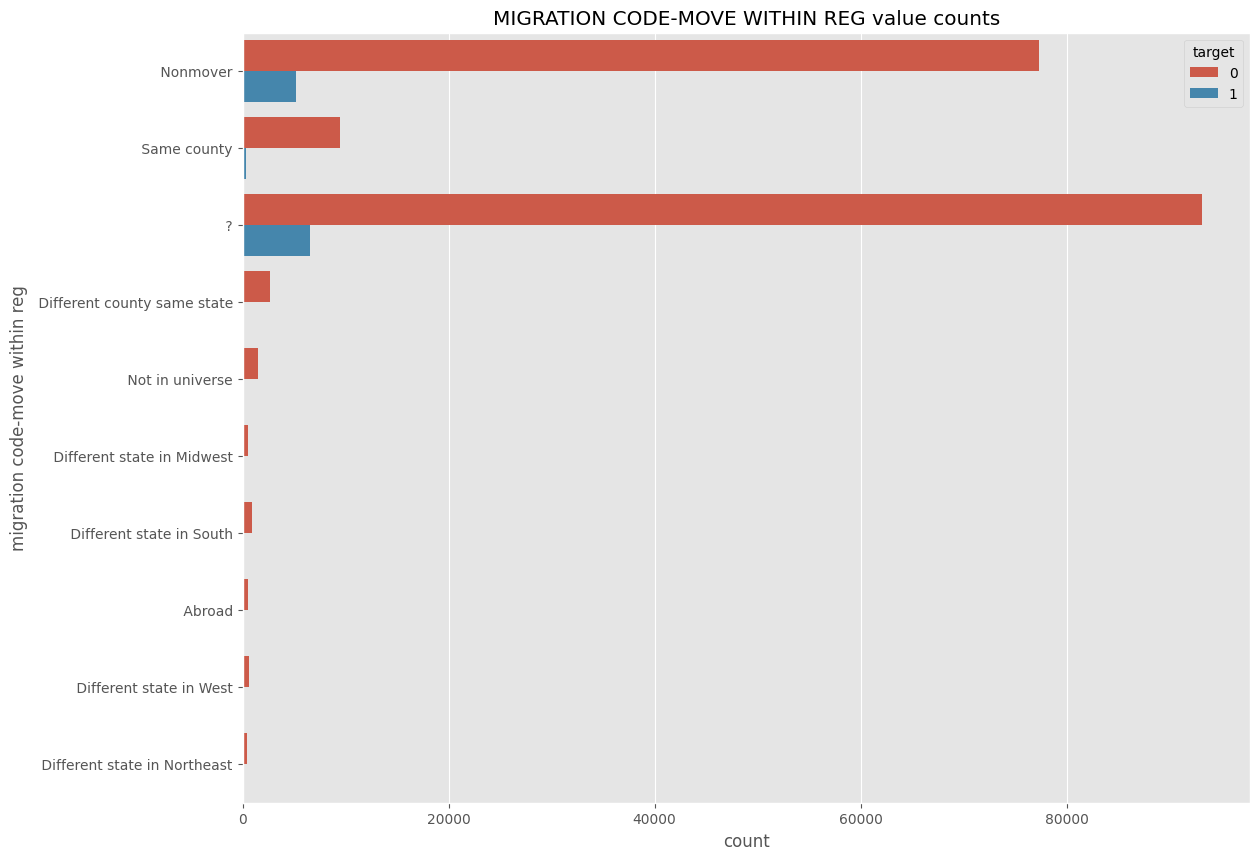

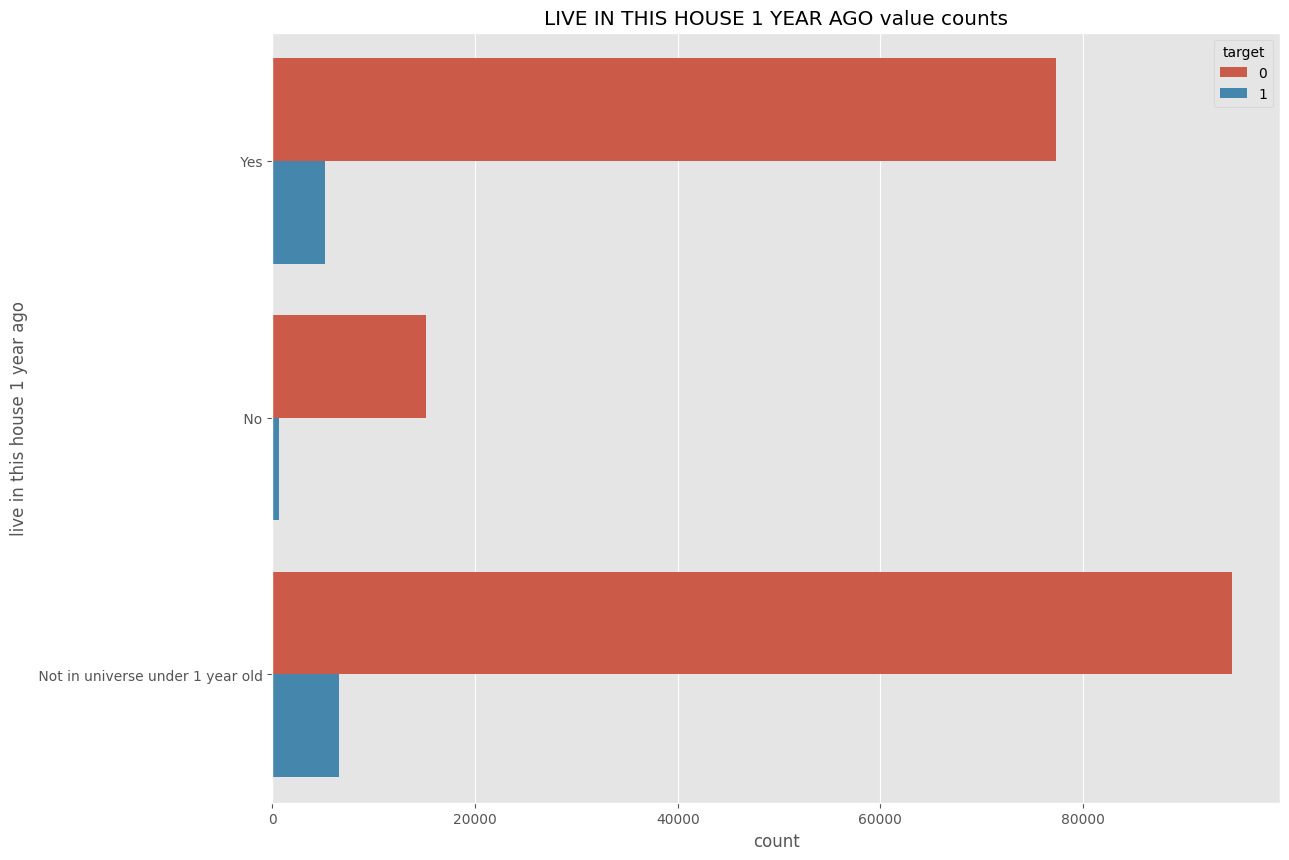

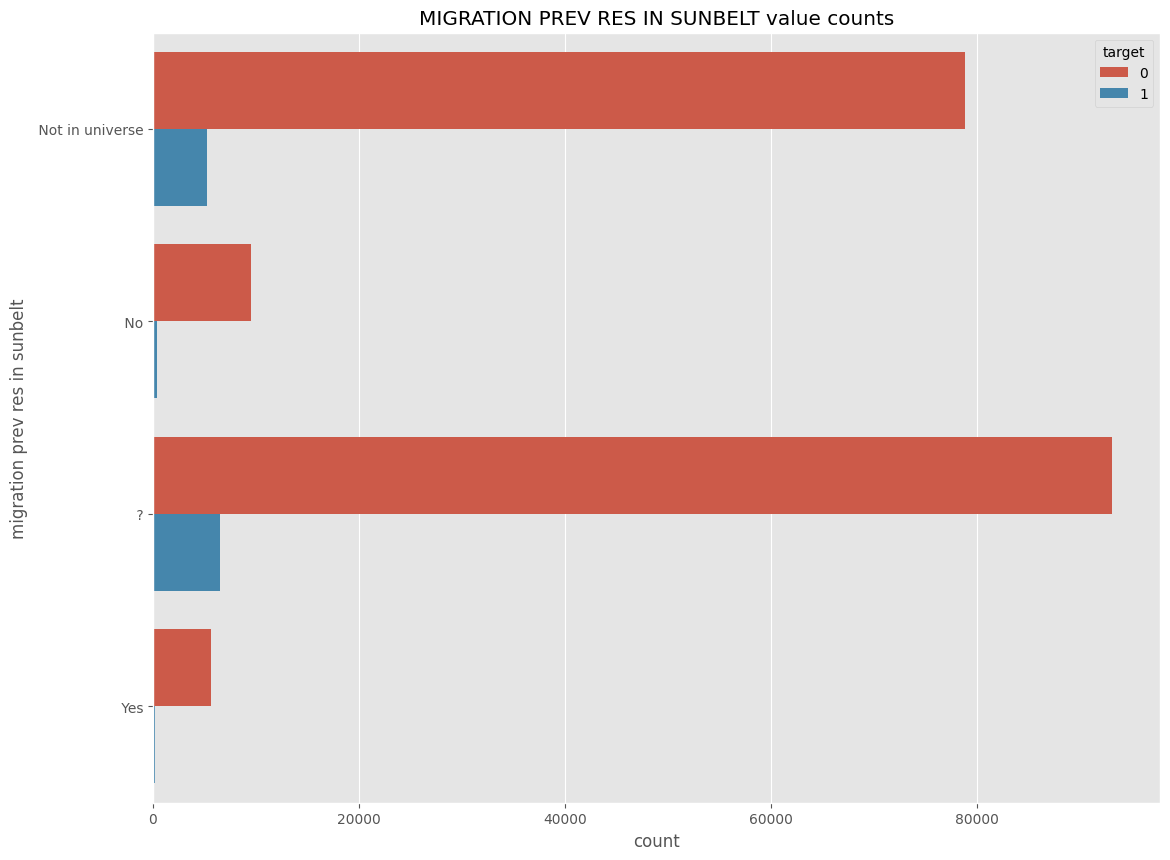

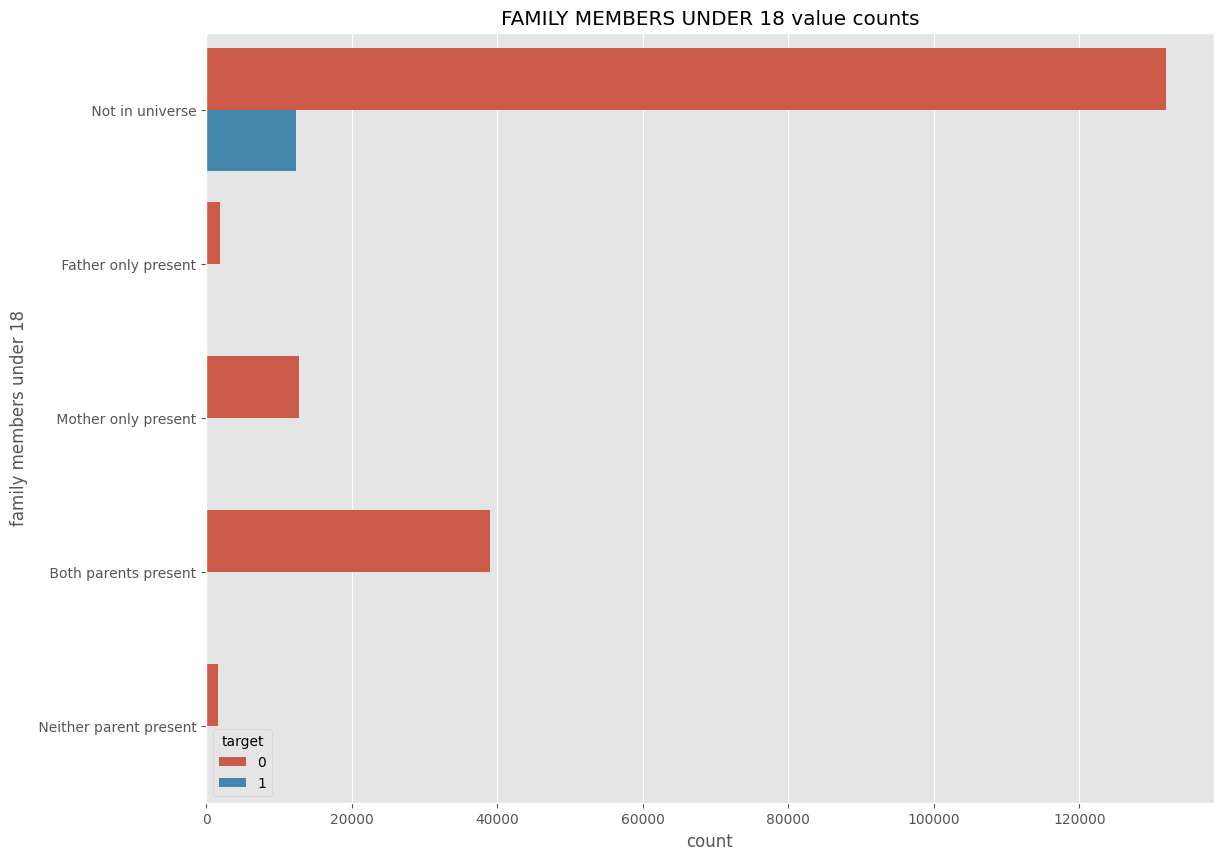

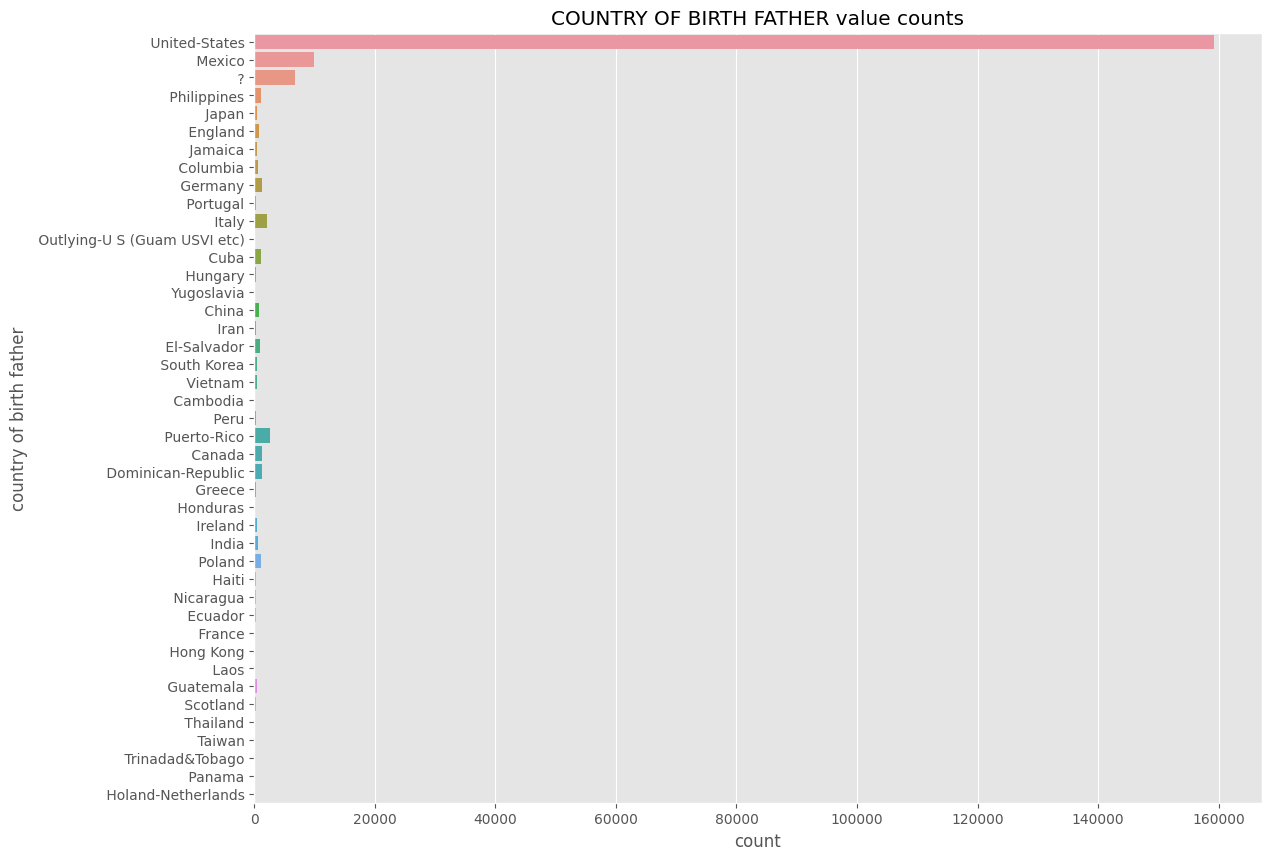

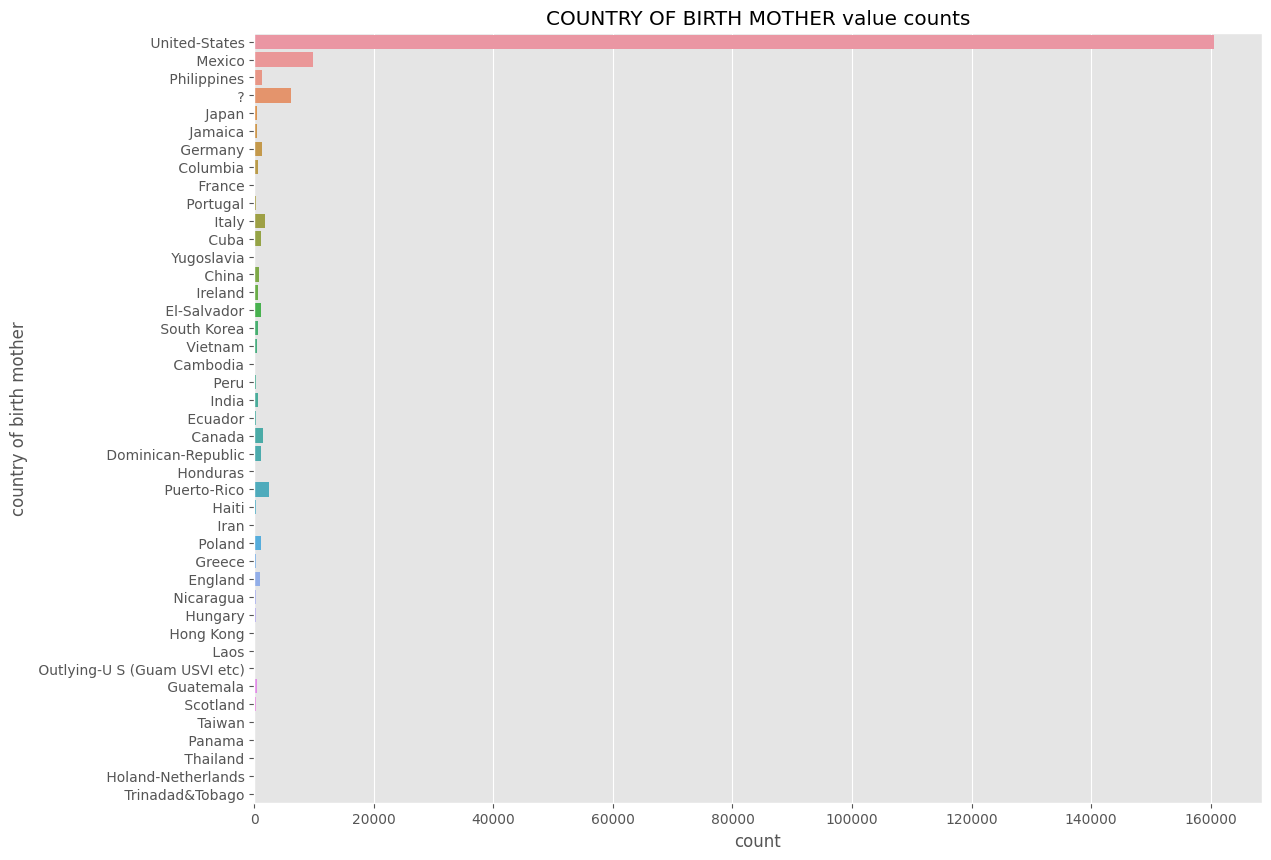

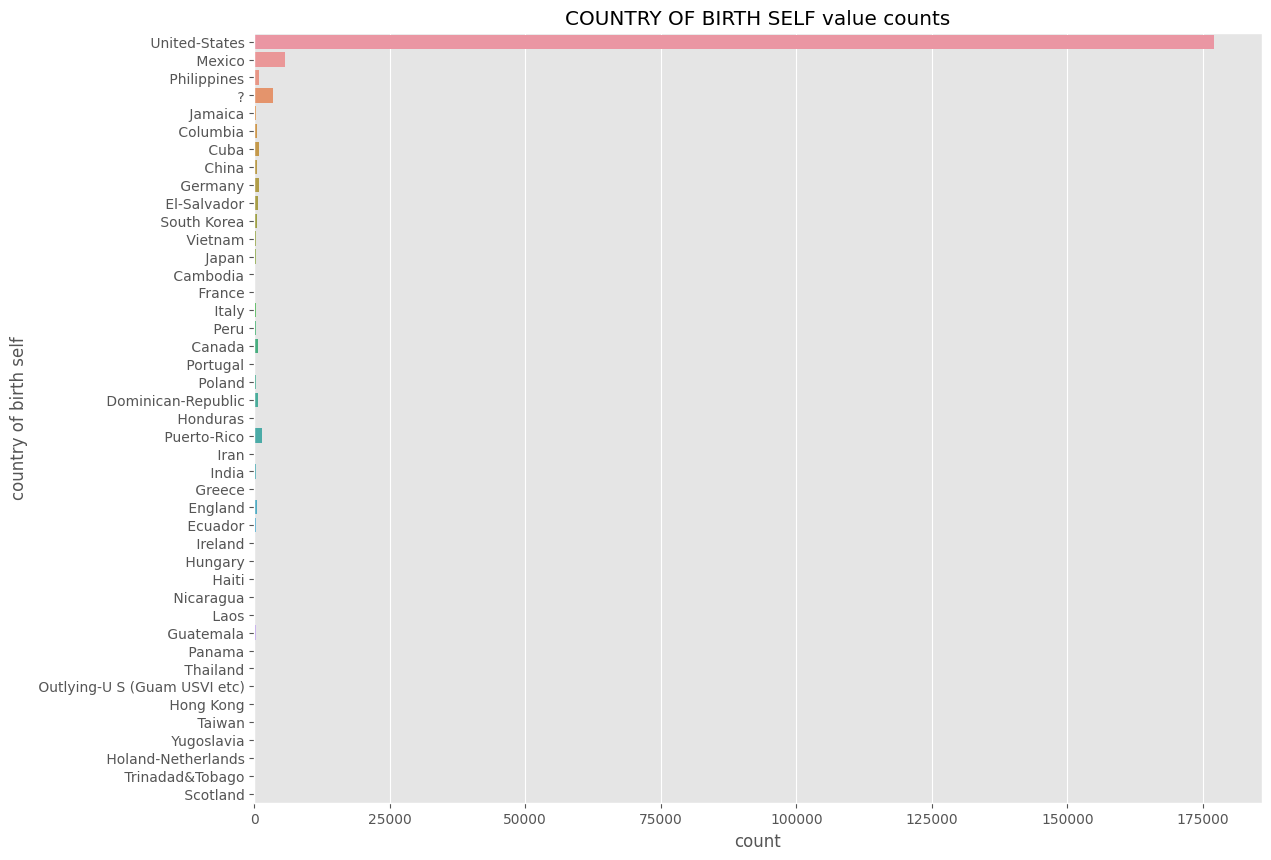

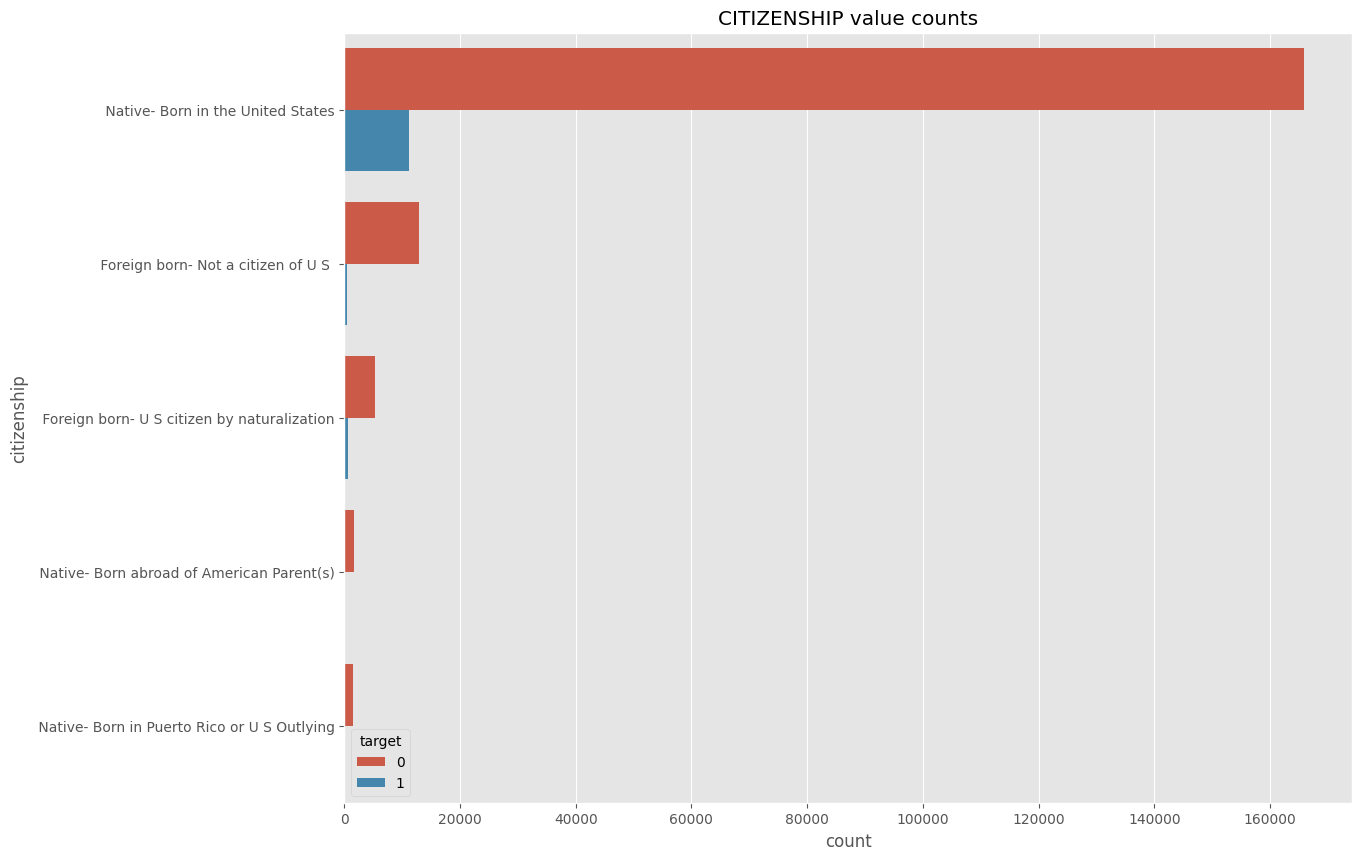

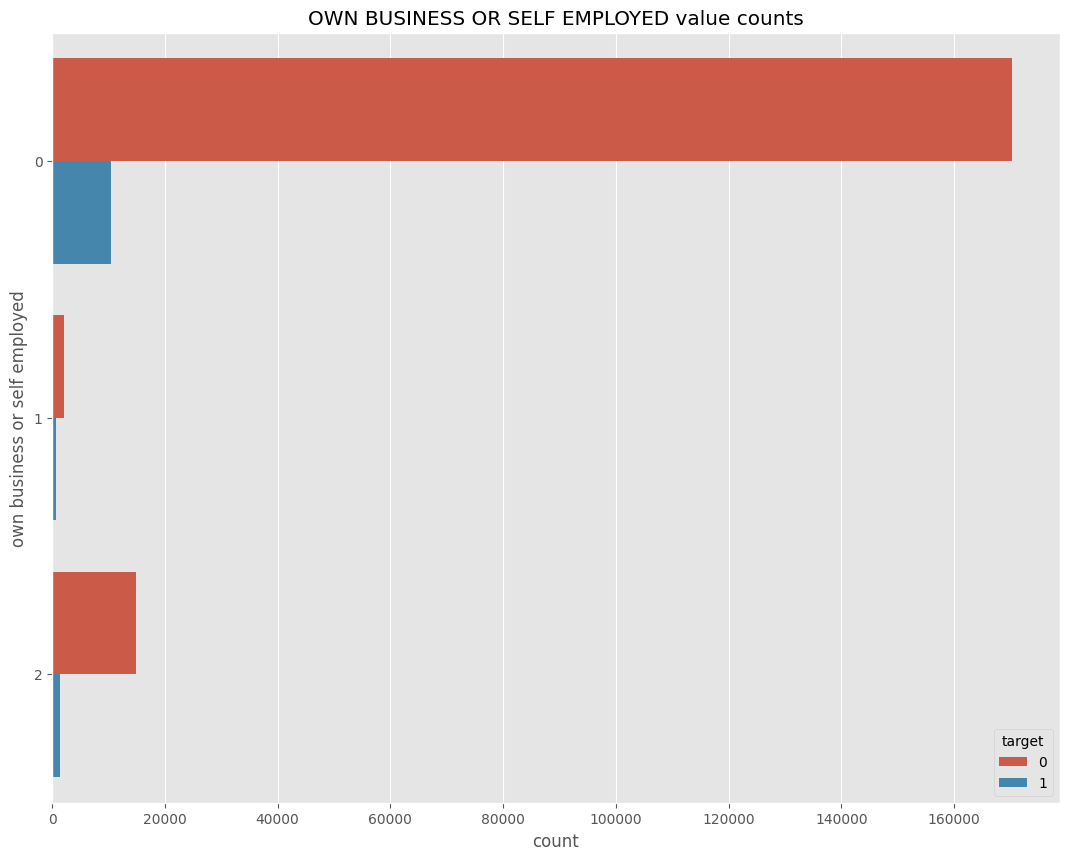

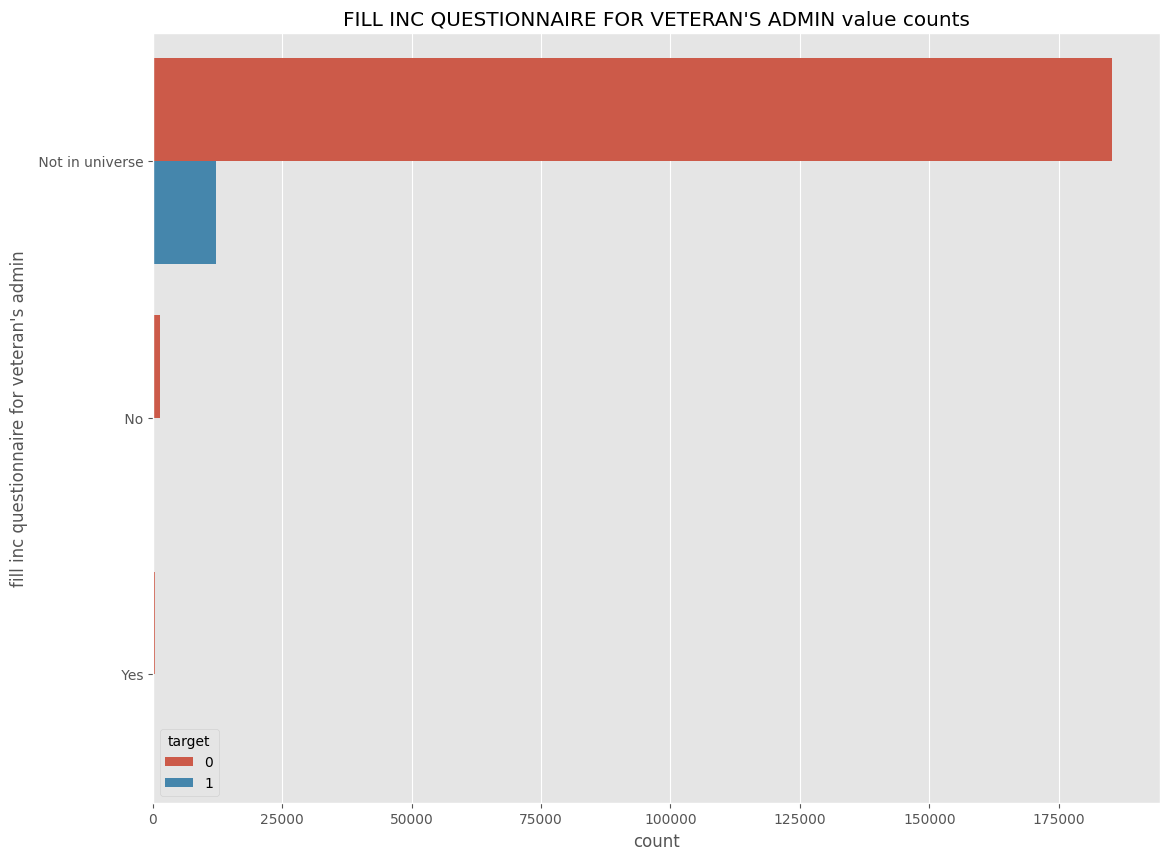

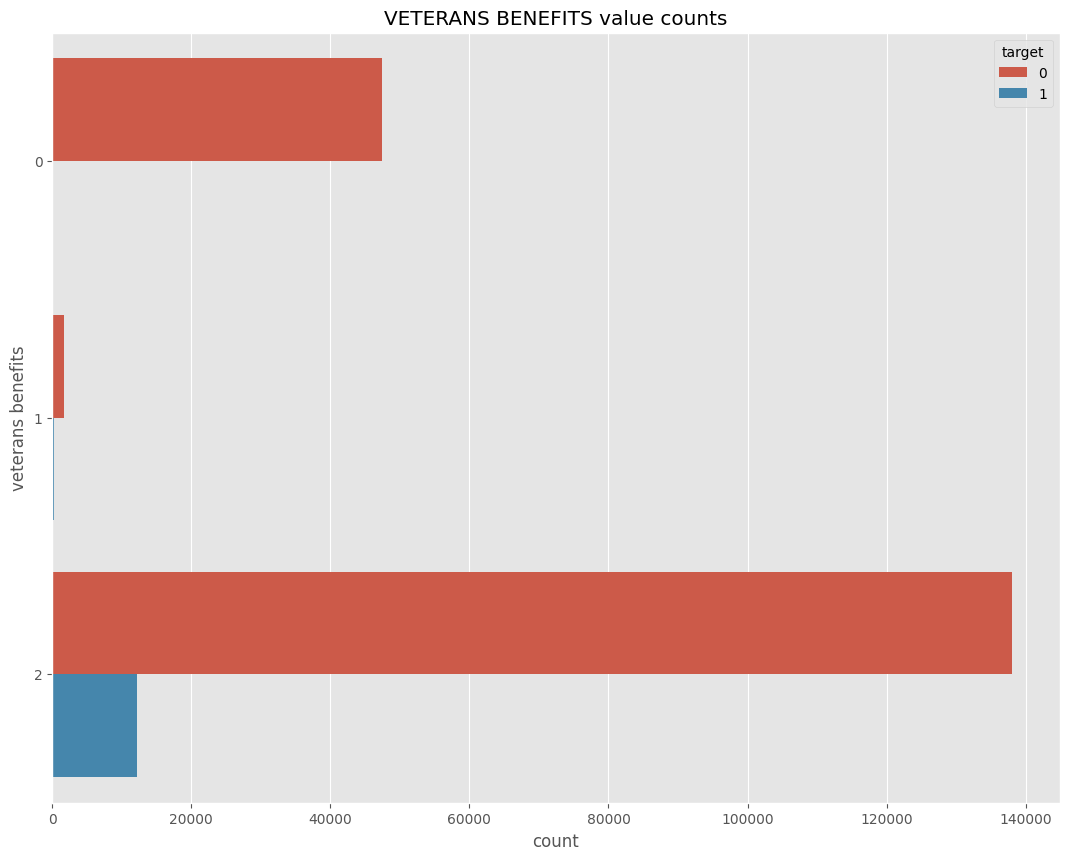

In [20]:
for col in categorical_cols:
    plot_categorical(df, col)

Important things to notice here are the following:
- we have many features where some categories never appear in one of the target classes, which can be a good decision boundry maker;
- generally, the features seem relevant;
- despite the fact that all features are claimed to be nominal, we could try to encode `education` in the ordinal style, however, that would be subjective, so we would treat all categorical variables as nominal;
- big number of categorical features also suggests paying much attention to categorical encoding.

## Categorical features encoding

We are dealing with a lot of categorical features that are expected to be important. We don't want to form a sparse input, so we won't use OHE. We also wouldn't like to use plain target encoding, leave-one-out or even M-esimates as they tend to overfit. We would like to have the most useful encoding and not overfit - and here Catboost encoding is the best candidate.
Let's start with it.
Later we could experiment with applying WoE encoding.

In [21]:
from category_encoders.cat_boost import CatBoostEncoder

# Let's shuffle the dataset beforehand
X, y = df.drop(columns='target'), df['target']

perm = np.random.permutation(len(X)) 
X = X.iloc[perm].reset_index(drop=True) 
y = y.iloc[perm].reset_index(drop=True)

X_test, y_test = test_df.drop(columns='target'), test_df['target']

# Let's apply catboost encoding with some amount of random noise
cat_encoder = CatBoostEncoder(cols=categorical_cols, sigma=0.05, random_state=2022)

X = cat_encoder.fit_transform(X, y)
X_test = cat_encoder.transform(X_test)

Many of the features are highly correlated.
That could be big deal for linear models:

In [22]:
X.corr().style.applymap(lambda x: "background-color: coral" if abs(x)>=0.7 else "background-color: white")

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,mace,hispanic Origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,divdends from stocks,tax filer status,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year
age,1.000000,0.185120,0.167506,0.143744,0.268038,0.036938,0.180007,0.577277,0.175264,0.153686,0.084413,0.114564,-0.051877,0.056379,0.016472,0.019072,0.053590,0.063351,0.104976,0.383664,0.072672,0.052423,0.599541,0.649366,0.127321,0.131916,0.129883,0.070834,0.068593,0.140887,0.721946,0.122739,0.115088,0.038156,0.060232,0.022425,0.084704,0.687409,0.206181
class of worker,0.185120,1.000000,0.644833,0.509831,0.354600,0.145960,0.020060,0.365688,0.681169,0.570315,0.059466,0.056634,0.104486,0.223291,-0.063227,0.499151,0.098683,0.090896,0.025539,0.568291,-0.007483,-0.005135,0.380905,0.367730,0.033449,0.031304,0.031470,-0.012261,-0.009224,0.559568,0.475974,0.045324,0.042461,0.017615,0.025637,0.166609,0.001831,0.459005,0.757671
industry code,0.167506,0.644833,1.000000,0.534982,0.380012,0.175451,0.062684,0.354003,0.938973,0.558232,0.051166,0.065163,0.108549,0.258684,-0.041871,0.452447,0.082524,0.091870,0.025999,0.533409,-0.007577,-0.004456,0.373502,0.363408,0.033019,0.030118,0.028952,-0.009625,-0.007241,0.604829,0.436595,0.051982,0.048887,0.027003,0.031603,0.138405,-0.005006,0.405281,0.700854
occupation code,0.143744,0.509831,0.534982,1.000000,0.560145,0.058712,0.083111,0.288052,0.546057,0.831003,0.080132,0.086734,0.149661,0.152157,0.005431,0.323600,0.164023,0.110075,0.058961,0.398866,-0.000502,0.001635,0.318210,0.310916,0.027516,0.026492,0.025885,-0.002482,0.001575,0.387009,0.305418,0.086049,0.084864,0.073082,0.044935,0.113606,-0.001770,0.274701,0.509919
education,0.268038,0.354600,0.380012,0.560145,1.000000,0.034591,0.066438,0.315635,0.383581,0.537942,0.090989,0.123689,0.044060,0.124204,0.015959,0.207649,0.155837,0.105182,0.118905,0.393844,0.004645,0.006360,0.325926,0.337312,0.038044,0.038392,0.037061,0.000570,0.005175,0.331319,0.392705,0.127770,0.126119,0.114332,0.055066,0.114971,0.019366,0.359507,0.381254
wage per hour,0.036938,0.145960,0.175451,0.058712,0.034591,1.000000,0.005056,0.084126,0.180988,0.085337,0.005911,0.030627,0.023021,0.612005,0.028218,0.136631,-0.001082,0.010993,-0.005731,0.141775,0.004839,0.003774,0.088935,0.088244,0.011863,0.012061,0.011456,0.003782,0.004472,0.191543,0.116522,0.018003,0.018975,0.011957,0.014810,0.030654,-0.001691,0.109822,0.195687
enrolled in edu inst last wk,0.180007,0.020060,0.062684,0.083111,0.066438,0.005056,1.000000,0.242007,0.066269,0.064769,0.025250,0.015759,-0.000196,0.011869,0.086118,0.037775,0.020229,0.010038,0.020341,0.131944,0.034795,0.024564,0.212810,0.214942,0.003008,0.004481,0.002864,0.020087,0.019159,-0.035237,0.085134,0.016293,0.018821,0.007347,0.031675,0.003815,0.043638,-0.129410,0.053050
marital status,0.577277,0.365688,0.354003,0.288052,0.315635,0.084126,0.242007,1.000000,0.370365,0.313044,0.125472,0.068299,0.010244,0.126234,0.020237,0.189556,0.066715,0.056267,0.061094,0.773854,0.038272,0.026145,0.643117,0.554276,0.075430,0.079510,0.078358,0.037681,0.035534,0.319248,0.632330,0.067009,0.064483,0.016321,0.034189,0.079347,0.045441,0.568179,0.430080
major industry code,0.175264,0.681169,0.938973,0.546057,0.383581,0.180988,0.066269,0.370365,1.000000,0.576902,0.052394,0.060895,0.110656,0.270418,-0.048855,0.478686,0.082709,0.093154,0.02

## Clustering

For a newly added feature `cluster_number` to make sense, we'd need to use an algorithm that doesn't need a predefined number of clusters. 
However, we have quite a large dataset and fitting of DBSCAN could take forever. 
Let's go on with KMeans and the elbow rule first:

In [23]:
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the data first
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

Fit several reasonable cluster numbers to plot an "elbow rule" curve:

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [02:43<00:00, 10.21s/it]


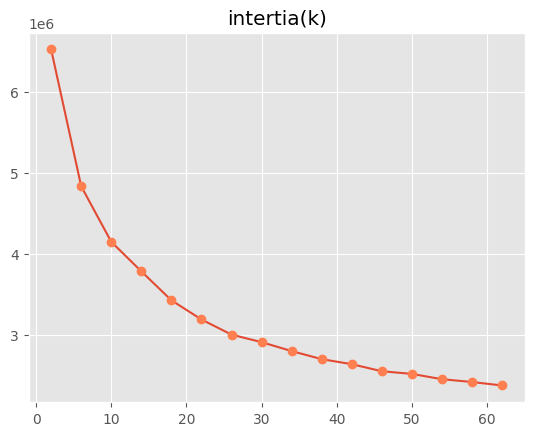

In [24]:
def run_elbow_check(X: pd.DataFrame, k_max: int, step: int):
    inertia_values = []
    k_values = []
    for k in tqdm(range(2, k_max, step)):
        k_means = KMeans(n_clusters=k, n_init=5, random_state=2022)
        k_means = k_means.fit(X)
        clusters = k_means.predict(X)
        inertia_values.append(k_means.inertia_)
        k_values.append(k)
    return k_values, inertia_values

k_values, inertia_values = run_elbow_check(X_scale, k_max=63, step=4)

# Choose k with "elbow rule"
plt.plot(k_values, inertia_values)
plt.plot(k_values, inertia_values, 'o', color='coral')

plt.title('intertia(k)')
plt.show()

It's hard to find the exact elbow here, let's take the point where we reach the plateu for the first time - 46:

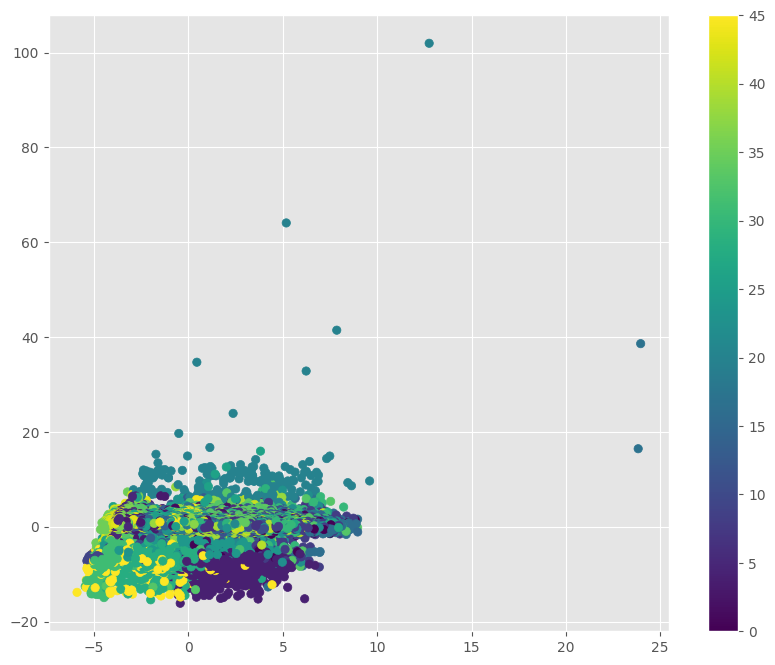

In [25]:
# Reduce dims with PCA (tSNE couldn't handle) and visualize cluster labels
clusterer = KMeans(n_clusters=46, n_init=5, random_state=2022)
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scale)
cluster_labels = clusterer.fit_predict(X_scale)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
plt.colorbar()
plt.show()

Well, we obviously cannot judge whether the clustering was performed good or not just by the fact that in PCA projection we don't observe any separable clusters, that's the way it works. 
Unfortunatelly, t-SNE took too long to converge on our training data, so we won't be able to share it. 
Let's just hope that the clustering makes sense. 
We can see it on the interpretability step, whether the feature with cluster number makes sense.

In [26]:
# Get cluster label as a feature
df['cluster_num'] = clusterer.predict(X_scale)
test_df['cluster_num'] = clusterer.predict(scaler.transform(X_test))

# Add cluster_num as a categorical feature
categorical_cols.append('cluster_num')

### PCA

Let's check how many components are left if we would like to preserve at least 90% of the variance explained by the components:


In [27]:
pca90 = PCA(n_components=0.95)

pca90.fit_transform(X_scale).shape

(199523, 27)

We indeed see that number of components is reduced significantly, we can apply PCA at least for the linear models to get around the issue of multicollinearity. However, I wouldn't apply it to the data generally, I don't believe that RF or LightGBM would benefit from PCA transformation. Thus, PCA can be applied as pipeline step for some of the models.

## Model evaluation pipeline

We would next proceed with modelling, experiments on under- and over-sampling.
Let's first define the helpers needed for smooth experimentation.

In [28]:
from category_encoders.woe import WOEEncoder
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE
from imblearn.under_sampling import NearMiss, RandomUnderSampler

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import geometric_mean_score
from sklearn.base import clone

from lightgbm import LGBMClassifier

Below we define a class that consecutively applies categorical columns, performs resampling if resamplers are provided and returns the data:

In [29]:
# Define preprocessor class
class DataPreprocessor:
    def __init__(self, encoders, resamplers, categorical_cols, numeric_cols):
        self.encoders = encoders
        self.resamplers = resamplers
        self.categorical_cols = categorical_cols
        self.numeric_cols = numeric_cols
        
    def transform(self, 
                  X_train, y_train, 
                  X_val, y_val):
        # Apply encoders and resamplers consecutively
        if len(self.encoders) > 0:
            X_train, y_train, X_val, y_val = self._apply_encoders(
                X_train, y_train, X_val, y_val
            )
        if len(self.resamplers) > 0:
            X_train, y_train = self._apply_resamplers(
                X_train, y_train
            )
        return X_train, y_train, X_val, y_val
        
    def _apply_encoders(self, 
                        X_train, y_train, 
                        X_val, y_val):
        X_cat_train, X_num_train = X_train[self.categorical_cols], X_train[self.numeric_cols]
        X_cat_val, X_num_val = X_val[self.categorical_cols], X_val[self.numeric_cols]
        
        train_encoded, val_encoded = [], []
        for i, encoder in enumerate(self.encoders):
            train_encoded.append(
                encoder.fit_transform(X_cat_train, y_train).add_prefix(f'encoder_{i} ')
            )
            val_encoded.append(
                encoder.transform(X_cat_val).add_prefix(f'encoder_{i} ')
            )

        X_cat_train = pd.concat(train_encoded, axis=1)
        X_cat_val = pd.concat(val_encoded, axis=1)
        X_train = pd.concat([X_num_train, X_cat_train], axis=1)
        X_val = pd.concat([X_num_val, X_cat_val], axis=1)
        
        return X_train, y_train, X_val, y_val
    
    def _apply_resamplers(self, X_train, y_train):
        for resampler in self.resamplers:
            X_train, y_train = resampler.fit_resample(
                X_train, y_train
            )
        return X_train, y_train

Next let's define a cross validation function. 
The pipeline is the following:

Use our stratified splitter to generate a split, then for each split:
- Apply preprocessor to the data (encoders are fitted on train part and are applied to val part, resamplers are applied to train part only);
- Fit an estimator to the data (a estimator is expected to consist of a scaler, if any, and a model);
- Save the scores and the estimator received on the current split.


In [30]:
def cross_validate(X_cv: pd.DataFrame, 
                   y_cv: pd.DataFrame, pipe: Pipeline, 
                   scoring_func=geometric_mean_score,
                   processor: DataPreprocessor = None, reduce: bool = True, silence: bool = False): 
    train_scores, val_scores = [], []
    for i, (train_idx, val_idx) in enumerate(cv.split(X_cv, y_cv)):
        if not silence:
            print(f'Running Fold {i+1}')
        X_train, X_val = X_cv.iloc[train_idx], X_cv.iloc[val_idx]
        y_train, y_val = y_cv.iloc[train_idx], y_cv.iloc[val_idx]
        if processor is not None:
            X_train, y_train, X_val, y_val = processor.transform(X_train, y_train, X_val, y_val)
        clone_pipe = clone(pipe)
        clone_pipe.fit(X_train, y_train)
        train_scores.append(
            scoring_func(y_train, clone_pipe.predict(X_train))
        )
        val_scores.append(
            scoring_func(y_val, clone_pipe.predict(X_val))
        )
    if reduce:
        return np.mean(train_scores), np.mean(val_scores)
    else:
        return train_scores, val_scores

### Experiment with categorical encoding and PCA

Let's check if everything works by comparing WoE and CatBoost encoders scores for a LogReg model with StandardScaler:

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Cross validate LogReg with StandardScaler on the data with CatBoost encoder applied
X_cv, y_cv = df.drop(columns='target'), df['target']
pipe = make_pipeline(
    StandardScaler(), PCA(n_components=0.95), LogisticRegression(class_weight='balanced', random_state=2022)
)
processor = DataPreprocessor(encoders=[cat_encoder], 
                             resamplers=[], 
                             categorical_cols=categorical_cols, 
                             numeric_cols=numeric_cols)

train_scores, val_scores = cross_validate(X_cv, y_cv, pipe, processor=processor, reduce=False)
print(f'''G-Mean is:
====train===={round(np.mean(train_scores), 5)}, {round(np.std(train_scores), 5)}
=====val====={round(np.mean(val_scores), 5)}, {round(np.std(val_scores), 5)}''')

Running Fold 1
Running Fold 2
Running Fold 3
Running Fold 4
Running Fold 5
G-Mean is:
====train====0.86485, 0.00061
=====val=====0.86572, 0.00195


In [33]:
# Using WoE encoder instead of CatBoost
woe_encoder = WOEEncoder(randomized=True)
processor = DataPreprocessor(encoders=[woe_encoder], 
                             resamplers=[], 
                             categorical_cols=categorical_cols, 
                             numeric_cols=numeric_cols)

train_scores, val_scores = cross_validate(X_cv, y_cv, pipe, processor=processor, reduce=False)
print(f'''G-Mean is:
====train===={round(np.mean(train_scores), 5)}, {round(np.std(train_scores), 5)}
=====val====={round(np.mean(val_scores), 5)}, {round(np.std(val_scores), 5)}''')

Running Fold 1
Running Fold 2
Running Fold 3
Running Fold 4
Running Fold 5
G-Mean is:
====train====0.86174, 0.00074
=====val=====0.86087, 0.00306


It seems that from G-mean standpoint there's not a big difference between 2 types of encoding. 
However, as we observe a bit bigger validation mean scorefor CatBoost encoding, let's go on with it.

## Over- and under-sampling

Now let's try to compare the effect of some over- and under-sampling techniques.
As the data we are dealing with are quite large and we need to apply resampler to each fold, let's examine only those approaches that are approximately fast to compute:
- SMOTE
- Random Over-Sampling
- Random Under-Sampling
- Near Miss
- Combination of SMOTE with Random Under-Sampling

Remember, we don't apply resampling to validation part. It should be original. 
We also decided to first resample then scale. That's the more general approach.

In [34]:
smote = SMOTE(n_jobs=-1)
# Define a preprocessor with CatBoost encoder and SMOTE resampler
processor = DataPreprocessor(encoders=[cat_encoder], 
                             resamplers=[smote], 
                             categorical_cols=categorical_cols, 
                             numeric_cols=numeric_cols)

train_scores, val_scores = cross_validate(X_cv, y_cv, pipe, processor=processor, reduce=False)
print(f'''G-Mean is:
====train===={round(np.mean(train_scores), 5)}, {round(np.std(train_scores), 5)}
=====val====={round(np.mean(val_scores), 5)}, {round(np.std(val_scores), 5)}''')

Running Fold 1
Running Fold 2
Running Fold 3
Running Fold 4
Running Fold 5
G-Mean is:
====train====0.87449, 0.00034
=====val=====0.86524, 0.00228


In [35]:
ros = RandomOverSampler(random_state=2022)
# Define a preprocessor with CatBoost encoder and Random Over-Sampler
processor = DataPreprocessor(encoders=[cat_encoder], 
                             resamplers=[ros], 
                             categorical_cols=categorical_cols, 
                             numeric_cols=numeric_cols)

train_scores, val_scores = cross_validate(X_cv, y_cv, pipe, processor=processor, reduce=False)
print(f'''G-Mean is:
====train===={round(np.mean(train_scores), 5)}, {round(np.std(train_scores), 5)}
=====val====={round(np.mean(val_scores), 5)}, {round(np.std(val_scores), 5)}''')

Running Fold 1
Running Fold 2
Running Fold 3
Running Fold 4
Running Fold 5
G-Mean is:
====train====0.86485, 0.00051
=====val=====0.86691, 0.00125


In [36]:
rus = RandomUnderSampler(random_state=2022)
# Define a preprocessor with CatBoost encoder and Random Under-Sampler
processor = DataPreprocessor(encoders=[cat_encoder], 
                             resamplers=[rus], 
                             categorical_cols=categorical_cols, 
                             numeric_cols=numeric_cols)

train_scores, val_scores = cross_validate(X_cv, y_cv, pipe, processor=processor, reduce=False)
print(f'''G-Mean is:
====train===={round(np.mean(train_scores), 5)}, {round(np.std(train_scores), 5)}
=====val====={round(np.mean(val_scores), 5)}, {round(np.std(val_scores), 5)}''')

Running Fold 1
Running Fold 2
Running Fold 3
Running Fold 4
Running Fold 5
G-Mean is:
====train====0.86529, 0.00287
=====val=====0.86636, 0.00237


In [37]:
nm = NearMiss(n_jobs=-1)
# Define a preprocessor with CatBoost encoder and NearMiss resampler
processor = DataPreprocessor(encoders=[cat_encoder], 
                             resamplers=[nm], 
                             categorical_cols=categorical_cols, 
                             numeric_cols=numeric_cols)

train_scores, val_scores = cross_validate(X_cv, y_cv, pipe, processor=processor, reduce=False)
print(f'''G-Mean is:
====train===={round(np.mean(train_scores), 5)}, {round(np.std(train_scores), 5)}
=====val====={round(np.mean(val_scores), 5)}, {round(np.std(val_scores), 5)}''')

Running Fold 1
Running Fold 2
Running Fold 3
Running Fold 4
Running Fold 5
G-Mean is:
====train====0.88877, 0.00406
=====val=====0.80815, 0.0023


In [38]:
# Define a preprocessor with CatBoost encoder and SMOTE resampler
processor = DataPreprocessor(encoders=[cat_encoder], 
                             resamplers=[smote, rus], 
                             categorical_cols=categorical_cols, 
                             numeric_cols=numeric_cols)

train_scores, val_scores = cross_validate(X_cv, y_cv, pipe, processor=processor, reduce=False)
print(f'''G-Mean is:
====train===={round(np.mean(train_scores), 5)}, {round(np.std(train_scores), 5)}
=====val====={round(np.mean(val_scores), 5)}, {round(np.std(val_scores), 5)}''')

Running Fold 1
Running Fold 2
Running Fold 3
Running Fold 4
Running Fold 5
G-Mean is:
====train====0.87417, 0.00033
=====val=====0.86508, 0.00229


Well, first conclusion that we can make is that there isn't a resampling approach here that significantly improves the validation G-Mean.
This could be explained by the fact that there's quite a big dataset we have already, so even under-respresented class has moderate number of records.
Another explanation can be just due to the fact that methods we use simply do not work: sophisticated methods as SMOTE and NearMiss lead to overfitting by increasing the gap between training and validation scores and increasing the variance between scores on training folds, random methods simply do not change much.

We would not go on with any of the resampling techniques here, as they do not increase the quality significantly but bring either overfitting or can potentially bring difficulties at the stacking step. It's simply not worthy. 

## Modelling experiments

So, as we decided which transformations should be applied to the data, we can perform them beforehand on each CV split and preserve the folds. This way it would be much easier and faster for us to tune hyperparameters on CV.

So, we should perform preparation in the following manner: on each CV split, we fit CatBoost encoding on the training part and then apply the encoder to both training and val part. Then we preserve the encoder, valition part, training part. After all, we would have 5 training folds encoded, 5 validation folds encoded with respective encoder and 5 encoder fitted on respective training fold (which can later be used in training).

In [39]:
# Add encoder wrapper to work with the whole dataframe taking column types into account
class EncoderWrapper:
    def __init__(self, base_encoder, categorical_cols, numeric_cols):
        self.encoder = base_encoder
        self.categorical_cols = categorical_cols
        self.numeric_cols = numeric_cols
        self.is_fitted = False
        
    def fit(self, X_train, y_train):
        X_cat_train, X_num_train = X_train[self.categorical_cols], X_train[self.numeric_cols]
        X_cat_train = self.encoder.fit(X_cat_train, y_train)
        self.is_fitted = True
             
    def transform(self, X):
        if not self.is_fitted:
            raise RuntimeError('The encoder shall be fitted first')
        X_cat, X_num = X[self.categorical_cols], X[self.numeric_cols]
        
        X_cat = self.encoder.transform(X_cat)
        X = pd.concat([X_num, X_cat], axis=1)
        return X
    
    def fit_transform(self, X_train, y_train):
        self.fit(X_train, y_train)
        return self.transform(X_train)
    
    
def prepare_folds_encode(X_cv, y_cv, cv, encode=True):
    train_folds = []
    val_folds = []
    fitted_encoders = []

    for i, (train_idx, val_idx) in enumerate(cv.split(X_cv, y_cv)):
            X_train, X_val = X_cv.iloc[train_idx], X_cv.iloc[val_idx]
            y_train, y_val = y_cv.iloc[train_idx], y_cv.iloc[val_idx]
            if encode:
                # Define new encoder instance
                encoder = EncoderWrapper(
                    CatBoostEncoder(cols=categorical_cols, sigma=0.05, random_state=2022), 
                    categorical_cols=categorical_cols, numeric_cols=numeric_cols
                )
                # Fit and apply encoder to train part
                X_train = encoder.fit_transform(X_train, y_train)
                # Apply encoder to val part
                X_val = encoder.transform(X_val)
                
                fitted_encoders.append(encoder)
            # Persist train and val parts and corresponding encoder
            train_folds.append(
                (X_train, y_train)
            )
            val_folds.append(
                (X_val, y_val)
            )
    if encode:    
        return train_folds, val_folds, fitted_encoders
    return train_folds, val_folds

# Prepare folds (encode, resample and save encoders) for hyperparameter tuning
train_folds, val_folds, fitted_encoders = prepare_folds_encode(X_cv, y_cv, cv)

Finally define a cross validation procedure for the estimator:

In [40]:
def cross_validate_estimator(estimator, train_folds, val_folds, return_estimators=False):
    trained_pipes, val_scores = [], []
    for fold in range(len(train_folds)):
        X_train, y_train = train_folds[fold]
        X_val, y_val = val_folds[fold]
        clone_estimator = clone(estimator)
        clone_estimator.fit(X_train, y_train)
        trained_pipes.append(clone_estimator)
        val_scores.append(
                geometric_mean_score(y_val, clone_estimator.predict(X_val))
            )

    if return_estimators:
        return np.mean(val_scores), trained_pipes
    return np.mean(val_scores)


# Check if it works
pipe = make_pipeline(
    StandardScaler(), PCA(n_components=0.95), LogisticRegression(class_weight='balanced', random_state=2022)
)
val_score = cross_validate_estimator(pipe, train_folds, val_folds)
print(f'VAL G-Mean is: {round(val_score, 5)}')

VAL G-Mean is: 0.86675


### Experiments and hyperparameter tuning

So let's experiment with the models and tune hyperparameters for them.
We would work with 4 models of different nature: Naive Bayess, Logistic Regression, Random Forest, LightGBM.
The justification for the choice is the following:
- different nature of the algorithms can make predictions less correlated, blending and stacking would benefit from that;
- models we chose are relatively fast to train (that's why we use only LightGBM among advanced boosting types, it is very similar to xgboost and CatBoost in its features but it's generally faster);

For each model let's define a hyperparameter tuning space and apply **optuna** to optimize it.

In [41]:
import optuna
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

best_params = {}

#### Naive Bayess:
There's actually nothing to tune in NB, so let's just fit it and preserve:

In [42]:
pipe = make_pipeline(
    StandardScaler(), GaussianNB()
)
val_score = cross_validate_estimator(pipe, train_folds, val_folds)
print(f'VAL G-Mean is: {round(val_score, 5)}')

VAL G-Mean is: 0.81373


#### Logistic Regression:

In [43]:
def optimize_lr(trial):
    param = {
        "penalty": trial.suggest_categorical('penalty', ['l1', 'l2']),
        "C": trial.suggest_float("C", 0.001, 100, log=True),
        "solver": trial.suggest_categorical('solver', ['liblinear', 'saga']),
        "class_weight": 'balanced',
        "random_state": 2022,
        "n_jobs": -1
    }
    scaler = trial.suggest_int('scaler', 0, 1)
    scalers = [StandardScaler(), RobustScaler()]
    pipe = make_pipeline(scalers[scaler], PCA(n_components=0.95), LogisticRegression(**param))
    val_score = cross_validate_estimator(pipe, train_folds, val_folds)
    return val_score

study = optuna.create_study(study_name="logreg", direction="maximize")
study.optimize(optimize_lr, n_trials=10)

[I 2022-12-06 12:50:01,647] A new study created in memory with name: logreg
[I 2022-12-06 12:50:07,091] Trial 0 finished with value: 0.5937076736263743 and parameters: {'penalty': 'l2', 'C': 0.013635422800404657, 'solver': 'saga', 'scaler': 1}. Best is trial 0 with value: 0.5937076736263743.
[I 2022-12-06 12:50:24,341] Trial 1 finished with value: 0.8667678735774993 and parameters: {'penalty': 'l1', 'C': 0.5504585031476318, 'solver': 'liblinear', 'scaler': 0}. Best is trial 1 with value: 0.8667678735774993.
[I 2022-12-06 12:50:28,868] Trial 2 finished with value: 0.5937076736263743 and parameters: {'penalty': 'l2', 'C': 2.1061363711153516, 'solver': 'saga', 'scaler': 1}. Best is trial 1 with value: 0.8667678735774993.
[I 2022-12-06 12:50:37,981] Trial 3 finished with value: 0.8667228545261821 and parameters: {'penalty': 'l2', 'C': 5.51082273083599, 'solver': 'saga', 'scaler': 0}. Best is trial 1 with value: 0.8667678735774993.
[I 2022-12-06 12:50:40,763] Trial 4 finished with value: 0.

In [44]:
# As Robust Scaler behaves worse, we would not remember scaler and use only Standard by default
best_params[study.study_name] = {k: v for k,v in study.best_params.items() if k != 'scaler'}

#### Random Forest:

In [45]:
def optimize_rf(trial):
    param = {
        "criterion": trial.suggest_categorical('criterion', ['gini', 'entropy']),
        "class_weight": trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample']),
        "max_depth": trial.suggest_int("max_depth", 1, 14),
        "min_samples_split": trial.suggest_int('min_samples_split', 2, 200),
        "n_estimators": trial.suggest_int('n_estimators', 50, 250),
        "max_features": trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        "random_state": 2022,
        "n_jobs": -1
    }
    pipe = make_pipeline(RandomForestClassifier(**param))
    val_score = cross_validate_estimator(pipe, train_folds, val_folds)
    return val_score

rf_study = optuna.create_study(study_name="rf", direction="maximize")
rf_study.optimize(optimize_rf, n_trials=10)

[I 2022-12-06 12:51:16,627] A new study created in memory with name: rf
[I 2022-12-06 12:51:45,247] Trial 0 finished with value: 0.857233316285094 and parameters: {'criterion': 'gini', 'class_weight': 'balanced', 'max_depth': 14, 'min_samples_split': 2, 'n_estimators': 136, 'max_features': 'log2'}. Best is trial 0 with value: 0.857233316285094.
[I 2022-12-06 12:51:56,150] Trial 1 finished with value: 0.8352238248160969 and parameters: {'criterion': 'gini', 'class_weight': 'balanced', 'max_depth': 3, 'min_samples_split': 21, 'n_estimators': 103, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.857233316285094.
[I 2022-12-06 12:52:30,888] Trial 2 finished with value: 0.8679523155646542 and parameters: {'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'max_depth': 11, 'min_samples_split': 9, 'n_estimators': 128, 'max_features': 'log2'}. Best is trial 2 with value: 0.8679523155646542.
[I 2022-12-06 12:52:51,808] Trial 3 finished with value: 0.8725274290859462 and paramet

In [46]:
best_params[rf_study.study_name] = rf_study.best_params

#### LightGBM:

In [47]:
def optimize_lgb(trial):
    param = {
        "boosting": trial.suggest_categorical('boosting', ['dart', 'gbdt']),
        "max_depth": trial.suggest_int("max_depth", 1, 9),
        "n_estimators": trial.suggest_int('n_estimators', 150, 500),
        "learning_rate": trial.suggest_float('learning_rate', 1e-3, 0.05, log=True),
        "min_data_in_leaf": trial.suggest_int('min_data_in_leaf', 10, 200),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-5, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-5, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "class_weight": 'balanced',
        "random_state": 2022,
        "n_jobs": -1
    }
    pipe = make_pipeline(LGBMClassifier(**param))
    val_score = cross_validate_estimator(pipe, train_folds, val_folds)
    return val_score

lgb_study = optuna.create_study(study_name="lgb", direction="maximize")
lgb_study.optimize(optimize_lgb, n_trials=10)

[I 2022-12-06 12:55:47,681] A new study created in memory with name: lgb


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.48674079190342984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48674079190342984
[LightGBM] [Warning] min_data_in_leaf is set=106, min_child_samples=87 will be ignored. Current value: min_data_in_leaf=106
[LightGBM] [Warning] lambda_l1 is set=0.05056315482262467, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05056315482262467
[LightGBM] [Warning] bagging_fraction is set=0.8809923622288321, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8809923622288321
[LightGBM] [Warning] lambda_l2 is set=0.0877766449331427, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0877766449331427
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current v

[I 2022-12-06 12:55:55,194] Trial 0 finished with value: 0.8545672504100169 and parameters: {'boosting': 'gbdt', 'max_depth': 4, 'n_estimators': 213, 'learning_rate': 0.0010138622574222308, 'min_data_in_leaf': 106, 'lambda_l1': 0.05056315482262467, 'lambda_l2': 0.0877766449331427, 'num_leaves': 170, 'feature_fraction': 0.48674079190342984, 'bagging_fraction': 0.8809923622288321, 'bagging_freq': 1, 'min_child_samples': 87}. Best is trial 0 with value: 0.8545672504100169.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.9653626665261785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9653626665261785
[LightGBM] [Warning] min_data_in_leaf is set=195, min_child_samples=49 will be ignored. Current value: min_data_in_leaf=195
[LightGBM] [Warning] lambda_l1 is set=1.126717057939839e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.126717057939839e-05
[LightGBM] [Warning] bagging_fraction is set=0.671703591995064, subsample=1.0 will be ignored. Current value: bagging_fraction=0.671703591995064
[LightGBM] [Warning] lambda_l2 is set=0.012440837591345257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012440837591345257
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Curre

[I 2022-12-06 12:56:09,563] Trial 1 finished with value: 0.8572919989861152 and parameters: {'boosting': 'dart', 'max_depth': 2, 'n_estimators': 268, 'learning_rate': 0.04006702889180021, 'min_data_in_leaf': 195, 'lambda_l1': 1.126717057939839e-05, 'lambda_l2': 0.012440837591345257, 'num_leaves': 69, 'feature_fraction': 0.9653626665261785, 'bagging_fraction': 0.671703591995064, 'bagging_freq': 3, 'min_child_samples': 49}. Best is trial 1 with value: 0.8572919989861152.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.6932495229236131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6932495229236131
[LightGBM] [Warning] min_data_in_leaf is set=177, min_child_samples=64 will be ignored. Current value: min_data_in_leaf=177
[LightGBM] [Warning] lambda_l1 is set=1.1941901038727416, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1941901038727416
[LightGBM] [Warning] bagging_fraction is set=0.874944284245591, subsample=1.0 will be ignored. Current value: bagging_fraction=0.874944284245591
[LightGBM] [Warning] lambda_l2 is set=1.0407153133330542e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0407153133330542e-05
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current

[I 2022-12-06 12:56:28,707] Trial 2 finished with value: 0.8811982612952887 and parameters: {'boosting': 'gbdt', 'max_depth': 7, 'n_estimators': 435, 'learning_rate': 0.01832693969369686, 'min_data_in_leaf': 177, 'lambda_l1': 1.1941901038727416, 'lambda_l2': 1.0407153133330542e-05, 'num_leaves': 60, 'feature_fraction': 0.6932495229236131, 'bagging_fraction': 0.874944284245591, 'bagging_freq': 5, 'min_child_samples': 64}. Best is trial 2 with value: 0.8811982612952887.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.52575893499182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.52575893499182
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=85 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] lambda_l1 is set=0.005168868314911574, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005168868314911574
[LightGBM] [Warning] bagging_fraction is set=0.5950563409924989, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5950563409924989
[LightGBM] [Warning] lambda_l2 is set=0.01065101222425512, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01065101222425512
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value

[I 2022-12-06 12:58:01,206] Trial 3 finished with value: 0.8708172601842084 and parameters: {'boosting': 'dart', 'max_depth': 6, 'n_estimators': 481, 'learning_rate': 0.011414660053068734, 'min_data_in_leaf': 49, 'lambda_l1': 0.005168868314911574, 'lambda_l2': 0.01065101222425512, 'num_leaves': 31, 'feature_fraction': 0.52575893499182, 'bagging_fraction': 0.5950563409924989, 'bagging_freq': 1, 'min_child_samples': 85}. Best is trial 2 with value: 0.8811982612952887.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9648245562372378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9648245562372378
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Warning] lambda_l1 is set=3.233936279301001e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.233936279301001e-05
[LightGBM] [Warning] bagging_fraction is set=0.8822841169645849, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8822841169645849
[LightGBM] [Warning] lambda_l2 is set=3.359252235500033e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.359252235500033e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Cur

[I 2022-12-06 12:58:20,542] Trial 4 finished with value: 0.8820044688356615 and parameters: {'boosting': 'gbdt', 'max_depth': 8, 'n_estimators': 462, 'learning_rate': 0.037087155540709134, 'min_data_in_leaf': 89, 'lambda_l1': 3.233936279301001e-05, 'lambda_l2': 3.359252235500033e-05, 'num_leaves': 37, 'feature_fraction': 0.9648245562372378, 'bagging_fraction': 0.8822841169645849, 'bagging_freq': 4, 'min_child_samples': 48}. Best is trial 4 with value: 0.8820044688356615.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.7335872023930441, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7335872023930441
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=31 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] lambda_l1 is set=0.00032236464230602126, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00032236464230602126
[LightGBM] [Warning] bagging_fraction is set=0.5492747483712063, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5492747483712063
[LightGBM] [Warning] lambda_l2 is set=2.8862848060832853, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8862848060832853
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current

[I 2022-12-06 12:58:35,428] Trial 5 finished with value: 0.8796103551158595 and parameters: {'boosting': 'gbdt', 'max_depth': 7, 'n_estimators': 344, 'learning_rate': 0.013719027374573358, 'min_data_in_leaf': 77, 'lambda_l1': 0.00032236464230602126, 'lambda_l2': 2.8862848060832853, 'num_leaves': 130, 'feature_fraction': 0.7335872023930441, 'bagging_fraction': 0.5492747483712063, 'bagging_freq': 3, 'min_child_samples': 31}. Best is trial 4 with value: 0.8820044688356615.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.6654446010676192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6654446010676192
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=18 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l1 is set=0.0004324777367282993, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004324777367282993
[LightGBM] [Warning] bagging_fraction is set=0.8860255812213791, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8860255812213791
[LightGBM] [Warning] lambda_l2 is set=2.5399613469847806e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5399613469847806e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored.

[I 2022-12-06 12:58:52,471] Trial 6 finished with value: 0.8779592647943568 and parameters: {'boosting': 'gbdt', 'max_depth': 5, 'n_estimators': 446, 'learning_rate': 0.013294214895454763, 'min_data_in_leaf': 200, 'lambda_l1': 0.0004324777367282993, 'lambda_l2': 2.5399613469847806e-05, 'num_leaves': 79, 'feature_fraction': 0.6654446010676192, 'bagging_fraction': 0.8860255812213791, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 4 with value: 0.8820044688356615.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.5774124112362968, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5774124112362968
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=99 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] lambda_l1 is set=6.892974926992255e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.892974926992255e-05
[LightGBM] [Warning] bagging_fraction is set=0.42892210335573533, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42892210335573533
[LightGBM] [Warning] lambda_l2 is set=7.497083030017373e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.497083030017373e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. C

[I 2022-12-06 13:00:39,107] Trial 7 finished with value: 0.8725974781691322 and parameters: {'boosting': 'dart', 'max_depth': 9, 'n_estimators': 443, 'learning_rate': 0.0013510289953057317, 'min_data_in_leaf': 40, 'lambda_l1': 6.892974926992255e-05, 'lambda_l2': 7.497083030017373e-05, 'num_leaves': 129, 'feature_fraction': 0.5774124112362968, 'bagging_fraction': 0.42892210335573533, 'bagging_freq': 6, 'min_child_samples': 99}. Best is trial 4 with value: 0.8820044688356615.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.44805852543228025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44805852543228025
[LightGBM] [Warning] min_data_in_leaf is set=187, min_child_samples=80 will be ignored. Current value: min_data_in_leaf=187
[LightGBM] [Warning] lambda_l1 is set=0.00375461576477352, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00375461576477352
[LightGBM] [Warning] bagging_fraction is set=0.69112600118389, subsample=1.0 will be ignored. Current value: bagging_fraction=0.69112600118389
[LightGBM] [Warning] lambda_l2 is set=0.14990255252908352, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14990255252908352
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current val

[I 2022-12-06 13:00:55,528] Trial 8 finished with value: 0.8090590295963255 and parameters: {'boosting': 'dart', 'max_depth': 1, 'n_estimators': 432, 'learning_rate': 0.00411034084993888, 'min_data_in_leaf': 187, 'lambda_l1': 0.00375461576477352, 'lambda_l2': 0.14990255252908352, 'num_leaves': 159, 'feature_fraction': 0.44805852543228025, 'bagging_fraction': 0.69112600118389, 'bagging_freq': 6, 'min_child_samples': 80}. Best is trial 4 with value: 0.8820044688356615.


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.5290347940546178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5290347940546178
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Warning] lambda_l1 is set=0.03182147195666426, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03182147195666426
[LightGBM] [Warning] bagging_fraction is set=0.6890552350186894, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6890552350186894
[LightGBM] [Warning] lambda_l2 is set=0.9870099095458637, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9870099095458637
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value

[I 2022-12-06 13:01:53,801] Trial 9 finished with value: 0.8690828570944171 and parameters: {'boosting': 'dart', 'max_depth': 8, 'n_estimators': 382, 'learning_rate': 0.00696182298811913, 'min_data_in_leaf': 89, 'lambda_l1': 0.03182147195666426, 'lambda_l2': 0.9870099095458637, 'num_leaves': 32, 'feature_fraction': 0.5290347940546178, 'bagging_fraction': 0.6890552350186894, 'bagging_freq': 4, 'min_child_samples': 16}. Best is trial 4 with value: 0.8820044688356615.


In [48]:
best_params[lgb_study.study_name] = lgb_study.best_params

In [49]:
from IPython.display import clear_output

# Final metrics for best params:
gb = make_pipeline(
    StandardScaler(), GaussianNB()
)

lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.95),
    LogisticRegression(**best_params['logreg'], class_weight='balanced', random_state=2022, n_jobs=-1)
)

rf = make_pipeline(
    RandomForestClassifier(**best_params['rf'], random_state=2022, n_jobs=-1)
)

lgb = make_pipeline(
    LGBMClassifier(**best_params['lgb'], class_weight='balanced', random_state=2022, n_jobs=-1)
)


accuracies = {}
estimators = {}
for estimator in (gb, lr, rf, lgb):
    val_score, trained_estimators = cross_validate_estimator(estimator, train_folds, val_folds, return_estimators=True)
    accuracies[estimator.steps[-1][0].upper()] = round(val_score, 5)
    estimators[estimator.steps[-1][0].upper()] = trained_estimators

clear_output()
for k, v in accuracies.items():    
    print(f'VAL G-Mean for {k} is: {v}')

VAL G-Mean for GAUSSIANNB is: 0.81373
VAL G-Mean for LOGISTICREGRESSION is: 0.86677
VAL G-Mean for RANDOMFORESTCLASSIFIER is: 0.87253
VAL G-Mean for LGBMCLASSIFIER is: 0.882


### Stacking

Let's go on and apply stacking to the ensemble that we have combining predictions with a meta-model.
First, let's pick up the predictions for training set made by models to use as new features for a meta-model.
Let's use the same 5-fold split:

In [50]:
def cross_validate_stacking(estimators):
    X_out, y_out = [], []
    for fold in range(len(train_folds)):
        X_train, y_train = train_folds[fold]
        X_val, y_val = val_folds[fold]
        step_out = []
        for estimator in (gb, lr, rf, lgb):
            estimator.fit(X_train, y_train)
            step_out.append(estimator.predict_proba(X_val)[:, 1])
        out = np.vstack(step_out).T
        X_out.append(out)
        y_out.append(y_val)
    return X_out, y_out

In [51]:
# Collect the stacking data - features and target
X_out, y_out = cross_validate_stacking(estimators=(gb, lr, rf, lgb))
X_stack = np.vstack(X_out)
y_stack = np.hstack(y_out)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9648245562372378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9648245562372378
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Warning] lambda_l1 is set=3.233936279301001e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.233936279301001e-05
[LightGBM] [Warning] bagging_fraction is set=0.8822841169645849, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8822841169645849
[LightGBM] [Warning] lambda_l2 is set=3.359252235500033e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.359252235500033e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Cur

In [52]:
# Shuffle the data not to be dependent on a particular set of CV splits
stack_df = pd.DataFrame(data=X_stack, columns=[f'model_{i}' for i in range(X_stack.shape[1])])
stack_df['target'] = y_stack

stack_df = stack_df.sample(frac=1).reset_index(drop=True)

In [53]:
# Plot correlation matrix and highlight large coefficients
stack_df.corr().style.applymap(lambda x: "background-color: coral" if abs(x)>=0.7 else "background-color: white")

,model_0,model_1,model_2,model_3,target
model_0,1.000000,0.806466,0.778635,0.728046,0.342434
model_1,0.806466,1.000000,0.956210,0.918233,0.498490
model_2,0.778635,0.956210,1.000000,0.957728,0.512025
model_3,0.728046,0.918233,0.957728,1.000000,0.552051
target,0.342434,0.498490,0.512025,0.552051,1.000000


The data are highly correlated anyway, that could suggest that ensembling shouldn't improve the performance much.

In [54]:
X_cv_stack, y_cv_stack = stack_df.drop(columns='target'), stack_df['target']
train_folds_stack, val_folds_stack = prepare_folds_encode(X_cv_stack, y_cv_stack, cv, encode=False)

In [55]:
def optimize_lr_stack(trial):
    param = {
        "penalty": trial.suggest_categorical('penalty', ['l1', 'l2']),
        "C": trial.suggest_float("C", 0.001, 100, log=True),
        "solver": trial.suggest_categorical('solver', ['liblinear', 'saga']),
        "class_weight": 'balanced',
        "random_state": 2022,
        "n_jobs": -1
    }
    pipe = make_pipeline(LogisticRegression(**param))
    val_score = cross_validate_estimator(pipe, train_folds_stack, val_folds_stack)
    return val_score

stack_study = optuna.create_study(study_name="logreg_stack", direction="maximize")
stack_study.optimize(optimize_lr_stack, n_trials=10)

[I 2022-12-06 13:03:46,878] A new study created in memory with name: logreg_stack
[I 2022-12-06 13:03:52,089] Trial 0 finished with value: 0.8825645894379701 and parameters: {'penalty': 'l1', 'C': 22.14972641087576, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8825645894379701.
[I 2022-12-06 13:04:15,467] Trial 1 finished with value: 0.8766707021814693 and parameters: {'penalty': 'l2', 'C': 28.3266674675925, 'solver': 'saga'}. Best is trial 0 with value: 0.8825645894379701.
[I 2022-12-06 13:04:16,393] Trial 2 finished with value: 0.8826677176297096 and parameters: {'penalty': 'l2', 'C': 0.394464734423996, 'solver': 'liblinear'}. Best is trial 2 with value: 0.8826677176297096.
[I 2022-12-06 13:04:39,547] Trial 3 finished with value: 0.880239952518598 and parameters: {'penalty': 'l1', 'C': 0.5716406350163044, 'solver': 'saga'}. Best is trial 2 with value: 0.8826677176297096.
[I 2022-12-06 13:05:01,406] Trial 4 finished with value: 0.8823101834508466 and parameters: {'penalty': '

In [56]:
stack_best_params = stack_study.best_params

In [57]:
estimator = make_pipeline(
    LogisticRegression(**stack_best_params, class_weight='balanced', random_state=2022, n_jobs=-1)
)
val_score, trained_estimators = cross_validate_estimator(
    estimator, train_folds_stack, val_folds_stack, return_estimators=True
)
accuracies['logreg_stack'.upper()] = round(val_score, 5)
estimators['logreg_stack'.upper()] = trained_estimators

The final standings for the average 5-folds cross-validation scores:

In [58]:
for k, v in accuracies.items():    
    print(f'VAL G-Mean for {k} is: {v}')

VAL G-Mean for GAUSSIANNB is: 0.81373
VAL G-Mean for LOGISTICREGRESSION is: 0.86677
VAL G-Mean for RANDOMFORESTCLASSIFIER is: 0.87253
VAL G-Mean for LGBMCLASSIFIER is: 0.882
VAL G-Mean for LOGREG_STACK is: 0.88267


## Predictions on test set

Let's evaluate models on the test set.

To pick up predictions we would use each of the models trained on each split and use its respective CatBoost encoder. 
Thus we would receive 5 predictions for each observation, to get the final result we would average the predicted probabilities.

In [59]:
# Encode test set with different prefitted CatBoost encoders
X_test, y_test = test_df.drop(columns='target'), test_df['target']
test_encoded = [encoder.transform(X_test) for encoder in fitted_encoders]

In [60]:
def aggregate_preds(est_name, test_data):
    predictions = [
        estimators[est_name][i].predict_proba(test_data[i])[:, 1] 
        for i in range(len(test_data))
    ]
    agg_predictions = np.vstack(predictions).mean(axis=0)
    return agg_predictions

In [61]:
# Score Dummy Baselines
print(f"TEST G-Mean for BASELINE All Zeroes is: {geometric_mean_score(y_test, np.zeros_like(y_test))}")
print(f"TEST G-Mean for BASELINE All Ones is: {geometric_mean_score(y_test, np.ones_like(y_test))}")
print(f"TEST G-Mean for BASELINE Random 0/1 is: {geometric_mean_score(y_test, np.random.randint(0, 2, size=y_test.shape))}")
print(f"TEST G-Mean for BASELINE Random 0/1 weighted is: {geometric_mean_score(y_test, np.random.choice([0, 1], size=y_test.shape, p=[0.95, 0.05]))}")

TEST G-Mean for BASELINE All Zeroes is: 0.0
TEST G-Mean for BASELINE All Ones is: 0.0
TEST G-Mean for BASELINE Random 0/1 is: 0.5096039175255993
TEST G-Mean for BASELINE Random 0/1 weighted is: 0.2191198256835228


In [62]:
# True test scores and features for stacking
X_test_stack = []
for name in ['GAUSSIANNB', 'LOGISTICREGRESSION', 'RANDOMFORESTCLASSIFIER', 'LGBMCLASSIFIER']:
    preds_probas = aggregate_preds(name, test_encoded)
    X_test_stack.append(preds_probas)
    preds = (preds_probas > 0.5).astype(int)
    print(f"TEST G-Mean for {name} is: {geometric_mean_score(y_test, preds)}")

TEST G-Mean for GAUSSIANNB is: 0.8161183890670288
TEST G-Mean for LOGISTICREGRESSION is: 0.8695999710897707
TEST G-Mean for RANDOMFORESTCLASSIFIER is: 0.8758243905071301
TEST G-Mean for LGBMCLASSIFIER is: 0.8847923174993091


In [63]:
X_test_stack = np.vstack(X_test_stack).T
test_encoded_stack = [
    X_test_stack 
    for _ in range(len(estimators['LOGREG_STACK']))
]

preds_probas = aggregate_preds('LOGREG_STACK', test_encoded_stack)
y_preds = (preds_probas > 0.5).astype(int)
print(f"TEST G-Mean for STACKED models is: {geometric_mean_score(y_test, y_preds)}")


TEST G-Mean for STACKED models is: 0.8845714168086185


Well, we can't exactly say whether the set of models we received is good or not. We are way better than any possible dummy baseline, which suggests that we are solving the task better than random. 

Moreover, we can see that we recieved almost the same scores on test set as the ones we had on CV. That means that our CV strategy worked. 
No wonder that LightGBM performed the best among models, moreover, stacking with a meta-model couldn't beat it. That might be due to the fact that predictions of base models are highly correlated and stacking them doesn't add value. However, we could possibly add other first-level features for stacking as well, however, that seems a too much overhead approach, especially if we care about the speed of inference.

So, the most important achievement here that we were able to train reasonably good models in terms of target metric and prevent the pipelines from overfitting at any stage. That's good.

## Interpret models

In [64]:
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import permutation_importance, plot_partial_dependence

Let's look at the global importances for the best LightGBM model.
First we'll sum the LightGBM split-based importances on each fold and plot the resulting importances:

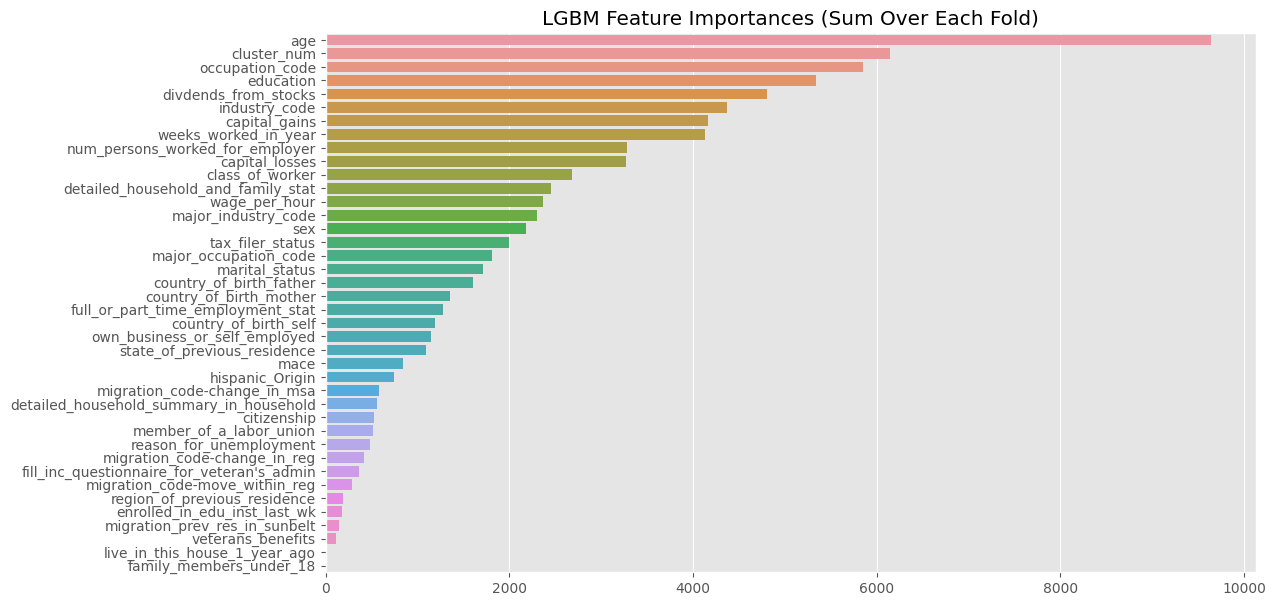

In [65]:
# Obtain lightgbm split-based importances, sum, sort and display
lgbs = [x.steps[-1][1] for x in estimators['LGBMCLASSIFIER']]
sum_importance = np.vstack([lgb.feature_importances_ for lgb in lgbs]).sum(axis=0)
plt.figure(figsize=(12, 7))
sns.barplot(x=sum_importance[np.argsort(-sum_importance)], 
            y=np.array(lgbs[0].feature_name_)[np.argsort(-sum_importance)])
plt.title('LGBM Feature Importances (Sum Over Each Fold)')
plt.show()

Alright, this makes total sense, especially with what we've seen during EDA: `age` indeed tends to be a great predictor of income. 
Another thing to notice here is that `cluster_num` is among the top features to make a split on. That can suggest that at least from boosting splitting standpoint the clustering made sense. 
However, some of the features do not make sense at all (`family_members_under_18`).


Let's see what the picture is with permutation importance. Let's also use a random fold number, one estimator should be enough to see the picture. We'll use it for balanced accuracy, it's highly correlated with G-Mean:

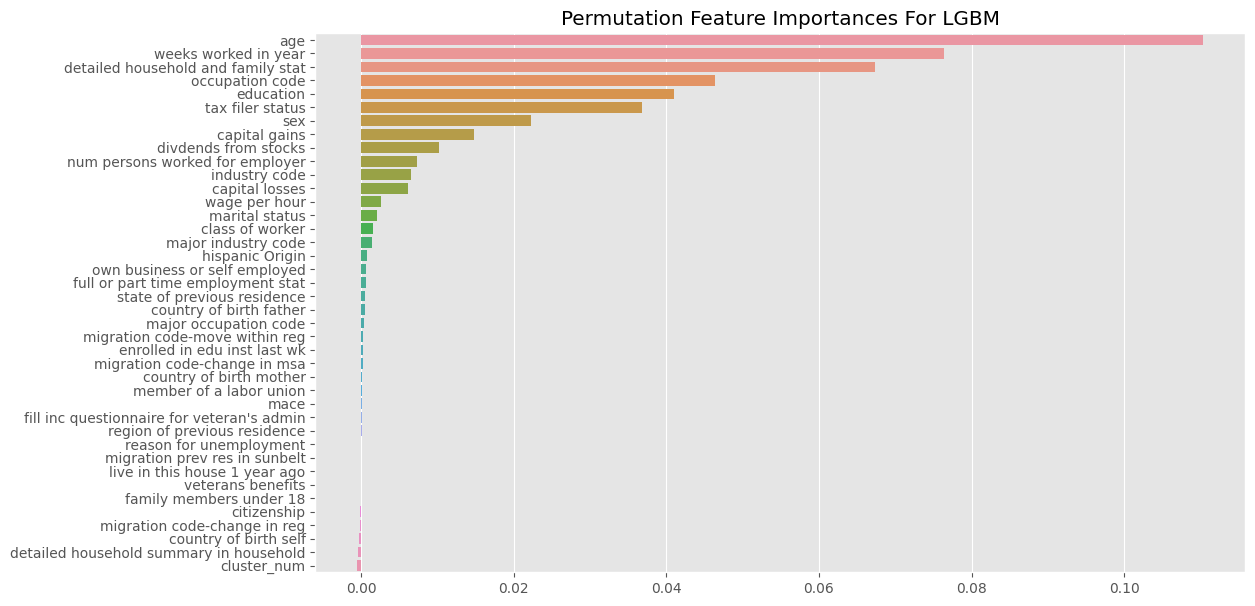

In [66]:
# Get permutation importances, sort and display
av_imp = permutation_importance(estimator=lgbs[1], X=test_encoded[1], y=y_test, 
                                scoring='balanced_accuracy', n_repeats=3, random_state=2022)
importances = av_imp['importances'].mean(axis=1)

plt.figure(figsize=(12, 7))
sns.barplot(x=importances[np.argsort(-importances)], 
            y=test_encoded[1].columns[np.argsort(-importances)])
plt.title('Permutation Feature Importances For LGBM')
plt.show()

Well, the picture is very much the same here: age, number of weeks worked, sex, education and occupation code are among top predictors. 
Many of the top predictors are categorical features by the way, which suggests that we were able to encode features correctly and not overfit (metrics on test are pretty much the same as on cross-validation).
However, here there are many more useless features in terms of permutation importance. This might suggest getting rid of at least those features that are considered useless by both importance scoring methods.

In [67]:
# Take only one of the fitted training estimators
lgb_shap = lgbs[0]
X_test_shap = test_encoded[0]
preds_shap = lgb_shap.predict_proba(X_test_shap)[:, 1]

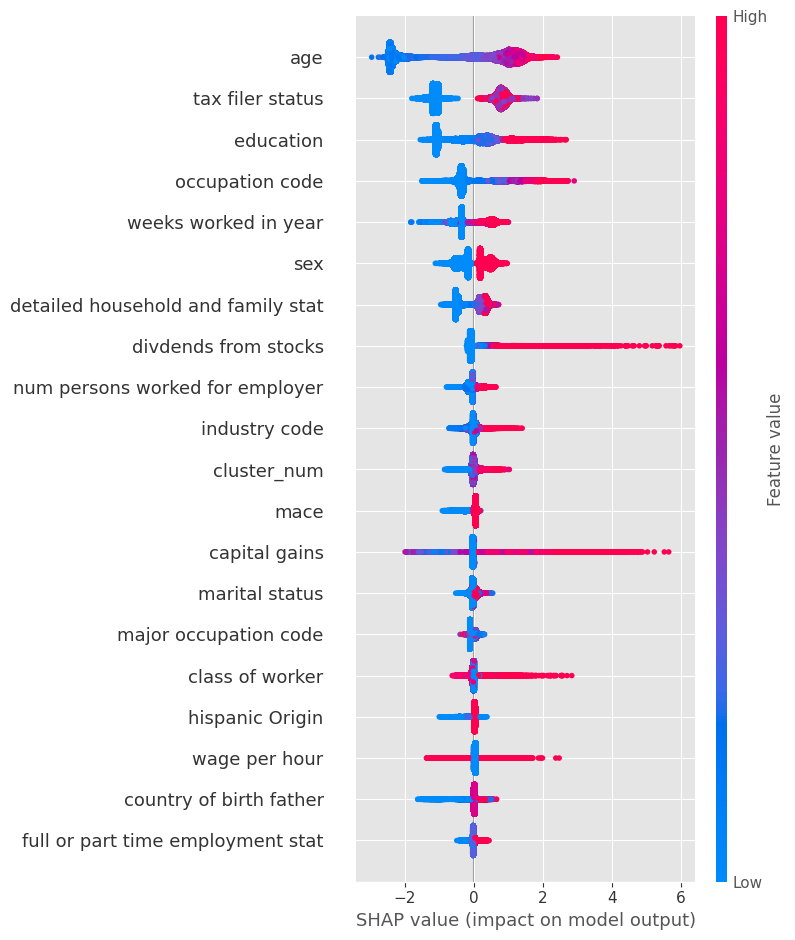

In [68]:
explainer = shap.TreeExplainer(lgb_shap)
shap_values = explainer.shap_values(X_test_shap)
# Draw explanations for class = 1 
shap.summary_plot(shap_values[1], features=X_test_shap)

Global SHAP explanation reveals the same leaders as other methods. However, now we can also see how different values of the features affect the output.
We can observe that model is likely to predict that a person earns more than 50K$ a year if the person is older, has an occupation code with higher average number of 50K+ people, works more weeks in a year, has more dividends from stock and capital gains and etc. Well, we can agree that these points make sense even from general sense and look very trustworthy.

We can also take a look at several random predictions:

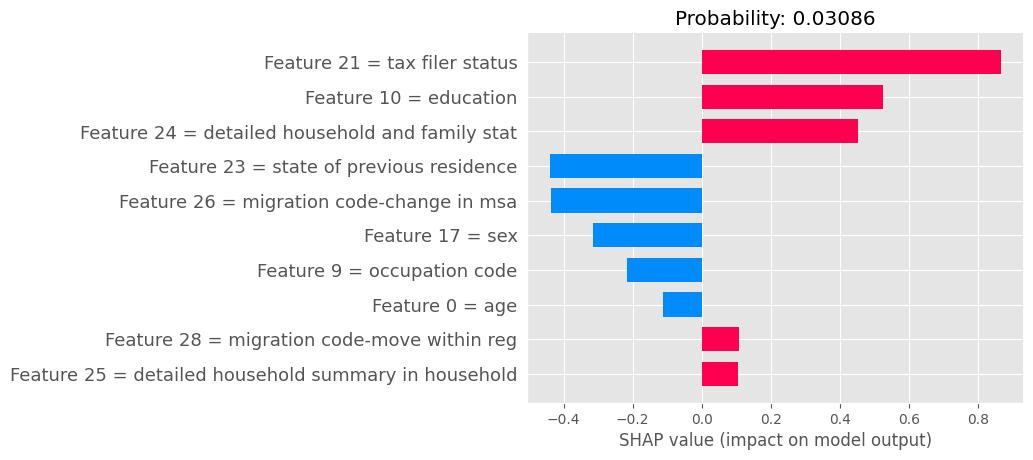

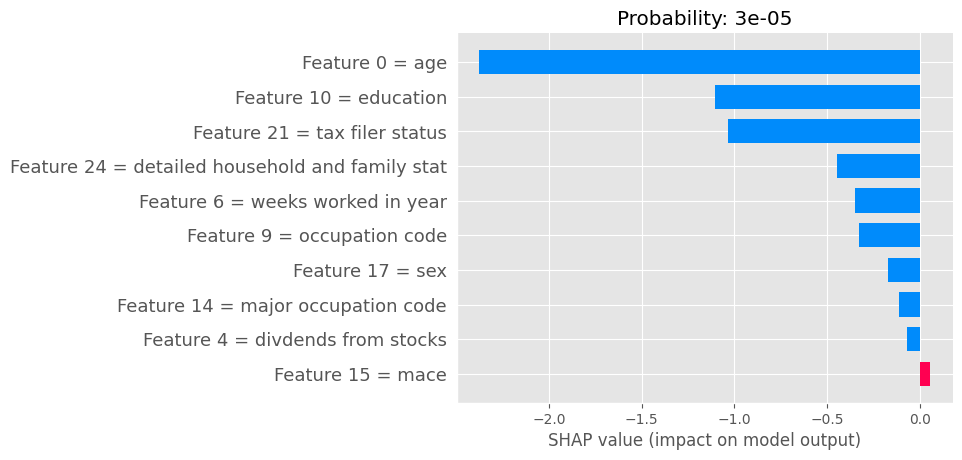

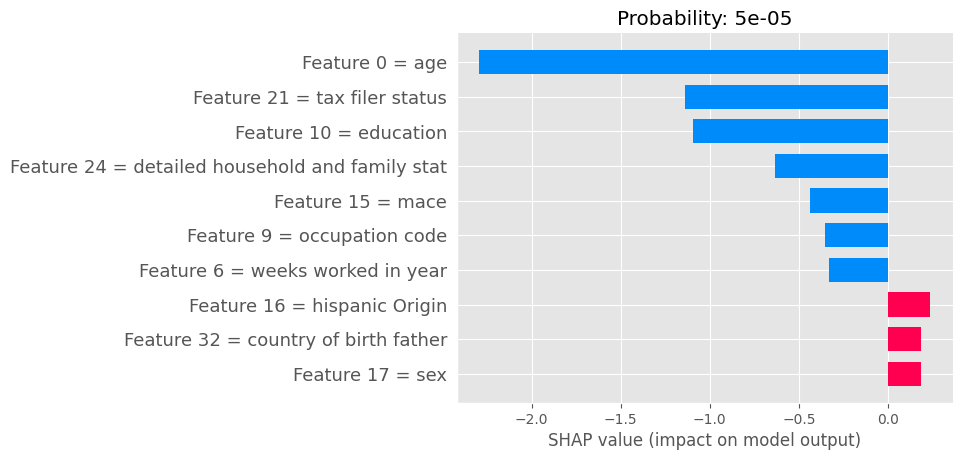

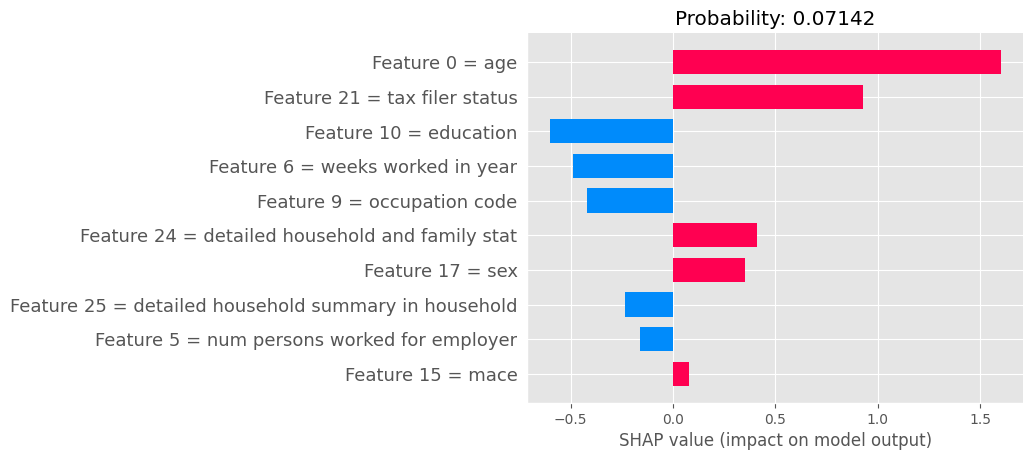

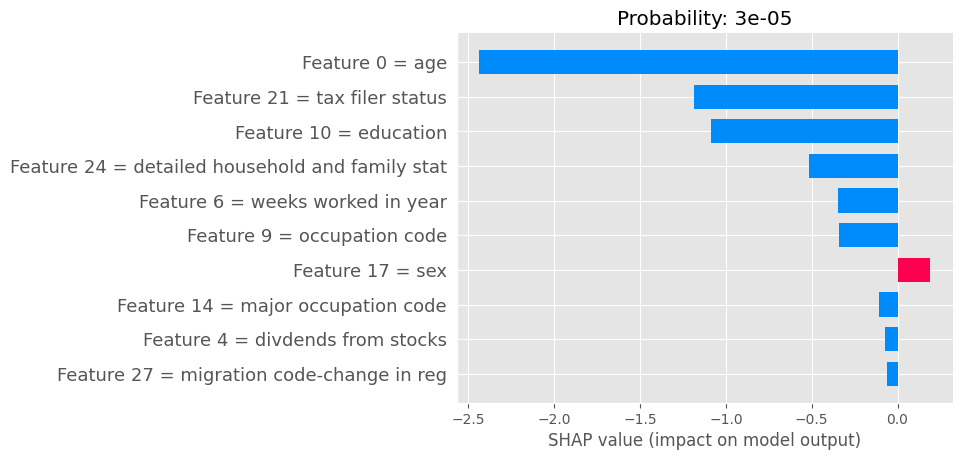

In [69]:
for _ in range(5):
    i = np.random.randint(0, X_test.shape[0] + 1)
    plt.title(f'Probability: {round(preds_shap[i], 5)}')
    shap.bar_plot(shap_values[1][i], features=X_test_shap, max_display=10)

### Stacked model

Let's take a look at coeffiecient based importances (average) and permutation importances for LR stacking model:

In [70]:
stacks = [x.steps[-1][1] for x in estimators['LOGREG_STACK']]
av_importance = np.vstack([stack.coef_ for stack in stacks]).mean(axis=0)
feat_names = np.array(['bayes', 'logreg', 'random_forest', 'lightgbm'])

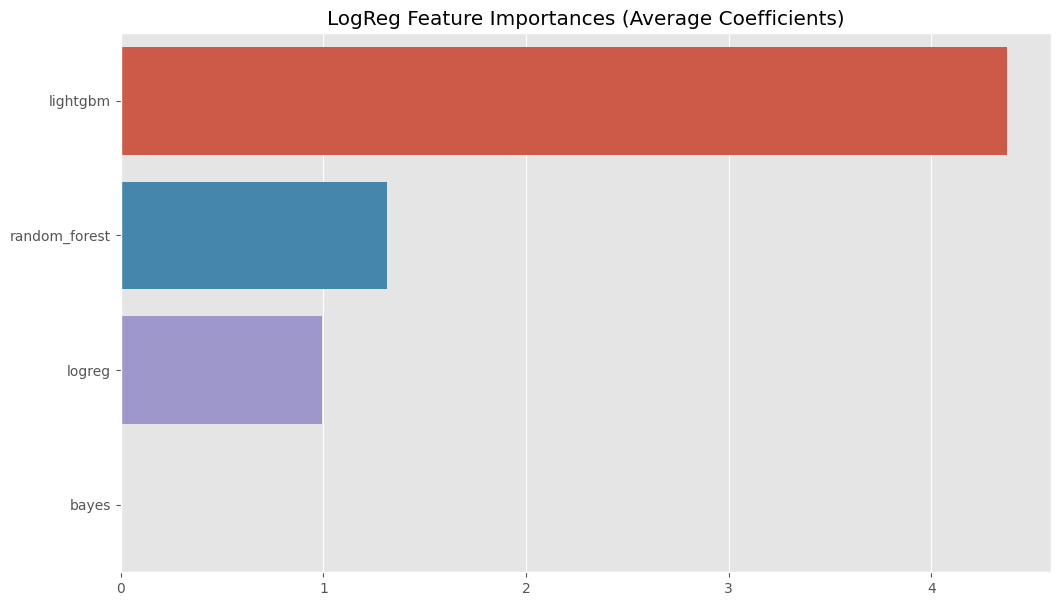

In [71]:
plt.figure(figsize=(12, 7))
sns.barplot(x=av_importance[np.argsort(-av_importance)], 
            y=feat_names[np.argsort(-av_importance)])
plt.title('LogReg Feature Importances (Average Coefficients)')
plt.show()

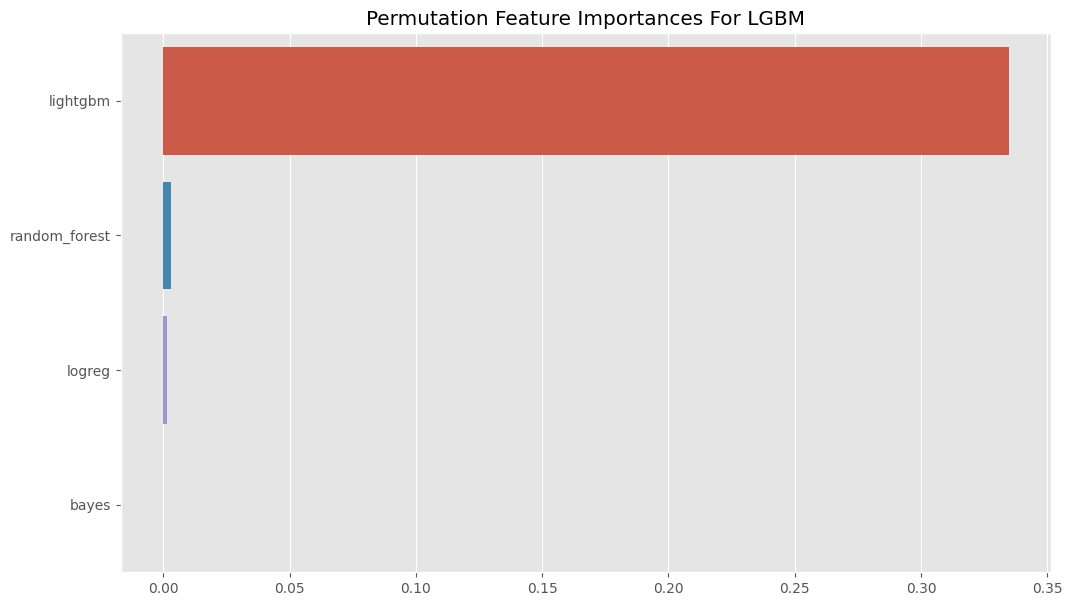

In [72]:
av_imp = permutation_importance(estimator=stacks[1], X=test_encoded_stack[1], y=y_test, 
                                scoring='balanced_accuracy', n_repeats=3, random_state=2022)
importances = av_imp['importances'].mean(axis=1)

plt.figure(figsize=(12, 7))
sns.barplot(x=importances[np.argsort(-importances)], 
            y=feat_names[np.argsort(-importances)])
plt.title('Permutation Feature Importances For LGBM')
plt.show()

Well, what we see here is pretty much what we get in the results: the stacked ensemble has almost the same quality as LightGBM... because it almost entirely relies on LightgGBM. 
That's due to the fact that predictions are highly correlated between 1st level models and LightGBM has the best quality among them. 

## Conclusion

- To sum up let's first notice that with data provided, we had to solve an extremely imbalanced binary classification task. If we assume that the sample of the data that we have is representative, the general chance of finding someone who earns more than 50K a year is about 6-7 \%. Taking into account the fact that the task is highly imbalanced, assuming that we care about predicting both classes correctly (not only the 50K+), we decided to use **Geometric Mean Score as a target metric**. It's very similar to balanced accuracy, descpite the fact that we use geometric mean of sensitivity and specificity. 


- To validate model we used **cross-validation on 5-folds stratified sampling**: we fit a separate encoder on each fold, under-sampled the training part and fit a model on it measuring the quality on validation set. The scores are averaged. At infrence time we applied each of 5 encoders to the test part, and make a prediction with each of 5 models respectively. The probablities are then averaged. This procedure is a complicated one, however, it helps us to get a less biased (overfitted) estimate for the scores. 


- We investigated applying several techniques of working with imlanced data, 2 for over-sampling (*Random and SMOTE*) and 2 - for under-sampling (*Random and NearMiss*). To evaluate the quality metrics' changes we used the same basic estimator (StandardScaler  + PCA + LogReg) applying the resampler to the training part of the fold not changing the validation part. It came out that fancy approaches lead to overfitting as the gap in metrics between train and val starts to increase, moreover, as the data we are handling are quite large and for sophisticated approaches there's a need to calculate pairwise distances across samples, the calculation times are expensive. On the other hand, both random resampling approaches showed satisfactory results and we decided to **use Random Under-sampling** as we showed that we were able to come up with almost the same quality metrics on val set having significantly less training part (less computational time needed, etc.). 


- However, that's not the only complication we had here. Coming across the data themselves, we found out that the feature space is also quite complicated, **most of the features are categorical and almost all features are nominal** (at least it's hard to interpret them to any sensible order). Moreover, the values that categorical features take are not always clear from business standpoint. In real-world example we would better go and ask more about the data collection process and the meaning of attributes in the dataset. However, as we didn't have such an opportunity, we have to cope with the issues ourselves. Another problem we found was in the missing values: we found out that in several features there's a value ` ?` which most likely stands for missing, however, all those features are categorical and from general feature name it was not obvious how one could impute these values, so we decided to treat those values as separate values in each case. 


- As for the categorical encoding, we generally decided to compare two powerful target-based approaches: *CatBoost and Weight Of Evidence*. Interestingly enough, we've found out that **CatBoost encoding performs better**, although WoE is a perfect fit for a binary classification task. We also added random noise to both encoders not to let encoders overfit. We succeeded with that as we have matching metrics in val and test sets and most of the important features are categorical.


- Numeric features were not a bed of roses too, as they mostly have extremely bad distributions with heavy tails and not many distinct values present. That's always a problem to work with such data. Moreover, we have a lot of correlated features. Even ones with absolute Pearson's > 0.7. We used PCA before applying LogReg and used StandardScaler before applying PCA to deal with multicollinearity and different magnitudes. We also tried using Robust Scaler, however, surprisingly it worked worse. (I also tried using log-transformation but it worked so much worse that I left it behing the scene). Potentially, we could try encoding numeric features as categorical as well. However, as numeric features are on top in importances estimates, at least boosting models can leverage them well.


- We applied clustering to the data and tried to evaluate the results. Unfortunately, due the large size of the dataset, we were unable to use neither DBSCAN for clustering nor t-SNE for visualization. We used elbow rule to determine a reasonable number of clusters for K-Means and tried to visualize them in 2d with PCA, but with PCA almost all the data points were one big cluster. Unfortunately we couldn't estimate the quality of clustering permormed visually, but, as `cluster_num` features appeared among top of the split-based LightGBM importance, we can assume that the job was done alright.  


- At modelling step we examined *Naive Bayes, LogReg, Random Forest and LightGBM*. The rationale behind the choice was to pick up fastest and most lightweight representatives of models of different paradigms (linear, bayesian, tree-based, boosting). We not only wanted to have explored different modelling paradigms, but also to have received as many uncorrelated base models for stacking as possible. Well, we definetely failed to get uncorrelated predictions. It came out that all of the models showed deliberately good performance with LogReg, RF and LGBM being almost identical in metrics. However, **LightGBM won**. No wonder, it's not only because gradient boosting is the king of tabular data, but also that can be explained by the fact of bad distibutions of numeric features in our case (as LogReg handles them worse). 


- Which is more importantant, the predictions on training set we picked for a meta model were extremely correlated. We used **stacking with LogReg as a meta-model** and we only used the predictions of base models as features. It came out that the quality of the ensemble was almost the same as the quality of the best model. LogReg weights and permutation importance exploration showed that it happens due to the fact that meta-learner fully relies on the best model in the ensemble. If we were to resume the work, we could incorporate the whole data together with the base models to get the better quality, however, it seems to me too complex for a fast production inference. Another potential way to get a better ensemble score is to introduce more bias between base models by, for example, selecting subsets of features for each model. 


- Finally, we investigated the best model - LightGBM. We used internal split-based feature importance, permutation feature importance and SHAP values to understand the global feature importance. It turned out that all methods show pretty much similar results and the result are very intuitive to understand. When we investigated SHAP values, we've found that **to increase a chance of getting 50K+ a year, an individual has to be older, work more weeks in a year, have job and industry where proportion of rich people is higher and etc.** Generally, results seem trustworthy and with a tree-based single model trained on initial features, we could also mark the contribution of each feature to an individual probability score, which is a very important when working with human and money. Thus, having stacked model and LightGBM showing approximately the same quality, in a real-life example we would definitely pick-up a more interpretable model. Moreover, the idea of decision trees and boosting as an consecutive ensemble of trees where each next tree tries to correct mistakes of the previous ensemble is very natural to explain, which could also help to gain more trust from business stakeholders' side.  
